 # Predicting telemarketing success in the banking sector: the case of Portuguese bank

Alexander Kalita

# Introduction

Telemarketing is a powerful tool that companies use to increase sales and improve customer relationships. However, the effectiveness of telemarketing campaigns depends on a range of factors, including customer demographics and past experiences with marketing. This study focuses on the success of a telemarketing campaign run by a Portuguese bank and aims to determine what factors contribute to customer subscription to term bank deposits.

To achieve this goal, the study uses various visualization tools and machine learning classification models to analyze customer behavior and make predictions about subscription rates. By exploring a range of socio-demographic features and past marketing experiences, the study provides insights into what factors are most likely to lead to successful customer subscription.

The results of the study have important implications for the Portuguese bank and other companies looking to improve the effectiveness of their telemarketing campaigns. By understanding the factors that drive customer behavior, companies can design more targeted and effective marketing strategies that will help them stay competitive in the marketplace. Ultimately, the study provides valuable insights into the power of data-driven approaches to marketing and customer engagement.

# Dataset description

The dataset used in this study was collected by a Portuguese retail bank between May 2008 and November 2010, and is publicly available in the UCI Machine Learning Repository [2, also see 1]. The dataset contains information on 45,211 instances, including socio-demographic characteristics, financial backgrounds, and telemarketing campaign interactions.

There are two main limitations of the dataset that should be noted. First, the data was collected over a decade ago, which may limit its relevance to current banking practices. Second, the dataset is static and does not account for changes in customer behavior or market trends over time. However, despite these limitations, the dataset provides a valuable source of information on customer behavior and telemarketing campaign effectiveness.

The study examines 17 variables in total, which are listed in Table 1. These variables are carefully chosen to capture a range of important factors related to customer behavior. Overall, the dataset provides a rich and comprehensive source of data for exploring the effectiveness of telemarketing campaigns in the Portuguese banking sector.

### Table 1: Variables in the dataset
| Variable | Description |
| --- | --- |
| Target variable |
| y  | Binary variable: equals 1 if the client has subscribed a term deposit, and 0 if not |
| Demographics |
| age | Numeric variable: age (in years) |
| job | Categorical variable: type of job (“management”, “blue-collar”, “technician”, “admin.”, “services”, “retired”, “self-employed”, “unemployed”, “entrepreneur”, “student”, “housemaid”, “unknown”) |
| education | Categorical variable: educational background (“secondary”, “tertiary”, “primary”, “unknown”) |
| marital | Categorical variable: marital status (“married”, “single”, “divorced”) |
| Financials |
| balance | Numeric variable: average yearly balance (in euros) |
| default | Binary variable: equals 1 if the client has credit in default, and 0 if not |
| housing | Binary variable: equals 1 if the client has housing loan, and 0 if not |
| loan | Binary variable: equals 1 if the client has personal loan, and 0 if not |
| Current campaign |
| duration | Numeric variable: last contact duration (in seconds) |
| campaign | Numeric variable: number of contacts performed during this campaign |
| day | Numeric variable: last contact date (day of the month) |
| contact | Categorical variable: type of contact communication (“cellular”, “telephone”, “unknown”) |
| month | Categorical variable: last contact month (“January”, “February”, “March”, “April”, “May”, “June”, “July”, “August”, “September”, “October”, “November”, “December”) |
| Previous campaign |
| pdays  | Numeric variable: number of days passed after the contact from a past campaign |
| previous | Numeric variable: number of contacts performed before this campaign |
| poutcome | Categorical variable: the outcome of past marketing campaign (“success”, “failure”, “unknown”, “other”) |

# Data preparation

The data preparation section was divided into data exploration and data cleaning.

All the used Python packages were loaded.

In [1]:
# Load packages in Python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from scipy.stats import yeojohnson
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

The dataset was loaded for analysis in JupyterLab.

In [2]:
# Load dataset
bank_data = pd.read_csv('C:/Users/Alexander_Kalita/Desktop/2_Portuguese_bank/bank-full.csv', sep=",")
bank_data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

## Data exploration

The internal structure of the data is presented. The dataset provides the bank customers’ information which includes 45,211 rows and 17 columns.

In [3]:
# View data structure
print(bank_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


It can be seen above that object (character) type variables are misleading and labeled as strings with text values, but these variables are categorical type.
This issue is fixed with the following code:

In [4]:
# Change object into category type variables
for col in bank_data.select_dtypes(include='object').columns:
    bank_data[col] = bank_data [col].astype('category')
print(bank_data.dtypes)

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object


Analyzing categorical and binary variables, including the target variable “y” related to term deposit subscription, showed some preliminary results:

•	Only 11,7% of respondents decided to subscribe for a term deposit, while a much larger proportion of respondents, 88,3%, did not obtain a term deposit subscription.

•	The majority of respondents have the following socio-demographic profile: 21,5% are blue-collar workers, 51,3% have a secondary education, and 60,2% are married.

•	Regarding the financial situation, 55,6% of respondents primarily have housing loans, whereas 16,2% have personal loans, and less than 2% have credit in default.

•	More than 30% of respondents were contacted by the call center on May, and 64,8% communicated via cellular phone.

•	Less than 3,5% of respondents characterized the past telemarketing campaign of the Portuguese bank as 'successful', while 81,8% of responses fell into the 'unknown' category.

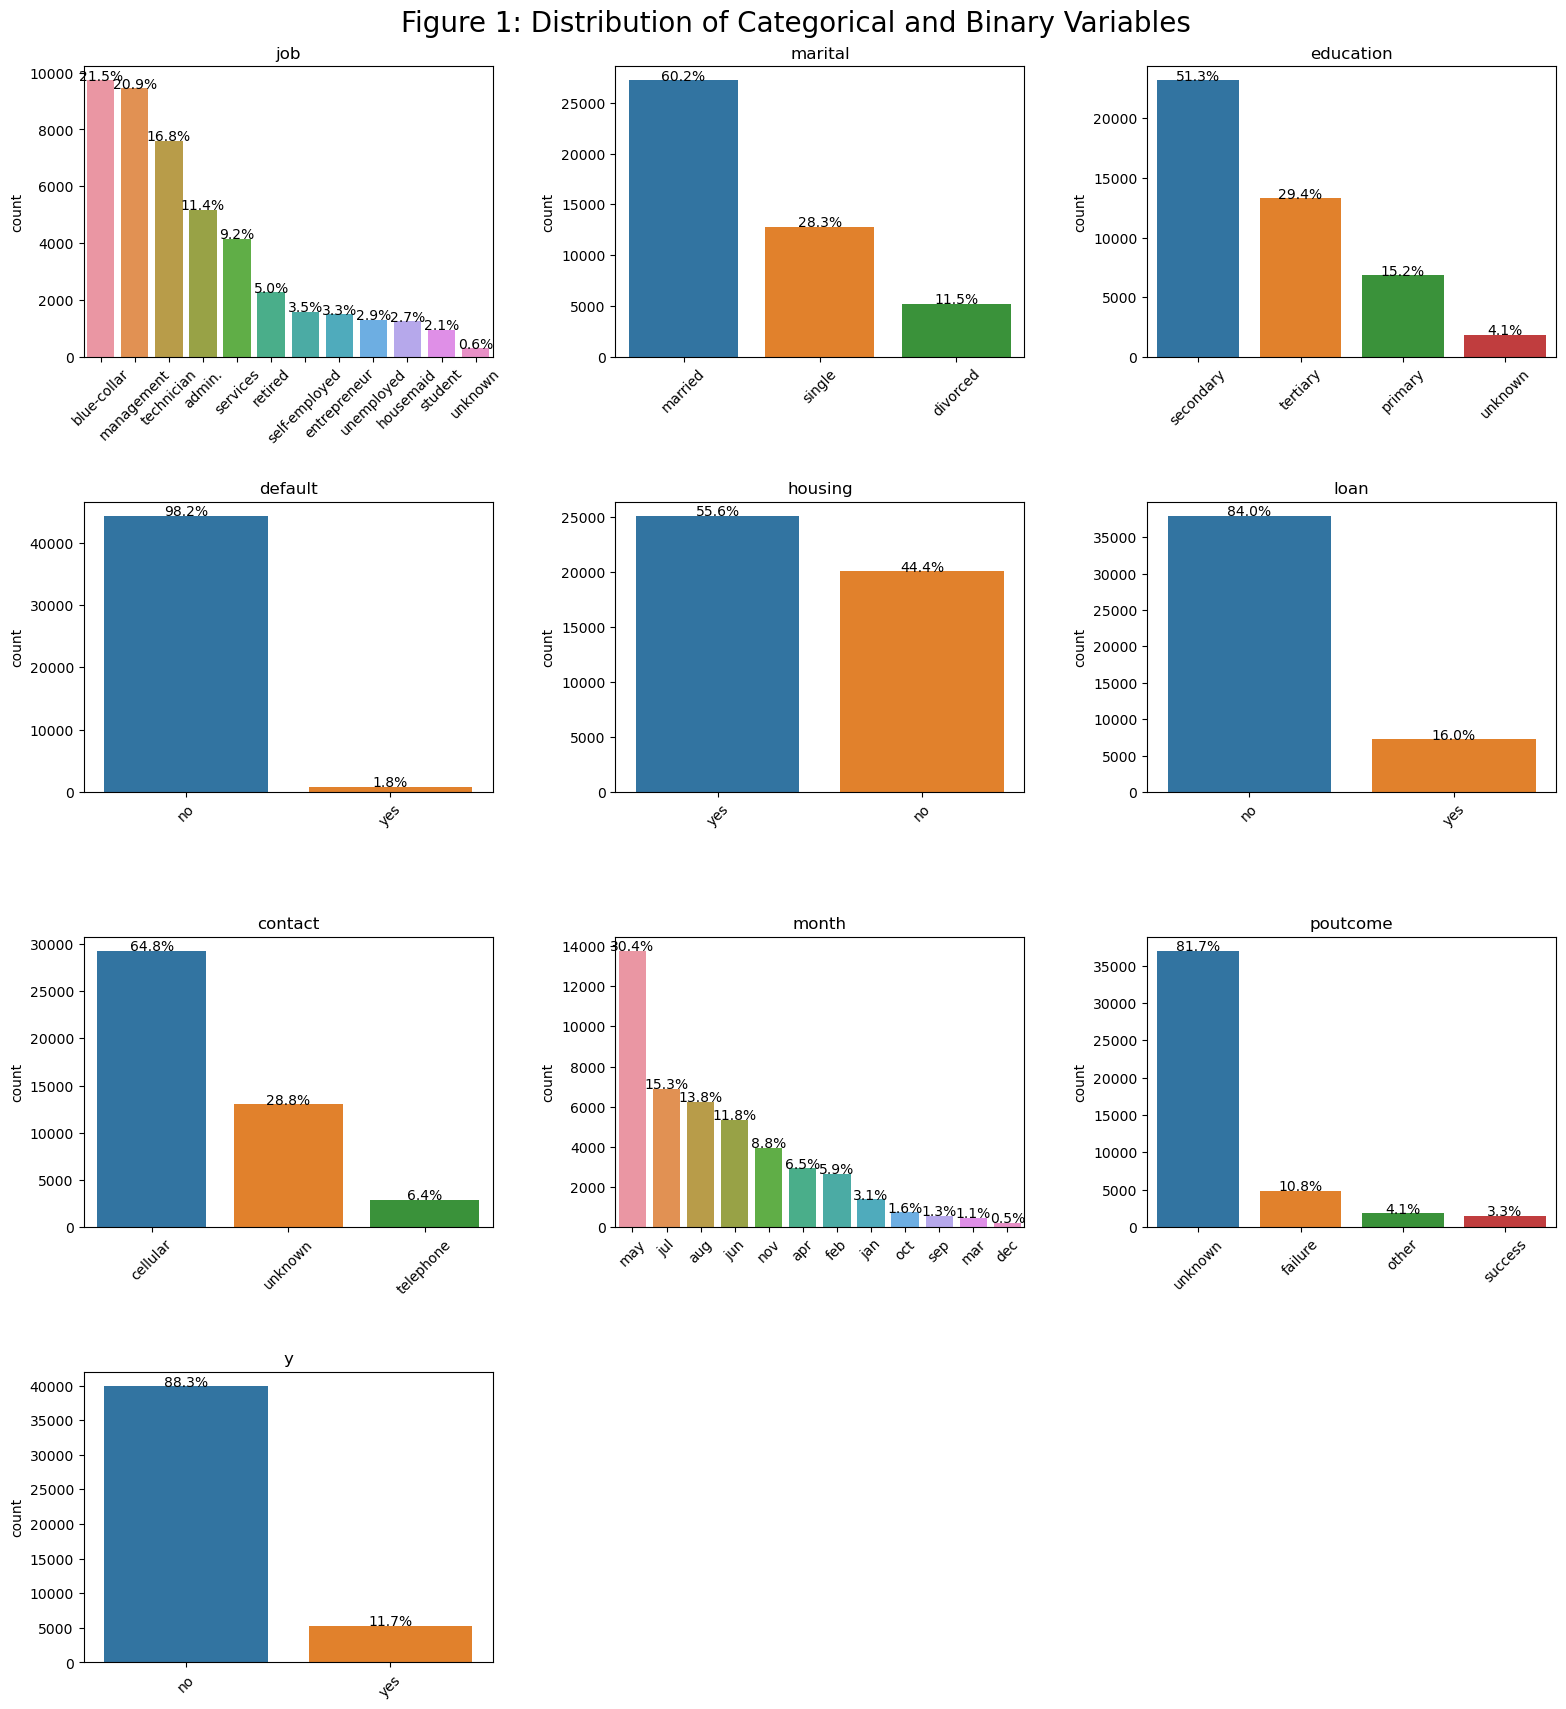

In [5]:
# Visualize categorical and binary variables
cat_cols = bank_data.select_dtypes(include=['category']).columns.tolist()
def create_countplots(data, cat_cols):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(19, 19))
    plt.subplots_adjust(wspace=0.3, hspace=0.5, top=0.95)
    fig.suptitle("Figure 1: Distribution of Categorical and Binary Variables", fontsize=20)
    for ax, feat in zip(axes.flat, cat_cols):
        sns.countplot(x=data[feat], ax=ax, order=data[feat].value_counts().index)
        ax.set_title(feat)
        ax.set_xlabel("")
        ax.tick_params(axis='x', rotation=45)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height+3,
            '{:.1f}%'.format(height/len(data)*100), ha="center")
    empty_ax = axes.flat[len(cat_cols):]
    for ax in empty_ax:
        ax.remove()
create_countplots(bank_data, cat_cols)

The main results obtained from analyzing the numeric variables can be summarized as follows:

•	The majority of Portuguese bank customers are in their early to mid-30s.

•	The average yearly balance of customers is €1362,3, with balances ranging from €-8019 to €102127.

•	Approximately one-third of calls between the contact center and potential customers fall within the range of 50-185 seconds or 0,8-3,1 minutes.

•	Potential customers were primarily contacted 1-2 times during the current campaign, with a preference for contacting them on the 23rd day of the month.

•	A significant proportion of potential customers were contacted only 1-2 times during the previous campaign, and it has been more than 400 days since the last contact.

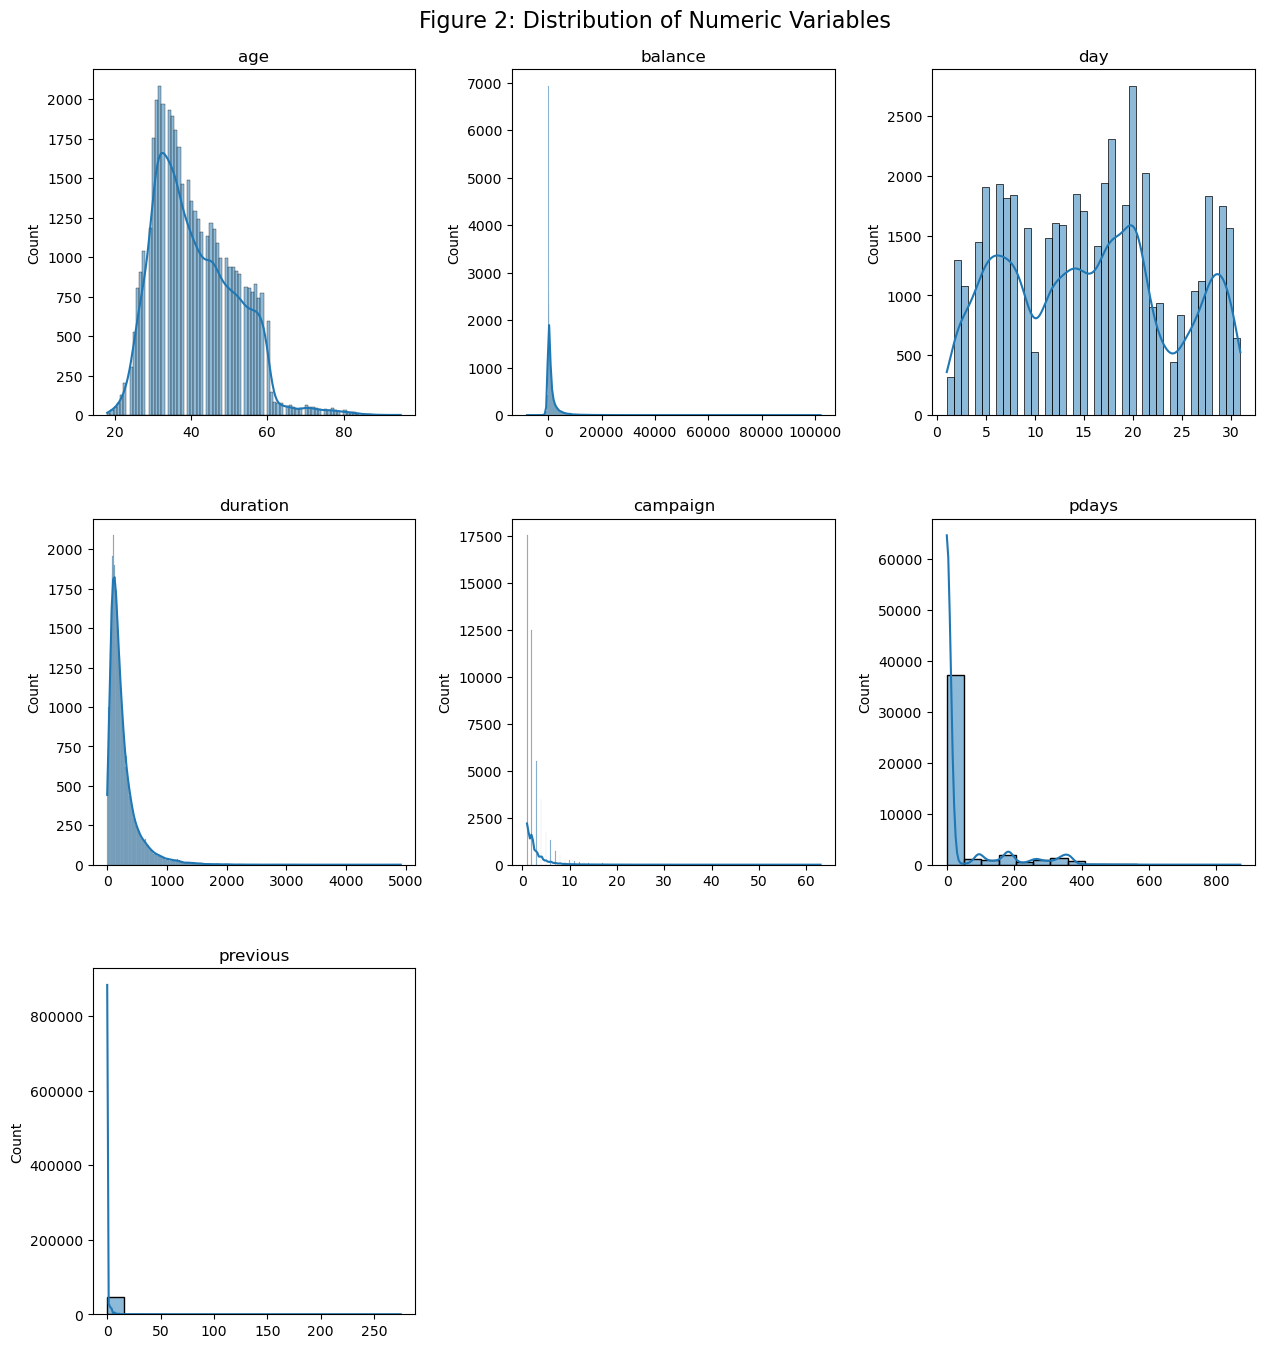

In [6]:
# Visualize numeric variables
num_cols = bank_data.select_dtypes(include=['int64']).columns.tolist()
def create_distplots(data, num_cols):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
    plt.subplots_adjust(wspace=0.3, hspace=0.3, top=0.94)
    fig.suptitle("Figure 2: Distribution of Numeric Variables", fontsize=16)
    for ax, feat in zip(axes.flat, num_cols):
        sns.histplot(data=data, x=feat, kde=True, ax=ax)
        ax.set_title(feat)
        ax.set_xlabel("")
    empty_ax = axes.flat[len(num_cols):]
    for ax in empty_ax:
        ax.remove()     
create_distplots(bank_data, num_cols)

The correlation matrix for numerical variables was designed. All the numerical variables are slightly below the recommended high correlation threshold of 0.7, so there is no need to exclude them.

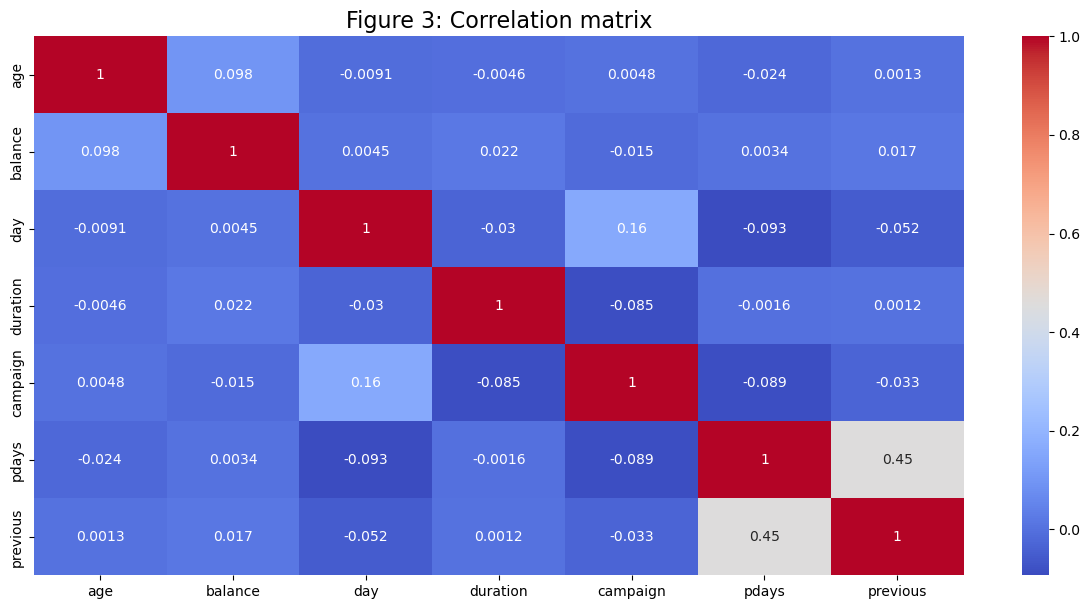

In [7]:
# Create correlation matrix
corr = bank_data.corr()
plt.figure(figsize=(15, 7))
plt.title('Figure 3: Correlation matrix', y=1, size=16)
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

## Data cleaning

The duplicates were checked. It seems that there is lack of duplicates in the data.

In [8]:
# Check duplicated data
duplicates = bank_data[bank_data.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])
bank_data = bank_data.drop_duplicates()

Number of duplicate rows: 0


The data was checked for missing values. There is no “null” value of missing data. 

Some variables in the dataset contain the “unknown” category which could be potentially considered as missing data but the provided data documentation clearly shows that there are none missing attribute values in the Portuguese bank dataset [2].

In [9]:
# Check for missing values
print(bank_data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


The numeric variables were checked for outliers using interquartile range (IQR). All the data points more than 1,5 times the IQR away from the quartiles were considered as an outlier. To address the presence of outliers, the numeric variables were transformed using the Yeo-Johnson transformation method in the “Model training and interpretation” section.

In [10]:
# Check for outliers in numeric variables
numeric_vars = bank_data.select_dtypes(include=['int64']).columns.tolist()
for col in numeric_vars:
    Q1 = bank_data[col].quantile(0.25)
    Q3 = bank_data [col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    num_outliers = bank_data [(bank_data [col] < lower) | (bank_data [col] > upper)][col].count()
    print('Column:', col)
    print('IQR:', IQR)
    print('Lower whisker:', lower)
    print('Upper whisker:', upper)
    print('Total number of outliers:', num_outliers)
    print('\n')

Column: age
IQR: 15.0
Lower whisker: 10.5
Upper whisker: 70.5
Total number of outliers: 487


Column: balance
IQR: 1356.0
Lower whisker: -1962.0
Upper whisker: 3462.0
Total number of outliers: 4729


Column: day
IQR: 13.0
Lower whisker: -11.5
Upper whisker: 40.5
Total number of outliers: 0


Column: duration
IQR: 216.0
Lower whisker: -221.0
Upper whisker: 643.0
Total number of outliers: 3235


Column: campaign
IQR: 2.0
Lower whisker: -2.0
Upper whisker: 6.0
Total number of outliers: 3064


Column: pdays
IQR: 0.0
Lower whisker: -1.0
Upper whisker: -1.0
Total number of outliers: 8257


Column: previous
IQR: 0.0
Lower whisker: 0.0
Upper whisker: 0.0
Total number of outliers: 8257




# Analyzing telemarketing campaign: main findings

This section presents the key findings of the study on the telemarketing campaign of a Portuguese bank. It begins with descriptive statistics of the key variables and then proceeds to a classification analysis aimed at predicting the likelihood of potential customers subscribing to the bank's deposit offer.

## Descriptive statistics

The graph clearly shows the relative importance of March, September, October and December for term subscription rates (see Figure 4). Despite the highest number of contacts performed on May, only 6,7 % of respondents actually subscribed to the term deposit.

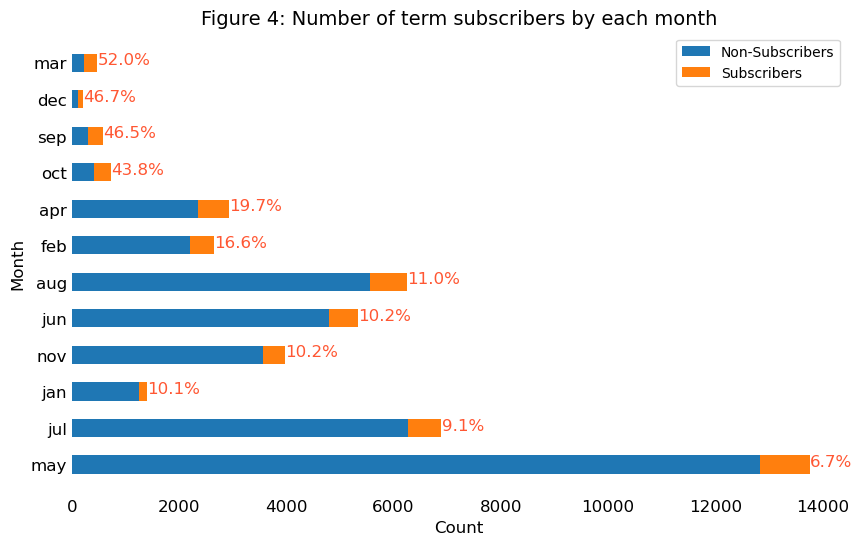

In [11]:
# Barplot: Number of term subscribers by each month
subscribers_by_month = bank_data.groupby(['month', 'y']).size().unstack().fillna(0)
subscribers_by_month['Total'] = subscribers_by_month.sum(axis=1)
subscribers_by_month['Percent_Subscribers'] = subscribers_by_month['yes']/subscribers_by_month['Total']*100
subscribers_by_month = subscribers_by_month.sort_values(by='Percent_Subscribers', ascending=True)
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#ff5733']
ax.barh(subscribers_by_month.index, subscribers_by_month['no'], height=0.5, color=colors[0], label='Non-Subscribers')
ax.barh(subscribers_by_month.index, subscribers_by_month['yes'], height=0.5, left=subscribers_by_month['no'], color=colors[1], label='Subscribers')
for i, v in enumerate(subscribers_by_month['Percent_Subscribers']):
    ax.text(subscribers_by_month.iloc[i,1] + subscribers_by_month.iloc[i,0] + 1, i - 0.05, str(round(v,1)) + '%', color=colors[2], fontsize=12)
ax.legend(loc='upper right')
ax.set_title('Figure 4: Number of term subscribers by each month', fontsize=14)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Month', fontsize=12)
ax.tick_params(axis='both', labelsize=12, length=0)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()

Figure 5 illustrates an interesting trend where approximately 45,6% of subscriptions occur when customers spend between 9,7 and 33 minutes on the phone with the contact center. However, as the duration exceeds 33 minutes, the subscription rates exhibit a steady decline.

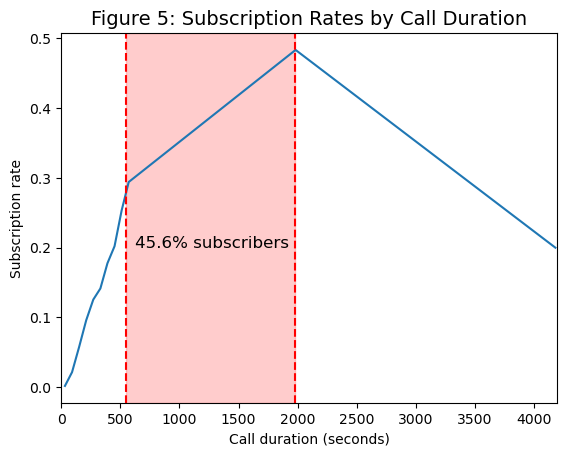

In [12]:
# Line plot: Subscription rates by call duration
duration_ranges = [(0, 60), (60, 120), (120, 180), (180, 240), (240, 300), (300, 360), (360, 420), (420, 480), (480, 540), (540, 600), (600, 3366), (3366, 5000)]
call_durations = []
sub_rates = []
for duration_range in duration_ranges:
    subset = bank_data[(bank_data['duration'] >= duration_range[0]) & (bank_data['duration'] <= duration_range[1])]
    sub_rate = subset['y'].value_counts(normalize=True)['yes']
    call_durations.append((duration_range[0]+duration_range[1])/2)
    sub_rates.append(sub_rate)
subset = bank_data[(bank_data['duration'] >= 550) & (bank_data['duration'] <= 1980)]
sub_rate_range = subset['y'].value_counts(normalize=True)['yes']
fig, ax = plt.subplots()
ax.plot(call_durations, sub_rates)
ax.set_xlabel('Call duration (seconds)')
ax.set_ylabel('Subscription rate')
ax.axvline(x=550, linestyle='--', color='red')
ax.axvline(x=1980, linestyle='--', color='red')
ax.axvspan(550, 1980, alpha=0.2, color='red')
ax.text(620, 0.2, '{:.1%} subscribers'.format(sub_rate_range), fontsize=12)
ax.set_xlim(0, 4200)
ax.set_title('Figure 5: Subscription Rates by Call Duration', fontsize=14)
plt.show()

## Modeling and Analysis

This section covers model selection, model training and interpretation, model evaluation, and model comparison.

### Model selection

In this study, five classification models were evaluated to enhance future telemarketing campaigns for a Portuguese bank. All model code is provided in Appendix A.

#### Logistic regression

Logistic regression is a widely used algorithm for binary classification due to its simplicity, interpretability, and effectiveness. It uses a sigmoid function to predict the probability of binary outcomes, making it suitable for estimating the likelihood of a potential customer subscribing to a term deposit.
However, logistic regression assumes linearity between independent variables and the log-odds of the dependent variable, which may limit its ability to capture complex non-linear relationships in the data. Despite these limitations, logistic regression remains popular for many binary classification scenarios.

#### Feedforward Neural Networks

Feedforward Neural Networks (FNNs), also known as Multi-Layer Perceptrons (MLPs), are powerful models used for classification tasks. They can be thought of as artificial analogues of the human brain, mimicking its ability to capture complex relationships and learn intricate patterns in the data.
One of the key strengths of FNNs is their ability to handle non-linear relationships and high-dimensional data effectively. However, they require sufficient data to avoid overfitting and can be computationally intensive.
Interpreting FNNs as they operate as black-box models can be challenging, which makes it difficult to understand the exact reasoning behind their predictions. In spite of its constraints, FNNs have achieved impressive performance in various domains, making them valuable for classification tasks and informed decision making.

#### Decision trees

Decision Trees is a popular algorithm used for classification tasks that creates a tree-like model of decisions and their possible consequences. They are easily interpretable and provide clear insights into the importance of different variables of the classification model.
However, it is important to be mindful of their limitations. decision trees can be prone to overfitting, particularly with complex datasets, leading to poor generalization on unseen data. They also have limitations in capturing complex relationships involving multiple variables or interactions.
Despite these challenges, decision trees remain popular due to their simplicity, interpretability, and visually appealing tree graph representation, which can facilitate effective communication of the results within an organization.

#### Random forests

Random Forests Random Forests is an ensemble learning algorithm widely used for classification tasks. It constructs a collection of decision trees and combines their predictions to achieve high accuracy in classifications. Random forests offer several advantages, including robustness to outliers, the ability to handle diverse types of data, and the capability to capture complex relationships. 
One limitation of random forests is the challenge of interpreting the contributions of individual variables to the final decision. Additionally, they may require substantial memory resources, particularly when dealing with large datasets or a high number of trees in the ensemble. Despite these considerations, random forests are a valuable classification model that enables practitioners to improve the decision-making process.

#### XGBoost

XGBoost, short for Extreme Gradient Boosting, is a powerful ensemble learning algorithm used for classification tasks. It combines weak predictive models, typically decision trees, in an optimized manner to create a strong model. It excels in handling complex relationships and capturing intricate patterns in the data, making it suitable for tackling classification problems.
However, it has computational complexity and training time considerations, especially with large datasets or complex models. Overfitting can also be a concern if not properly tuned or regularized. Nevertheless, XGBoost is a state-of-the-art algorithm known for its high accuracy and predictive power, making it valuable for data-driven decision-making.

### Model Training and Interpretation

The main features of the study were separated into a new dataframe from the target variable term deposit subscription.

In [13]:
# Separate the features and the target variable
X = bank_data.drop('y', axis=1)
y = bank_data['y']

The numeric variables were transformed using the Yeo-Johnson transformation method because the graphs in the data exploration section clearly showed that, in general, they are highly skewed which may cause poor model predictions. Note that the Yeo-Johnson transformation method was chosen because it can handle both positive and negative values in the variables.

In [14]:
# Transform numeric variables using the Yeo-Johnson transformation
num_cols = bank_data.select_dtypes(include=['int64']).columns
transformed_data = pd.DataFrame()
for col in num_cols:
    transformed_data[col] = yeojohnson(bank_data[col])[0]
bank_data.drop(columns=num_cols, inplace=True)
display(transformed_data.head())

age     balance       day  duration  campaign     pdays  previous
0  2.828869  733.541036  3.551032  8.284871  0.487299 -1.949658      -0.0
1  2.701662   19.404127  3.551032  7.175362  0.487299 -1.949658      -0.0
2  2.562883    1.802083  3.551032  5.898797  0.487299 -1.949658      -0.0
3  2.732573  545.749528  3.551032  6.241565  0.487299 -1.949658      -0.0
4  2.562883    0.939543  3.551032  7.714252  0.487299 -1.949658      -0.0

The categorical variables were transformed into 35 separate binary variables and recoded “y” – term deposit subscription variable into numeric values. It should be mentioned that the first category of each variable is dropped. This is a common practice to avoid errors.

In [15]:
# Transform categorical variables into binary variables
cat_vars = ['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
binary_data = pd.get_dummies(bank_data[cat_vars], columns=cat_vars, drop_first=True)
bank_data.drop(columns=cat_vars, inplace=True)
bank_data['y'] = bank_data['y'].map({'no': 0, 'yes': 1})
X = pd.concat([bank_data, binary_data], axis=1)
y = bank_data['y']
display(X.head())

y  job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0  0                0                 0              0               1   
1  0                0                 0              0               0   
2  0                0                 1              0               0   
3  0                1                 0              0               0   
4  0                0                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   
1            0                  0             0            0               1   
2            0                  0             0            0               0   
3            0                  0             0            0               0   
4            0                  0             0            0               0   

   ...  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0  ...          0          0          0          1          0          0   
1  ...          0          0          0          1          0          0   
2  ...          0          0          0          1          0          0   
3  ...          0          0          0          1          0          0   
4  ...          0          0          0          1          0          0   

   month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0          0               0                 0                 1  
1          0               0                 0                 1  
2          0               0                 0                 1  
3          0               0                 0                 1  
4          0               0                 0                 1  

[5 rows x 36 columns]

Both numerical and categorical (binary) variables were combined into a single dataset. 

In [16]:
# Combine the transformed numerical and categorical variables into a single dataset
final_data = pd.concat([transformed_data, binary_data, bank_data['y']], axis=1)
X = final_data.drop(columns=['y'])
y = final_data['y']
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  45211 non-null  float64 
 1   balance              45211 non-null  float64 
 2   day                  45211 non-null  float64 
 3   duration             45211 non-null  float64 
 4   campaign             45211 non-null  float64 
 5   pdays                45211 non-null  float64 
 6   previous             45211 non-null  float64 
 7   job_blue-collar      45211 non-null  uint8   
 8   job_entrepreneur     45211 non-null  uint8   
 9   job_housemaid        45211 non-null  uint8   
 10  job_management       45211 non-null  uint8   
 11  job_retired          45211 non-null  uint8   
 12  job_self-employed    45211 non-null  uint8   
 13  job_services         45211 non-null  uint8   
 14  job_student          45211 non-null  uint8   
 15  job_technician     

Then, the main dataset was split into training and testing data with a ratio of 70%/30% which is commonly used for moderate-sized datasets.

In [17]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Training data shape:', X_train.shape, y_train.shape)
print('Testing data shape:', X_test.shape, y_test.shape)

Training data shape: (31647, 42) (31647,)
Testing data shape: (13564, 42) (13564,)


The DMatrix was created to store the data in a format compatible with the XGBoost library.

In [18]:
# Create a DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

The following XGBoost hyperparameters were set. Note that by trial and error, only those hyperparameters were selected that had an impact on the model.

In [19]:
# Set XGBoost hyperparameters
params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.1,
    'n_estimators': 100,
    'max_depth': 5,
    'colsample_bytree': 0.8
}

The XGBoost model was built using 5-fold cross-validation. The cross-validation accuracy of 91% with a standard deviation of 1% indicates that the data was divided into 5 samples, and each sample demonstrated a cross-validation accuracy of approximately 91% (±1%).

In [20]:
# Build the XGBoost model with 5-fold cross-validation
xgb_cv = XGBClassifier(**params)
xgb_cv.fit(X_train, y_train)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_cv, X, y, cv=kf)
print("Cross-validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-validation accuracy: 0.91 (+/- 0.01)


The relative feature importance plot was generated to highlight the top 5 most significant variables in the dataset. Surprisingly, the variable “past successful campaign” emerged as a pivotal factor, contributing a substantial 15,9% towards explaining bank deposit subscriptions.

Upon examining the previous descriptive statistics, it became evident that variables such as duration and month played crucial roles in influencing the outcomes. Notably, duration alone accounted for 9% of the term deposit subscription rates. Additionally, March (5,6%) and June (5,3%) emerged as two important months for improving deposit subscription rates.

Interestingly, among the influential variables, there was one named “contact_unknown” that demonstrated importance in the results. However, its interpretation proves to be challenging due to its unclear nature.

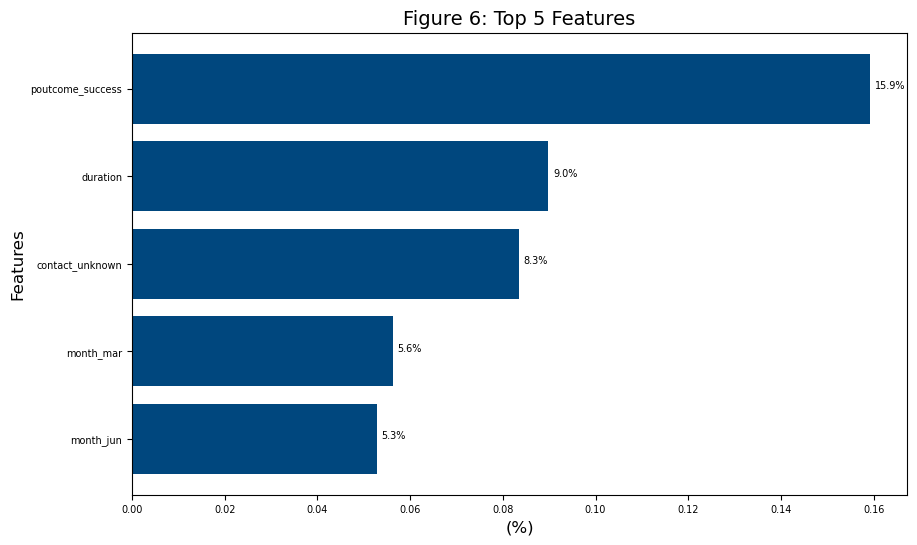

In [21]:
# Plot relative feature importance
importances = xgb_cv.feature_importances_
features = X.columns
total_importance = np.sum(importances)
importances = importances / total_importance
sorted_idx = np.argsort(importances)[-5:]
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.figure(figsize=(10, 6))
plt.barh(pos, importances[sorted_idx], align='center', color='#00477e')
plt.yticks(pos, features[sorted_idx])
plt.title('Figure 6: Top 5 Features', fontsize=14)
plt.xlabel('(%)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
for i, v in enumerate(importances[sorted_idx]):
    plt.text(v + 0.001, i + 0.5, str(round(v * 100, 1)) + '%', fontsize=7)

The model was evaluated on the test data, resulting in a test accuracy of 88,4%. It is important to note that an optimal threshold of 20% was selected through experimentation.

In [22]:
# Evaluate the model on the test set
threshold = 0.2
y_test_pred_prob = xgb_cv.predict_proba(X_test)[:,1]
y_test_pred = np.where(y_test_pred_prob >= threshold, 1, 0)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Threshold:', threshold)
print('Test Accuracy:', test_accuracy)

Threshold: 0.2
Test Accuracy: 0.8843261574756709


### Model evaluation

The confusion matrix in Figure 7 shows that the model correctly predicted 1298 subscribers to the term deposit, and correctly identified that the majority of customers, 10697 in total, which did not obtain a term deposit subscription.

There were some misclassifications. Specifically, the model incorrectly predicted that 1269 non-subscribed respondents had subscribed, while 300 customers who actually subscribed were predicted as non-subscribers.

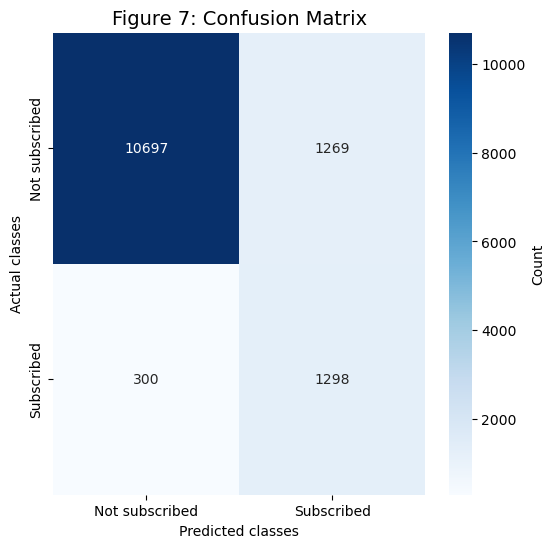

In [23]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=axs)
axs.set_xlabel('Predicted classes')
axs.set_ylabel('Actual classes')
axs.set_xticklabels(['Not subscribed', 'Subscribed'])
axs.set_yticklabels(['Subscribed', 'Not subscribed'][::-1])
axs.set_title('Figure 7: Confusion Matrix', fontsize=14)
cbar = axs.collections[0].colorbar
cbar.ax.set_ylabel('Count')
plt.show()

The confusion matrix allows to calculate various metrics that reflect the model performance. The results are summarized as follows:

•	The accuracy of 88,4% suggests that the model correctly predicted the class labels for the majority of cases. However, accuracy may not always be the best metric to evaluate the performance of a classifier, especially when the classes are imbalanced, as in this case.

•	Precision indicates that out of all the cases predicted as positive, only 50,6% are actually positive, while the remaining cases are false positives. A low precision score suggests that the model may be labeling a lot of non-subscribers as subscribers, which can lead to high marketing costs and low returns.

•	Sensitivity of 81,2% indicates that the model is able to correctly identify the majority of positive cases (i.e. people who subscribed to the term deposit). However, it is important to note that the model still misses about 19% of positive cases. This means that some potential subscribers may be overlooked, and the marketing campaign may not be as effective as it could be.

•	Specificity of 89,4% indicates that the model is able to correctly identify the majority of negative cases (i.e. people who did not subscribe to the term deposit). However, the model still misclassifies about 10,6% of negative cases as positive. This means that some non-subscribers may receive the marketing campaign, which can be annoying and lead to negative customer experiences.

In [24]:
# Calculate metrics for confusion matrix
accuracy = accuracy_score(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Accuracy: 0.8843261574756709
Precision: 0.5056486170627191
Sensitivity: 0.8122653316645807
Specificity: 0.8939495236503426


Figure 8 shows that the Area Under the Curve (AUC) of Receiver Operating Characteristic (ROC) metric equals 85%. It means that the model demonstrates a very good ability to distinguish between those potential customers who are likely to subscribe to a term deposit and those who are not.

Some authors outline the importance of having a balance between high true positive rate and low false positive rate, so one of the goals of the current research is to present the highest possible true positive rate while keeping false positive rate below 10% [1].

The best result of the model helped to identify 80% of actual term deposit subscribers while minimizing to 10% group of people who are predicted by the model to subscribe but actually did not obtain a term deposit subscription.

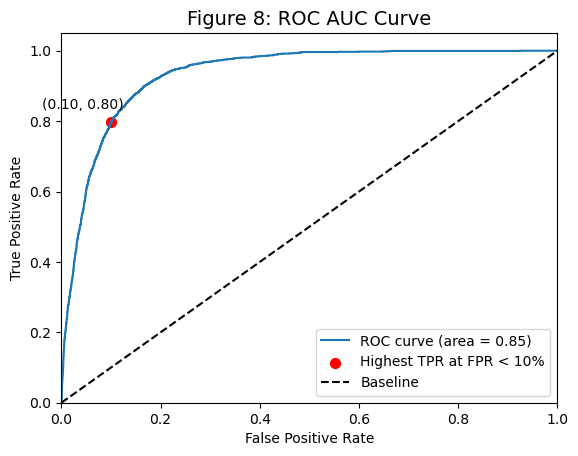

In [25]:
# Plot ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred)
idx = np.argwhere(fpr < 0.1)[-1]
coord = (fpr[idx], tpr[idx])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(coord[0], coord[1], s=50, c='red', label='Highest TPR at FPR < 10%')
plt.annotate('(%0.2f, %0.2f)' % coord, coord, textcoords="offset points", xytext=(-20, 10), ha='center')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 8: ROC AUC Curve', fontsize=14)
plt.legend(loc="lower right")
plt.show()

The code saves term deposit predictions on the test data in a separate CSV file. A customer ID was added to the dataset to facilitate the interpretation of the subscription predictions for the test data, as it was not present in the raw data. The predictions, along with the corresponding customer IDs, are available on [GitHub](https://github.com/Alexander-Kalita/Portuguese-bank-Case-study) in the Portuguese Bank Case Study repository.

In [26]:
# Create csv file with term deposit predictions on test data
customer_ids = range(1, len(X_test) + 1)
submission_df = pd.DataFrame({'id': customer_ids, 'psubscribed': y_test_pred})
submission_df.to_csv('Portuguese-bank-Predictions.csv', index=False)
submission_df.head()

id  psubscribed
0   1            0
1   2            0
2   3            0
3   4            1
4   5            0

### Model comparison

In this subsection, the performance of different machine learning models was compared based on multiple metrics to justify the selection of the XGBoost model as the final classification model.

Out of the five models analyzed, three models stood out in terms of different metrics. Feedforward neural networks achieved the highest possible specificity. Random forest showed the best results in accuracy and precision, while XGBoost achieved high results in sensitivity, ROC AUC and TPR at FPR <10%.

The balance of metrics was also considered across all models. XGBoost achieved high, balanced results (80% or more) across 5 out of 6 key metrics, indicating its overall superior performance. The random forest model also showed a similar balance of metrics, but its overall performance was not as high as that of XGBoost.

Although logistic regression and decision trees models may be computationally more efficient than XGBoost, their classification performance is much lower. Therefore, XGBoost was chosen as the final classification model due to its superior performance and balanced metrics.

### Table 2: Classification model comparison
| Models | Accuracy | Precision | Sensitivity | Specificity | ROC (AUC) | TPR at FPR <10% |
|--------|----------|-----------|-------------|-------------|-----------|-----------------|
| Logistic regression | 87,5% | 47,9% | 71,5% | 89,6% | 81% | 71% |
| Feedforward NN | 89% | 53,6% | 48,9% | 94,3% | 72% | 49% (6%) |
| Decision trees | 87,2% | 45,8% | 47,5% | 92,5% | 70% | 47% (8%) |
| Random forest | 89,4% | 53,7% | 71,7% | 91,7% | 82% | 77% |
| XG Boost | 88,4% | 50,6% | 81,2% | 89,3% | 85% | 80% |

# Conclusions and Recommendations

The current research provides some important conclusions as well as practical recommendations for the Portuguese bank.

**Best classification model**. The XGBoost model demonstrated excellent results with an accuracy of 88,4%, an ROC AUC metric of 85%, and a balanced TPR of 80% at a 10% FPR. These results demonstrate high accuracy in predicting term deposit subscribers, with the ROC AUC metric effectively distinguishing between subscribers and non-subscribers. Balancing the true positive and false positive rates is crucial for accurate positive predictions and optimizing resource utilization, leading to improved efficiency and increased sales revenue for the Portuguese bank.

Taking into account these model results, it is important to identify potential customers who are likely to subscribe to a term deposit and develop targeted marketing campaigns for these specific customer segments. This approach allows the bank to focus its resources and efforts on the customers with the highest likelihood of conversion, maximizing the impact of marketing activities and increasing the chances of successful term deposit subscriptions.

**Importance of past campaign success**. Customers who experienced a successful campaign in the past are 15,9% more likely to subscribe to a term deposit compared to those who did not. This highlights the impact of customer perception on trust and confidence in the bank and its offerings.
Understanding the factors behind past campaign success is crucial for enhancing future campaigns. Continuous monitoring, thorough evaluation, and adjustment of marketing messages contribute to a unique customer experience through iterative refinement and real-time experimentation.

To optimize marketing strategies and improve campaign outcomes, it is essential to have reliable data and track key metrics like conversion rates, customer feedback, and response rates. These insights provide valuable guidance for enhancing marketing approaches.

**Optimize call duration**. The research findings indicate that approximately 45,6% of term deposit subscriptions occur when customers spend between 9,7 and 33 minutes on the phone with the contact center. However, beyond 33 minutes, subscription rates exhibit a steady decline. Advanced predictive analysis reveals that potential customers with higher call durations were 9% more likely to subscribe. This highlights the importance of maintaining an extended yet reasonable call duration to provide a unique customer experience and improve sales revenue for the Portuguese bank.

To leverage the benefits of call duration, it is crucial to hire or assign employees with strong communication skills to the contact center. These employees should be trained to handle difficult interpersonal situations, particularly with conflicting customers, while also possessing a deep understanding of the benefits of term deposit subscriptions compared to competing offerings in the market.

**Focus on “productive” months**. The majority of term deposit subscriptions in a range between 43,8% to 52,0% occurred in March, September, October, and December, while the main contact month, May, had a low subscription rate (6,7%). The predictive model identifies March (5,6%) and June (5,3%) as the most important months for deposit subscriptions.

Recommendations include prioritizing campaigns in March, experimenting with more active approaches in June, September, October, and December, and minimizing resource allocation to less productive months like May.

# List of References

1. Moro S., Cortez P., & Rita P. (2014). A data-driven approach to predict the success of bank telemarketing. Decision Support Systems, 62: 22-31.
2. https://archive.ics.uci.edu/ml/datasets/bank+marketing# [accessed date: 11.05.2023].

# Appendix A

## Logistic regression

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
age             int64
job          category
marital      category
education    category
defaul

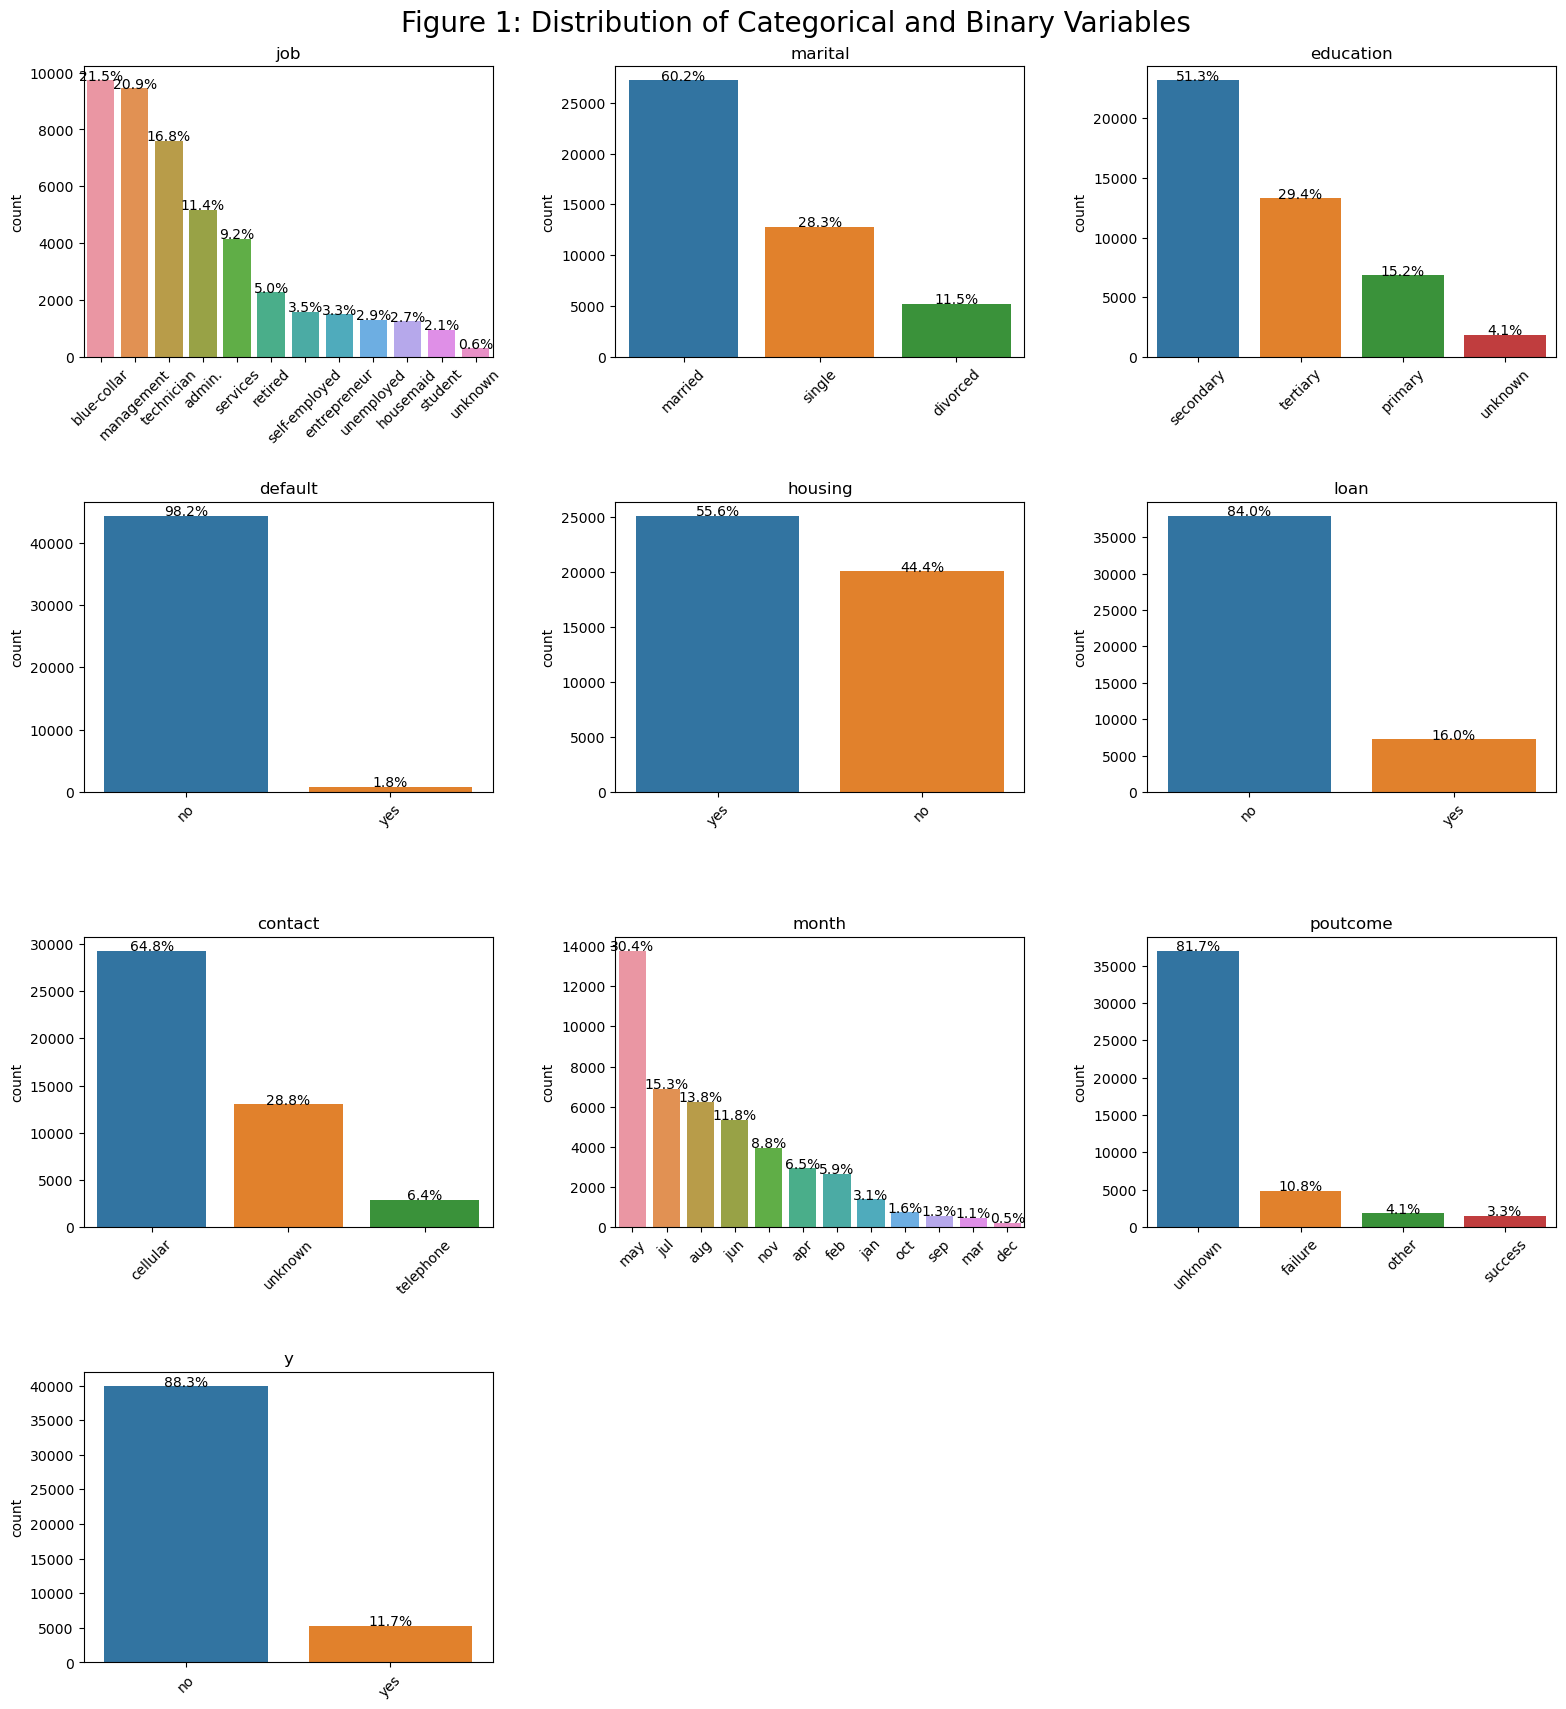

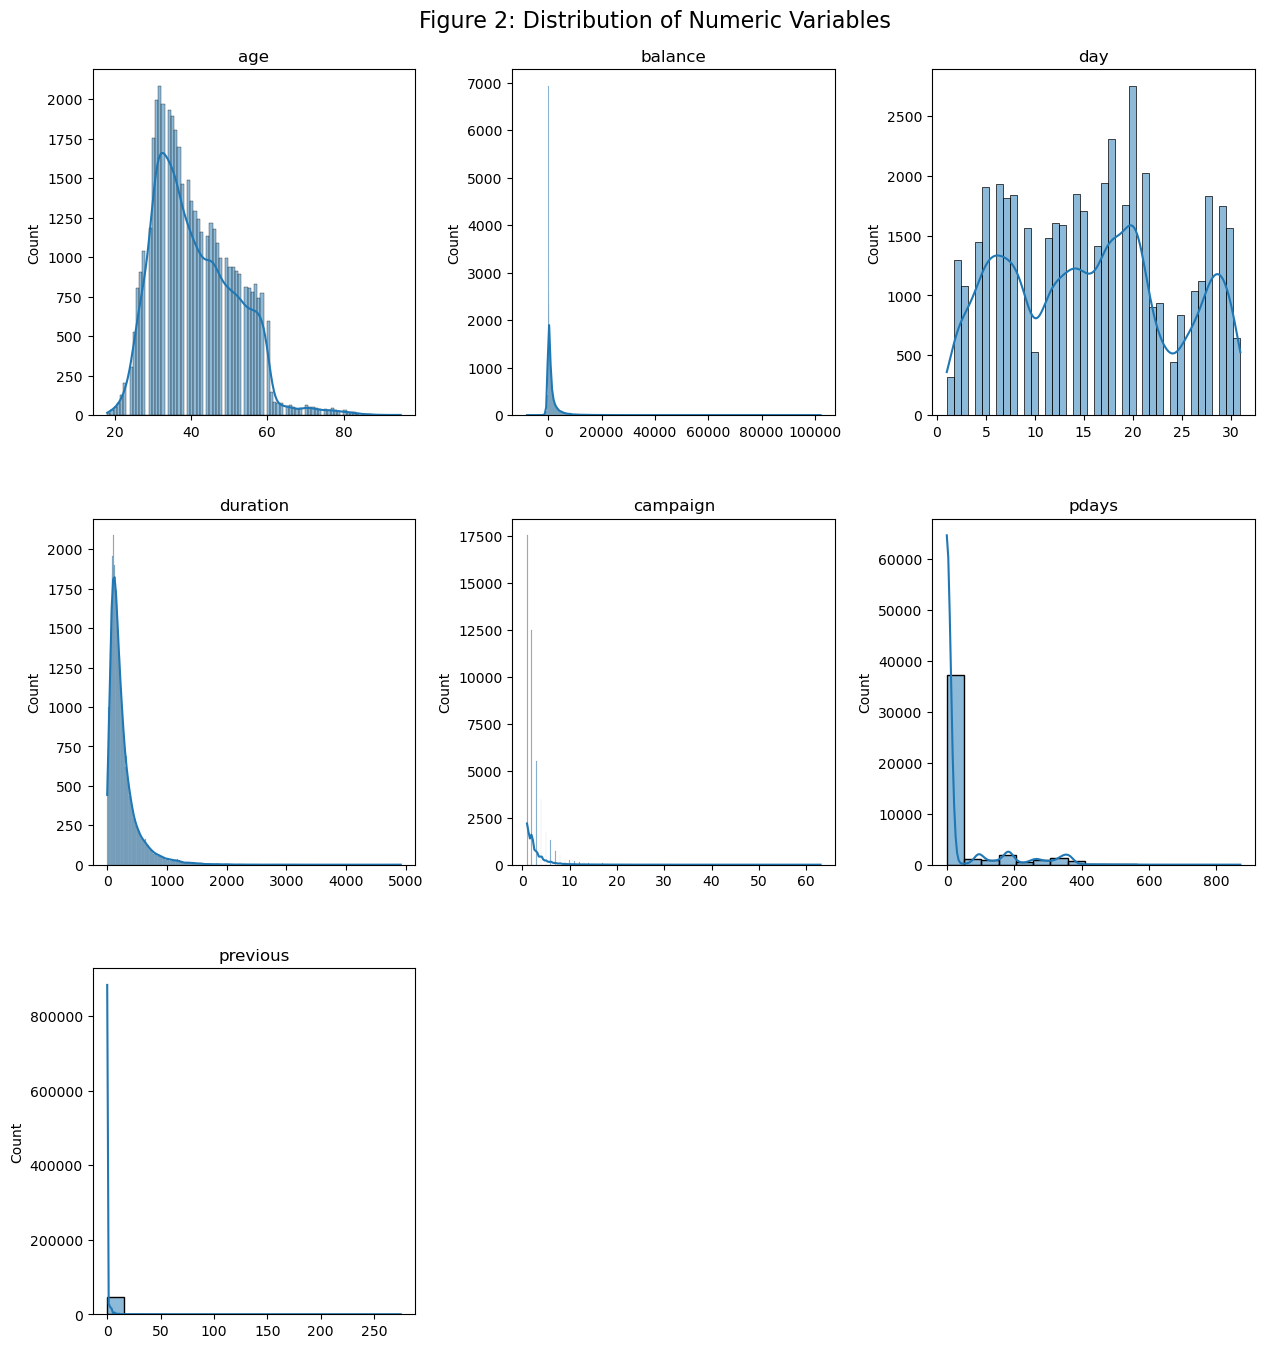

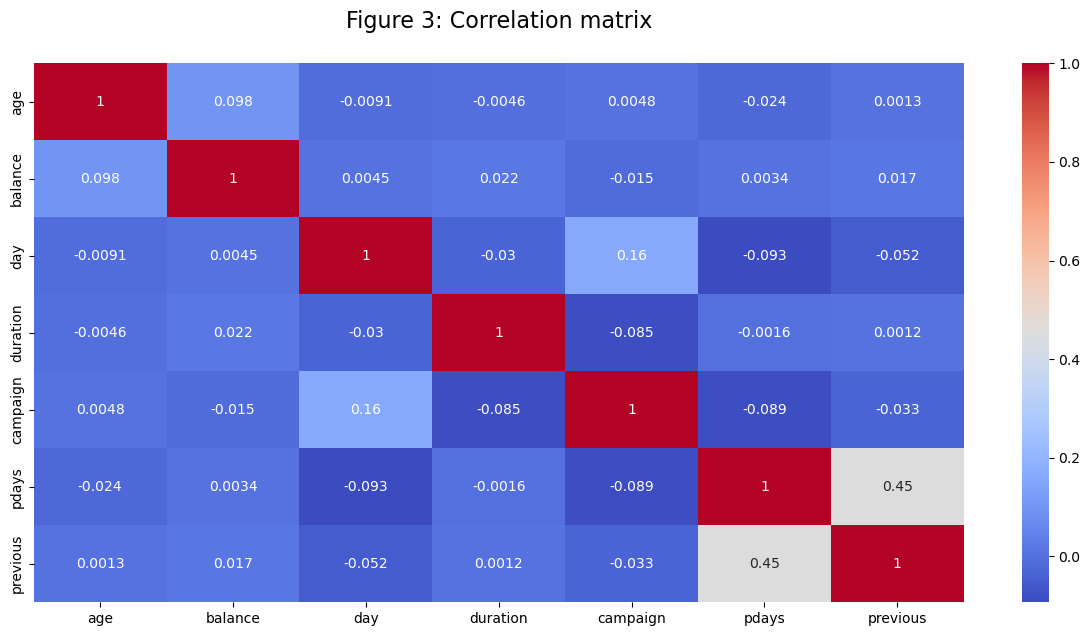

Number of duplicate rows: 0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Column: age
IQR: 15.0
Lower whisker: 10.5
Upper whisker: 70.5
Total number of outliers: 487


Column: balance
IQR: 1356.0
Lower whisker: -1962.0
Upper whisker: 3462.0
Total number of outliers: 4729


Column: day
IQR: 13.0
Lower whisker: -11.5
Upper whisker: 40.5
Total number of outliers: 0


Column: duration
IQR: 216.0
Lower whisker: -221.0
Upper whisker: 643.0
Total number of outliers: 3235


Column: campaign
IQR: 2.0
Lower whisker: -2.0
Upper whisker: 6.0
Total number of outliers: 3064


Column: pdays
IQR: 0.0
Lower whisker: -1.0
Upper whisker: -1.0
Total number of outliers: 8257


Column: previous
IQR: 0.0
Lower whisker: 0.0
Upper whisker: 0.0
Total number of outliers: 8257




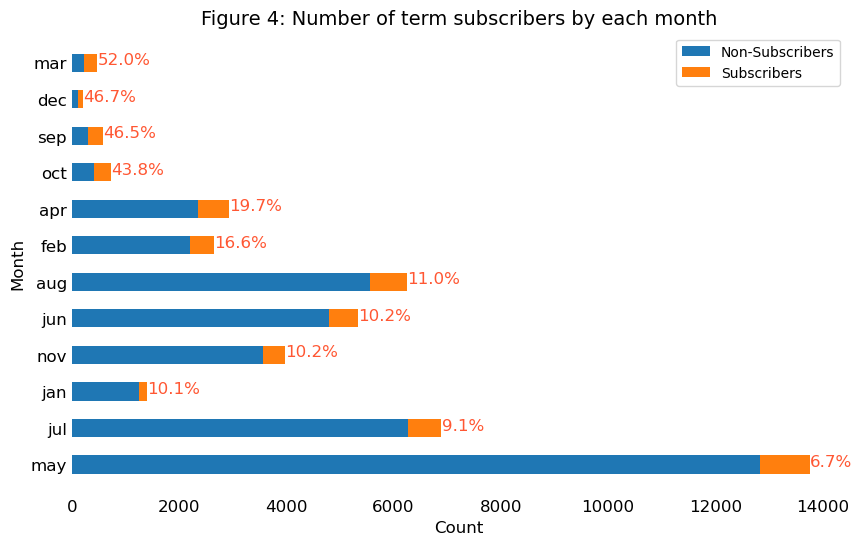

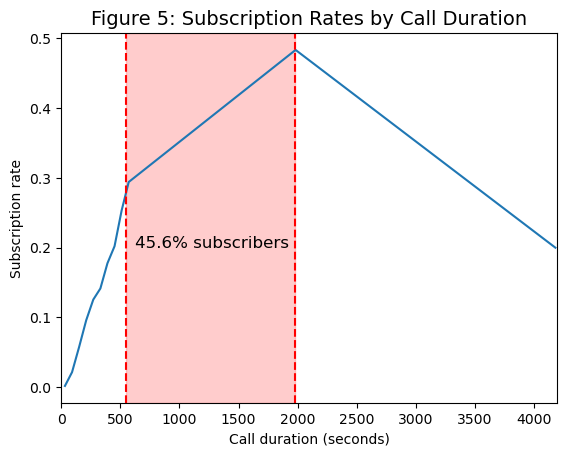

age     balance       day  duration  campaign     pdays  previous
0  2.828869  733.541036  3.551032  8.284871  0.487299 -1.949658      -0.0
1  2.701662   19.404127  3.551032  7.175362  0.487299 -1.949658      -0.0
2  2.562883    1.802083  3.551032  5.898797  0.487299 -1.949658      -0.0
3  2.732573  545.749528  3.551032  6.241565  0.487299 -1.949658      -0.0
4  2.562883    0.939543  3.551032  7.714252  0.487299 -1.949658      -0.0

y  job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0  0                0                 0              0               1   
1  0                0                 0              0               0   
2  0                0                 1              0               0   
3  0                1                 0              0               0   
4  0                0                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   
1            0                  0             0            0               1   
2            0                  0             0            0               0   
3            0                  0             0            0               0   
4            0                  0             0            0               0   

   ...  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0  ...          0          0          0          1          0          0   
1  ...          0          0          0          1          0          0   
2  ...          0          0          0          1          0          0   
3  ...          0          0          0          1          0          0   
4  ...          0          0          0          1          0          0   

   month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0          0               0                 0                 1  
1          0               0                 0                 1  
2          0               0                 0                 1  
3          0               0                 0                 1  
4          0               0                 0                 1  

[5 rows x 36 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  45211 non-null  float64 
 1   balance              45211 non-null  float64 
 2   day                  45211 non-null  float64 
 3   duration             45211 non-null  float64 
 4   campaign             45211 non-null  float64 
 5   pdays                45211 non-null  float64 
 6   previous             45211 non-null  float64 
 7   job_blue-collar      45211 non-null  uint8   
 8   job_entrepreneur     45211 non-null  uint8   
 9   job_housemaid        45211 non-null  uint8   
 10  job_management       45211 non-null  uint8   
 11  job_retired          45211 non-null  uint8   
 12  job_self-employed    45211 non-null  uint8   
 13  job_services         45211 non-null  uint8   
 14  job_student          45211 non-null  uint8   
 15  job_technician     

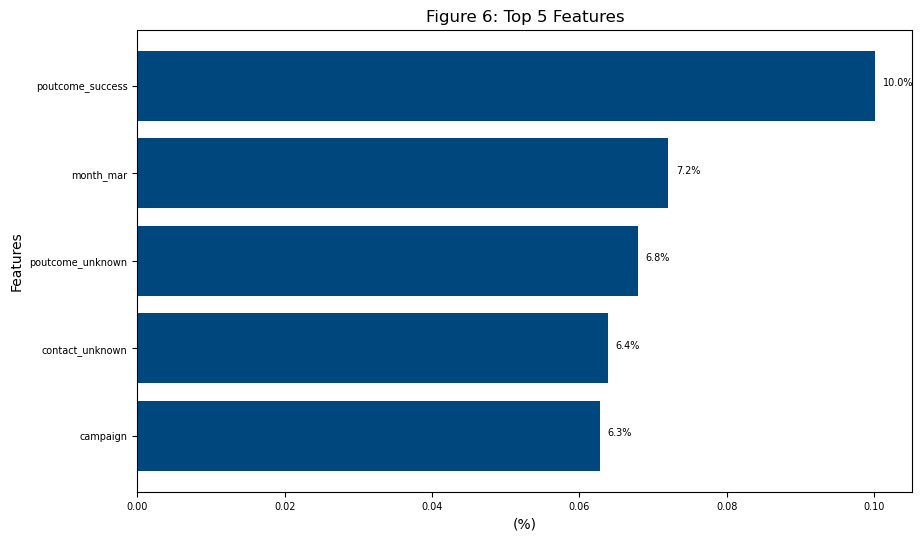

Threshold: 0.2
Test Accuracy: 0.8746682394573873


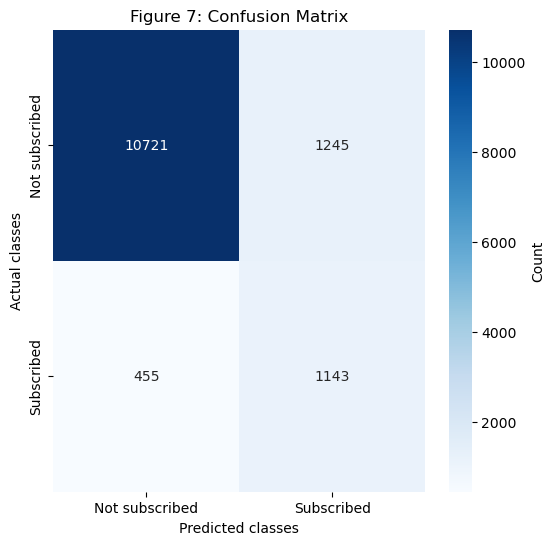

Accuracy: 0.8746682394573873
Precision: 0.478643216080402
Sensitivity: 0.7152690863579474
Specificity: 0.8959552064181848


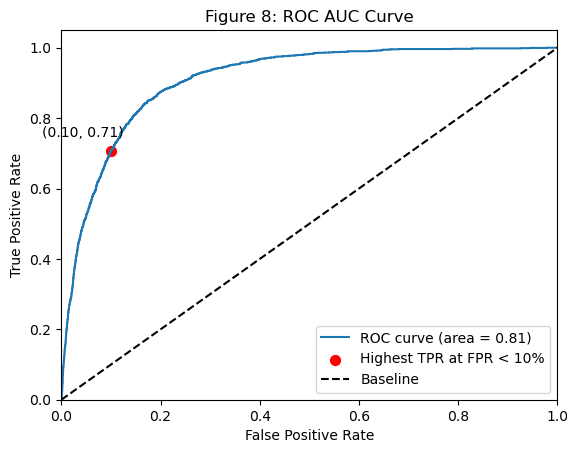

In [27]:
# Load packages in Python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import yeojohnson
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Load dataset
bank_data = pd.read_csv('C:/Users/Alexander_Kalita/Desktop/2_Portuguese_bank/bank-full.csv', sep=",")
bank_data.head()

# View data structure
print(bank_data.info())

# Change object into category type variables
for col in bank_data.select_dtypes(include='object').columns:
    bank_data[col] = bank_data [col].astype('category')
print(bank_data.dtypes)

# Visualize categorical and binary variables
cat_cols = bank_data.select_dtypes(include=['category']).columns.tolist()
def create_countplots(data, cat_cols):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(19, 19))
    plt.subplots_adjust(wspace=0.3, hspace=0.5, top=0.95)
    fig.suptitle("Figure 1: Distribution of Categorical and Binary Variables", fontsize=20)
    for ax, feat in zip(axes.flat, cat_cols):
        sns.countplot(x=data[feat], ax=ax, order=data[feat].value_counts().index)
        ax.set_title(feat)
        ax.set_xlabel("")
        ax.tick_params(axis='x', rotation=45)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height+3,
            '{:.1f}%'.format(height/len(data)*100), ha="center")
    empty_ax = axes.flat[len(cat_cols):]
    for ax in empty_ax:
        ax.remove()
create_countplots(bank_data, cat_cols)

# Visualize numeric variables
num_cols = bank_data.select_dtypes(include=['int64']).columns.tolist()
def create_distplots(data, num_cols):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
    plt.subplots_adjust(wspace=0.3, hspace=0.3, top=0.94)
    fig.suptitle("Figure 2: Distribution of Numeric Variables", fontsize=16)
    for ax, feat in zip(axes.flat, num_cols):
        sns.histplot(data=data, x=feat, kde=True, ax=ax)
        ax.set_title(feat)
        ax.set_xlabel("")
    empty_ax = axes.flat[len(num_cols):]
    for ax in empty_ax:
        ax.remove()     
create_distplots(bank_data, num_cols)

# Create correlation matrix
corr = bank_data.corr()
plt.figure(figsize=(15, 7))
plt.title('Figure 3: Correlation matrix', y=1.05, size=16)
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

# Check duplicated data
duplicates = bank_data[bank_data.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])
bank_data = bank_data.drop_duplicates()

# Check for missing values
print(bank_data.isnull().sum())

# Check for outliers
numeric_cols = bank_data.select_dtypes(include=['int64']).columns.tolist()
for col in numeric_cols:
    Q1 = bank_data[col].quantile(0.25)
    Q3 = bank_data [col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    num_outliers = bank_data [(bank_data [col] < lower) | (bank_data [col] > upper)][col].count()
    print('Column:', col)
    print('IQR:', IQR)
    print('Lower whisker:', lower)
    print('Upper whisker:', upper)
    print('Total number of outliers:', num_outliers)
    print('\n')

# Barplot: Number of term subscribers by each month
subscribers_by_month = bank_data.groupby(['month', 'y']).size().unstack().fillna(0)
subscribers_by_month['Total'] = subscribers_by_month.sum(axis=1)
subscribers_by_month['Percent_Subscribers'] = subscribers_by_month['yes']/subscribers_by_month['Total']*100
subscribers_by_month = subscribers_by_month.sort_values(by='Percent_Subscribers', ascending=True)
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#ff5733']
ax.barh(subscribers_by_month.index, subscribers_by_month['no'], height=0.5, color=colors[0], label='Non-Subscribers')
ax.barh(subscribers_by_month.index, subscribers_by_month['yes'], height=0.5, left=subscribers_by_month['no'], color=colors[1], label='Subscribers')
for i, v in enumerate(subscribers_by_month['Percent_Subscribers']):
    ax.text(subscribers_by_month.iloc[i,1] + subscribers_by_month.iloc[i,0] + 1, i - 0.05, str(round(v,1)) + '%', color=colors[2], fontsize=12)
ax.legend(loc='upper right')
ax.set_title('Figure 4: Number of term subscribers by each month', fontsize=14)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Month', fontsize=12)
ax.tick_params(axis='both', labelsize=12, length=0)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()

# Line plot: Subscription rates by call duration
duration_ranges = [(0, 60), (60, 120), (120, 180), (180, 240), (240, 300), (300, 360), (360, 420), (420, 480), (480, 540), (540, 600), (600, 3366), (3366, 5000)]
call_durations = []
sub_rates = []
for duration_range in duration_ranges:
    subset = bank_data[(bank_data['duration'] >= duration_range[0]) & (bank_data['duration'] <= duration_range[1])]
    sub_rate = subset['y'].value_counts(normalize=True)['yes']
    call_durations.append((duration_range[0]+duration_range[1])/2)
    sub_rates.append(sub_rate)
subset = bank_data[(bank_data['duration'] >= 550) & (bank_data['duration'] <= 1980)]
sub_rate_range = subset['y'].value_counts(normalize=True)['yes']
fig, ax = plt.subplots()
ax.plot(call_durations, sub_rates)
ax.set_xlabel('Call duration (seconds)')
ax.set_ylabel('Subscription rate')
ax.axvline(x=550, linestyle='--', color='red')
ax.axvline(x=1980, linestyle='--', color='red')
ax.axvspan(550, 1980, alpha=0.2, color='red')
ax.text(620, 0.2, '{:.1%} subscribers'.format(sub_rate_range), fontsize=12)
ax.set_xlim(0, 4200)
ax.set_title('Figure 5: Subscription Rates by Call Duration', fontsize=14)
plt.show()

# Separate the features and the target variable
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Transform numeric variables using the Yeo-Johnson transformation
num_cols = bank_data.select_dtypes(include=['int64']).columns
transformed_data = pd.DataFrame()
for col in num_cols:
    transformed_data[col] = yeojohnson(bank_data[col])[0]
bank_data.drop(columns=num_cols, inplace=True)
display(transformed_data.head())

# Transform categorical variables into binary variables
cat_vars = ['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
binary_data = pd.get_dummies(bank_data[cat_vars], columns=cat_vars, drop_first=True)
bank_data.drop(columns=cat_vars, inplace=True)
bank_data['y'] = bank_data['y'].map({'no': 0, 'yes': 1})
X = pd.concat([bank_data, binary_data], axis=1)
y = bank_data['y']
display(X.head())

# Combine the transformed numerical and categorical variables into a single dataset
final_data = pd.concat([transformed_data, binary_data, bank_data['y']], axis=1)
X = final_data.drop(columns=['y'])
y = final_data['y']
final_data.info()

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Training data shape:', X_train.shape, y_train.shape)
print('Testing data shape:', X_test.shape, y_test.shape)

# Build logistic regression model with 5-fold-cross-validation
logreg_cv = LogisticRegressionCV(cv=5, penalty='l2', solver='liblinear')
logreg_cv.fit(X_train, y_train)
scores = logreg_cv.scores_[1].mean(axis=0)
print('Best regularization parameter:', logreg_cv.C_[0])
print("Cross-validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Plot relative feature importance
importances = np.abs(logreg_cv.coef_[0])
importances = importances / np.sum(importances)
top_k = 5
top_indices = np.argsort(importances)[-top_k:]
top_importances = importances[top_indices]
top_feature_names = X.columns[top_indices]
plt.figure(figsize=(10, 6))
plt.barh(range(top_k), top_importances, align='center', color='#00477e')
plt.yticks(range(top_k), top_feature_names)
plt.xlabel("(%)")
plt.ylabel("Features")
plt.title("Figure 6: Top 5 Features".format(top_k))
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
for i, v in enumerate(top_importances):
    plt.text(v + 0.001, i, str(round(v*100, 1))+'%', fontsize=7)
plt.show()

# Predict on test data
threshold = 0.2
y_test_pred_prob = logreg_cv.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_pred_prob >= threshold, 1, 0)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Threshold:', threshold)
print('Test Accuracy:', test_accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=axs)
axs.set_xlabel('Predicted classes')
axs.set_ylabel('Actual classes')
axs.set_xticklabels(['Not subscribed', 'Subscribed'])
axs.set_yticklabels(['Subscribed', 'Not subscribed'][::-1])
axs.set_title('Figure 7: Confusion Matrix')
cbar = axs.collections[0].colorbar
cbar.ax.set_ylabel('Count')
plt.show()

# Calculate metrics for confusion matrix
accuracy = accuracy_score(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

# Plot ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred)
idx = np.argwhere(fpr < 0.1)[-1]
coord = (fpr[idx], tpr[idx])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(coord[0], coord[1], s=50, c='red', label='Highest TPR at FPR < 10%')
plt.annotate('(%0.2f, %0.2f)' % coord, coord, textcoords="offset points", xytext=(-20, 10), ha='center')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 8: ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

## Feedforward Neural Networks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
age             int64
job          category
marital      category
education    category
defaul

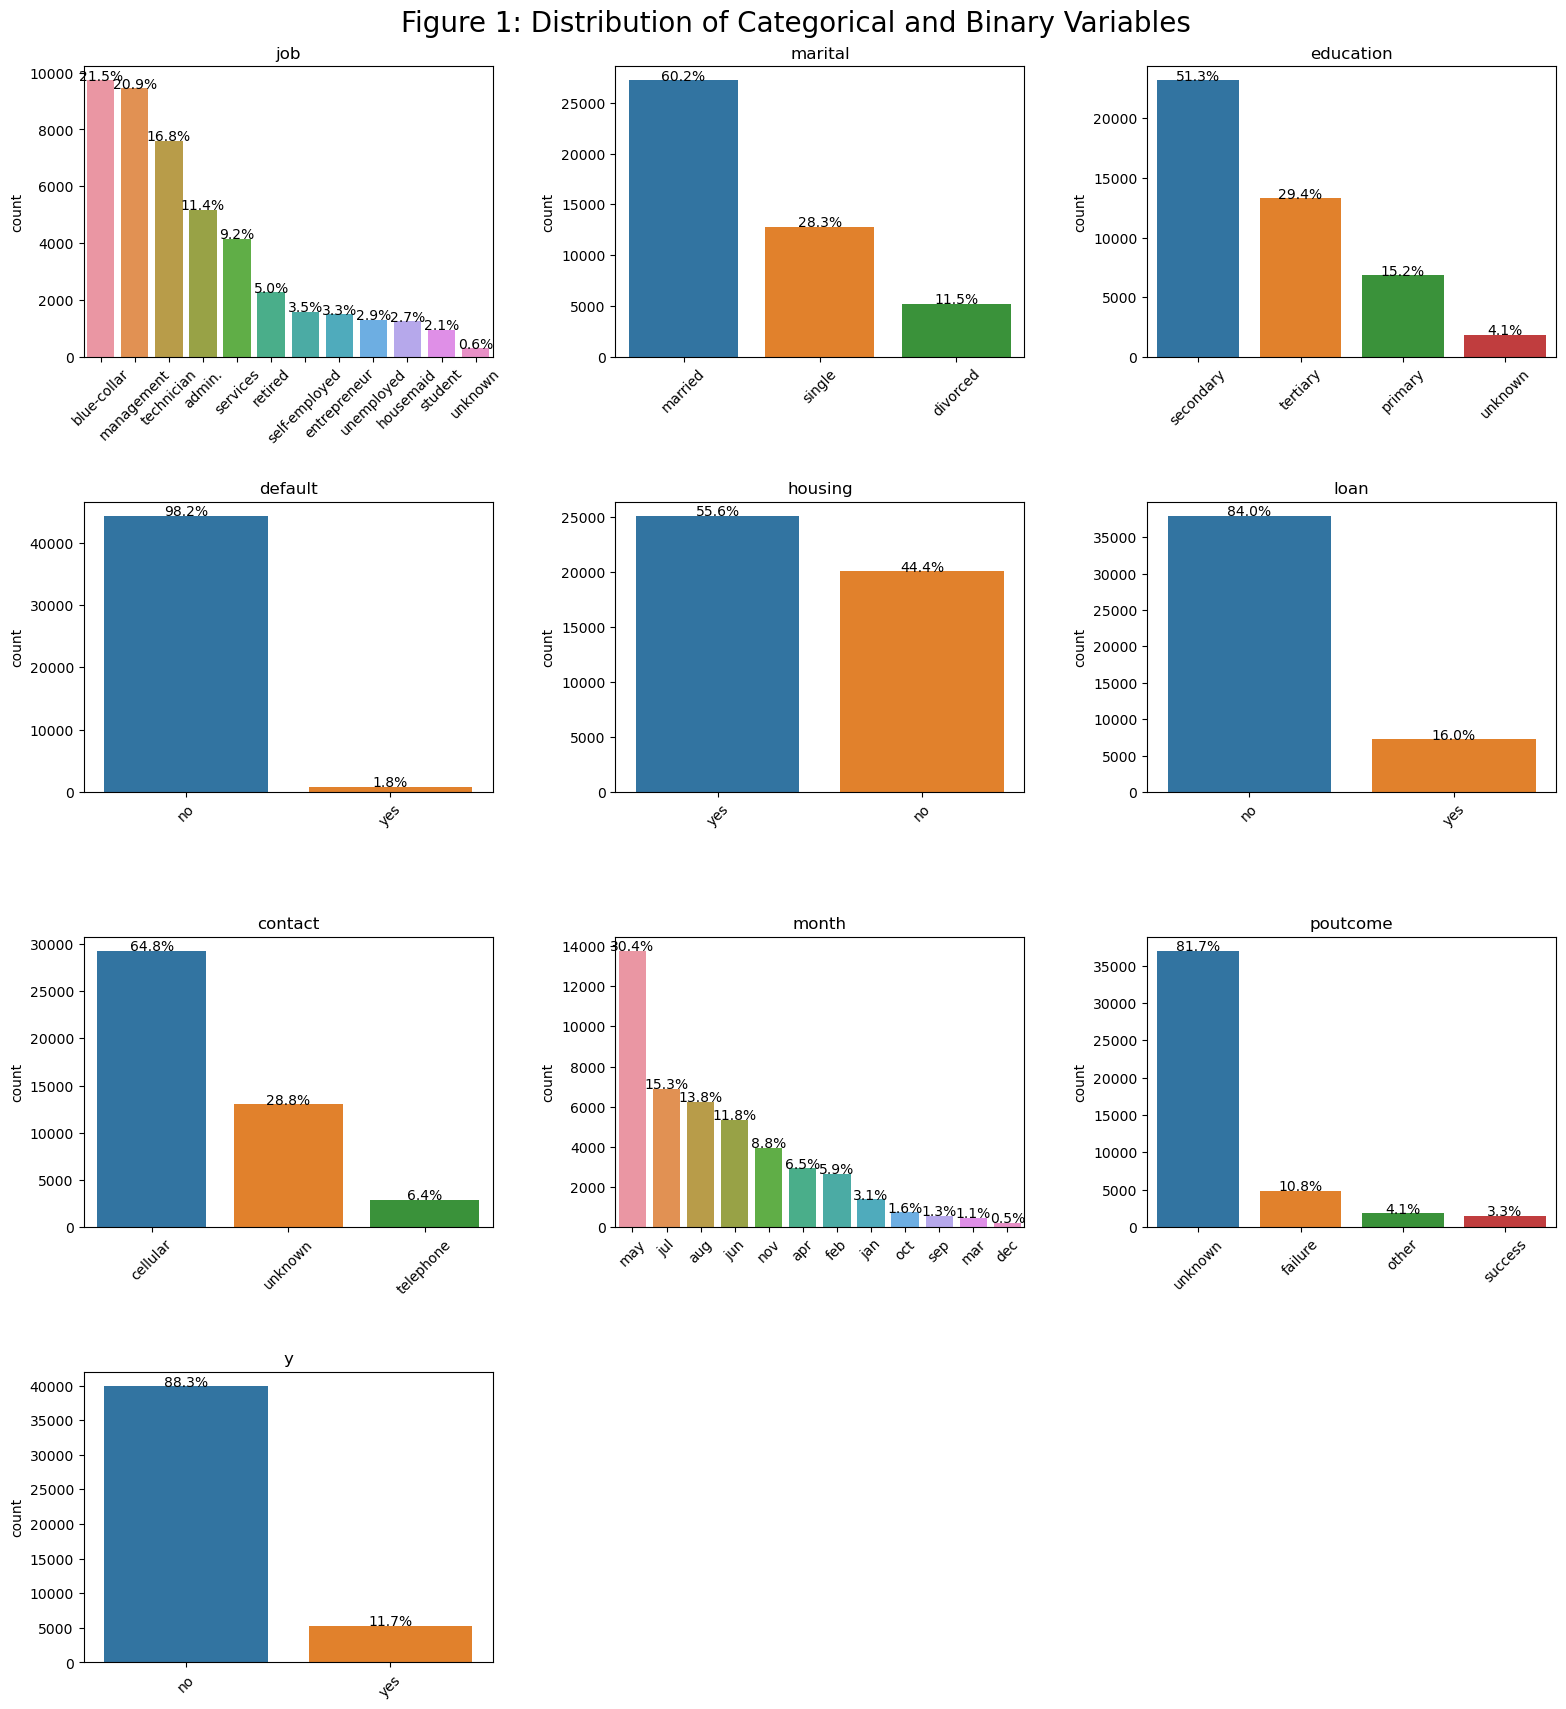

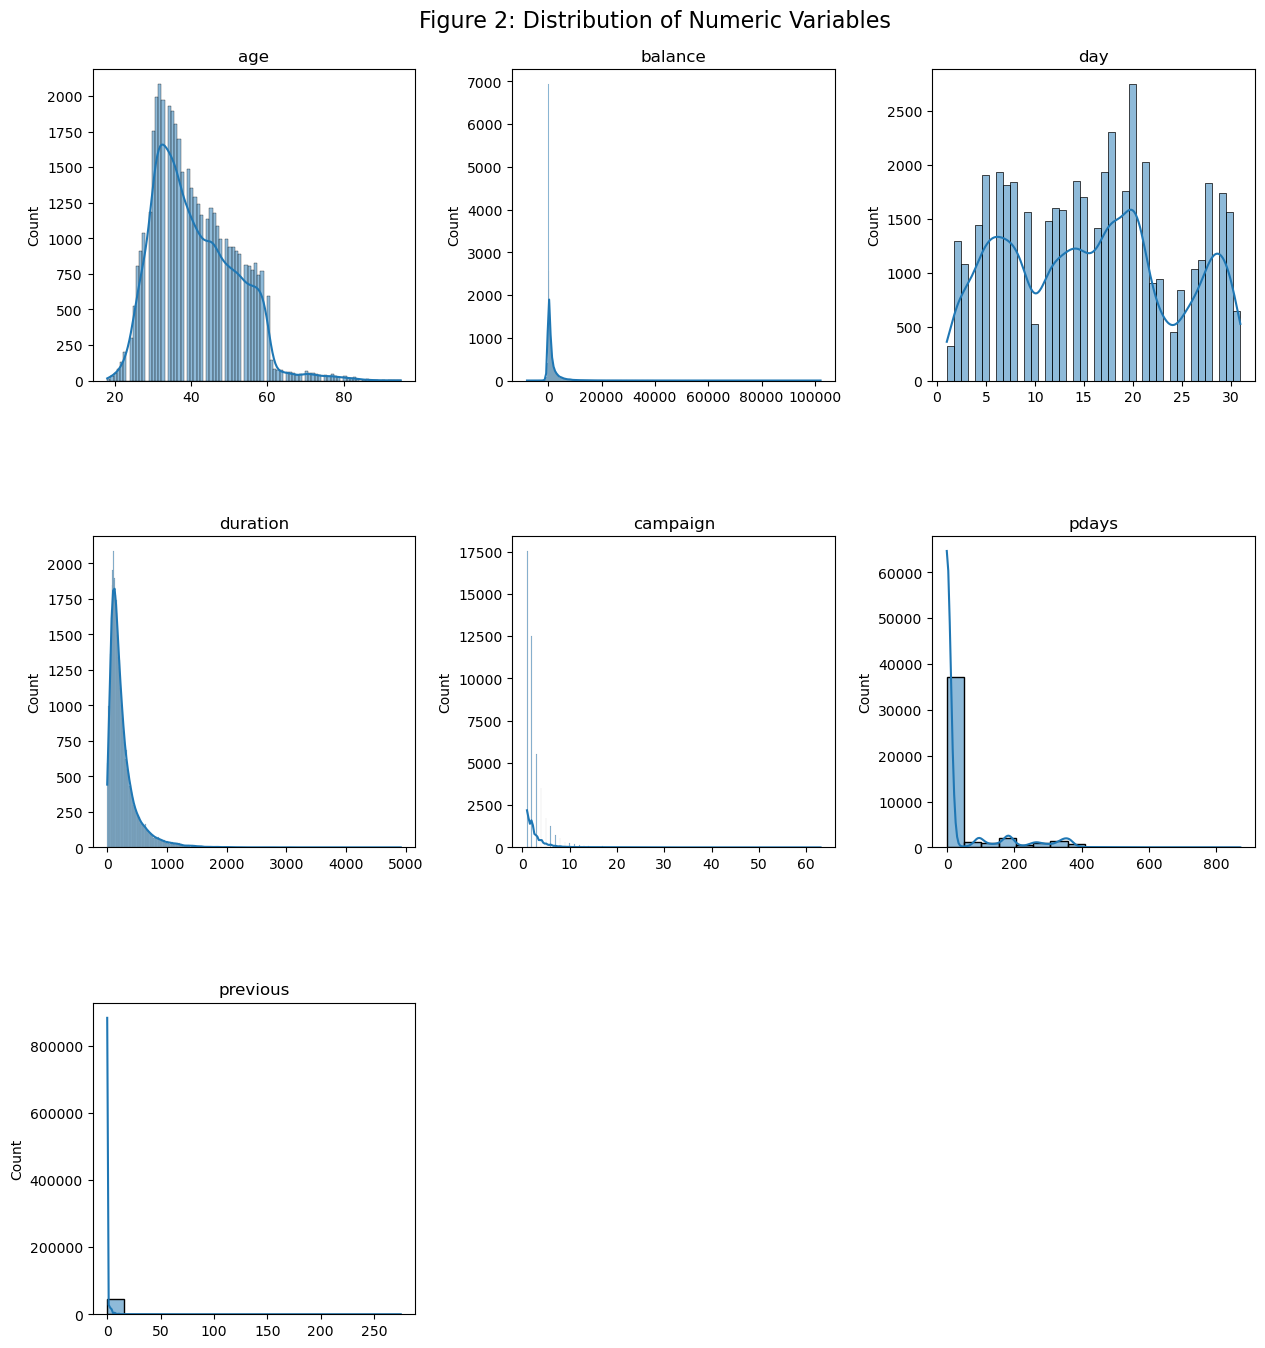

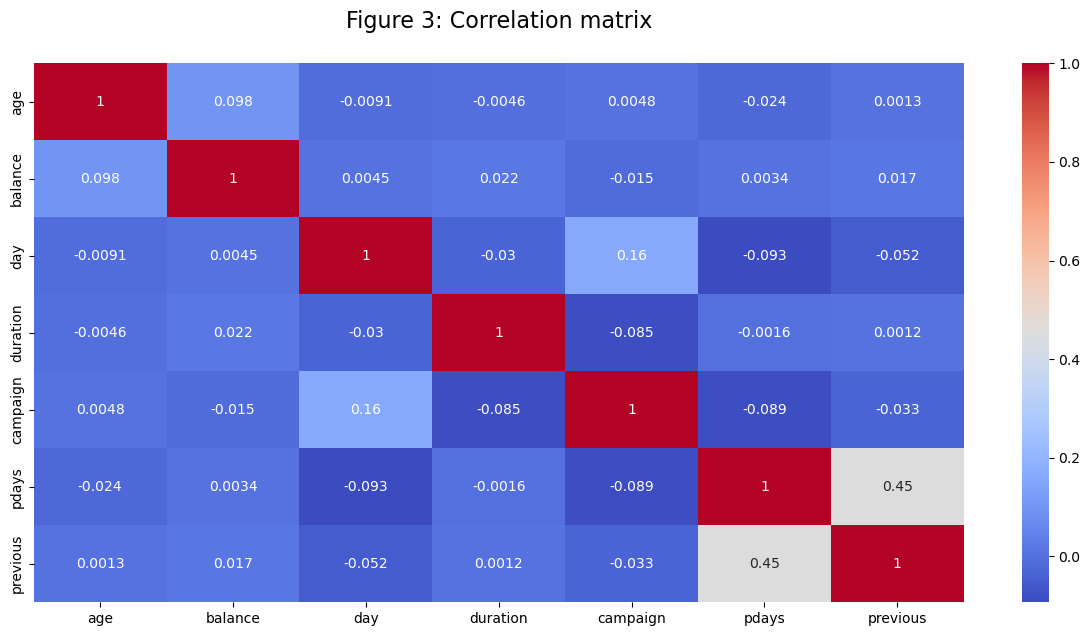

Number of duplicate rows: 0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Column: age
IQR: 15.0
Lower whisker: 10.5
Upper whisker: 70.5
Total number of outliers: 487


Column: balance
IQR: 1356.0
Lower whisker: -1962.0
Upper whisker: 3462.0
Total number of outliers: 4729


Column: day
IQR: 13.0
Lower whisker: -11.5
Upper whisker: 40.5
Total number of outliers: 0


Column: duration
IQR: 216.0
Lower whisker: -221.0
Upper whisker: 643.0
Total number of outliers: 3235


Column: campaign
IQR: 2.0
Lower whisker: -2.0
Upper whisker: 6.0
Total number of outliers: 3064


Column: pdays
IQR: 0.0
Lower whisker: -1.0
Upper whisker: -1.0
Total number of outliers: 8257


Column: previous
IQR: 0.0
Lower whisker: 0.0
Upper whisker: 0.0
Total number of outliers: 8257




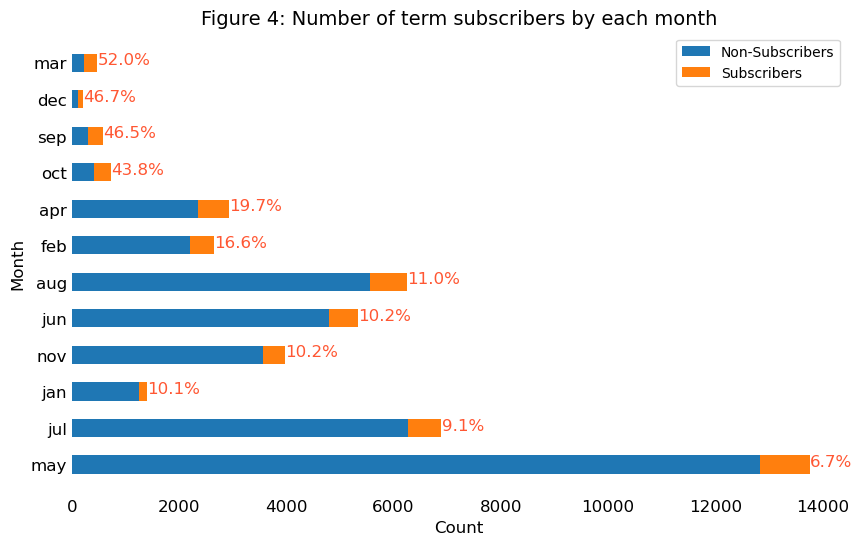

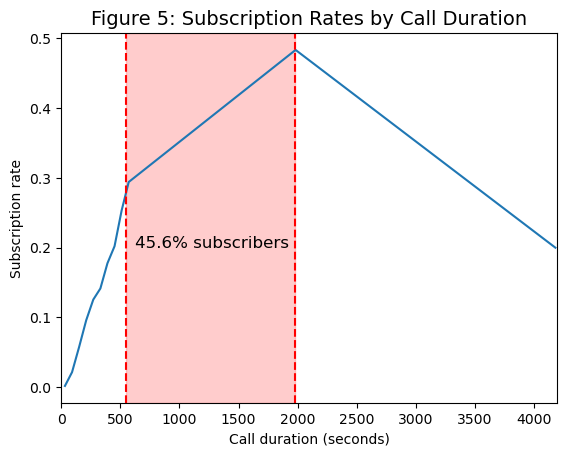

age     balance       day  duration  campaign     pdays  previous
0  2.828869  733.541036  3.551032  8.284871  0.487299 -1.949658      -0.0
1  2.701662   19.404127  3.551032  7.175362  0.487299 -1.949658      -0.0
2  2.562883    1.802083  3.551032  5.898797  0.487299 -1.949658      -0.0
3  2.732573  545.749528  3.551032  6.241565  0.487299 -1.949658      -0.0
4  2.562883    0.939543  3.551032  7.714252  0.487299 -1.949658      -0.0

y  job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0  0                0                 0              0               1   
1  0                0                 0              0               0   
2  0                0                 1              0               0   
3  0                1                 0              0               0   
4  0                0                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   
1            0                  0             0            0               1   
2            0                  0             0            0               0   
3            0                  0             0            0               0   
4            0                  0             0            0               0   

   ...  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0  ...          0          0          0          1          0          0   
1  ...          0          0          0          1          0          0   
2  ...          0          0          0          1          0          0   
3  ...          0          0          0          1          0          0   
4  ...          0          0          0          1          0          0   

   month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0          0               0                 0                 1  
1          0               0                 0                 1  
2          0               0                 0                 1  
3          0               0                 0                 1  
4          0               0                 0                 1  

[5 rows x 36 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  45211 non-null  float64 
 1   balance              45211 non-null  float64 
 2   day                  45211 non-null  float64 
 3   duration             45211 non-null  float64 
 4   campaign             45211 non-null  float64 
 5   pdays                45211 non-null  float64 
 6   previous             45211 non-null  float64 
 7   job_blue-collar      45211 non-null  uint8   
 8   job_entrepreneur     45211 non-null  uint8   
 9   job_housemaid        45211 non-null  uint8   
 10  job_management       45211 non-null  uint8   
 11  job_retired          45211 non-null  uint8   
 12  job_self-employed    45211 non-null  uint8   
 13  job_services         45211 non-null  uint8   
 14  job_student          45211 non-null  uint8   
 15  job_technician     

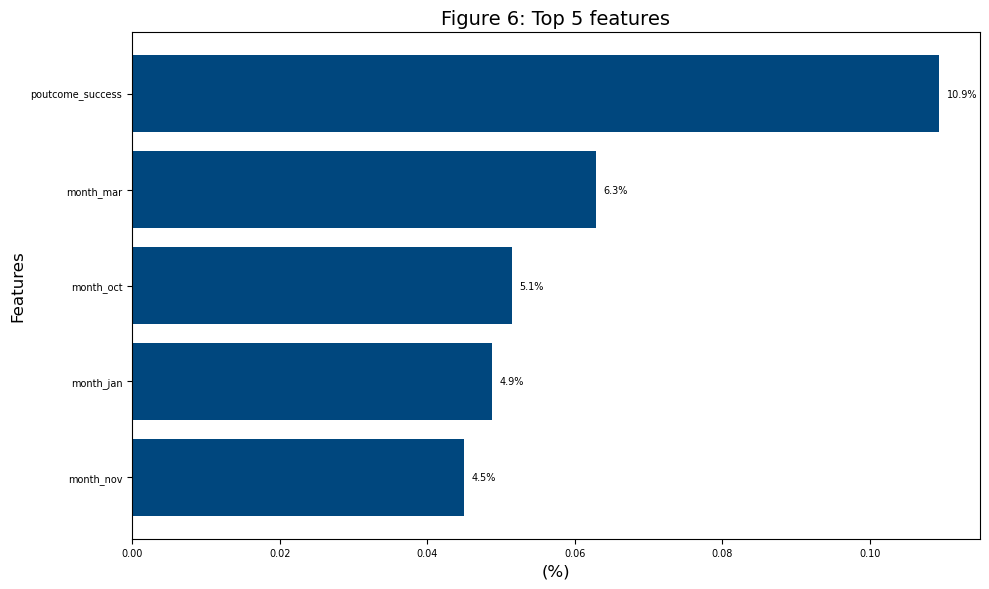

424/424 [==============================] - 1s 1ms/step
Threshold: 0.2
Test Accuracy: 0.8899292244175759


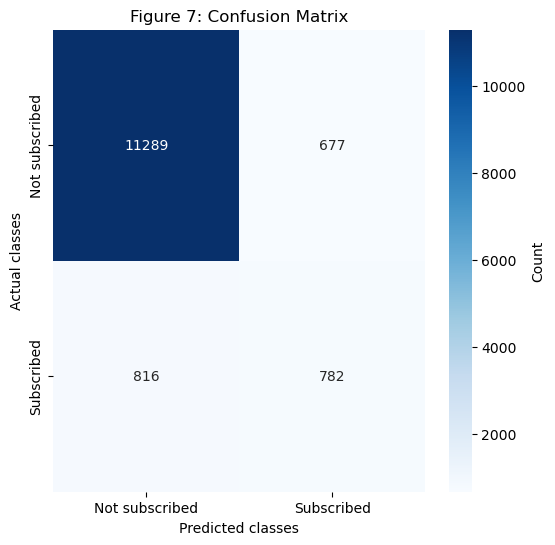

Accuracy: 0.8899292244175759
Precision: 0.5359835503769705
Sensitivity: 0.48936170212765956
Specificity: 0.9434230319237841


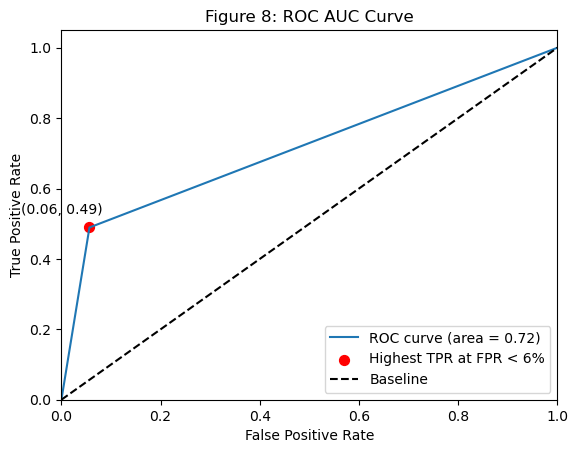

In [28]:
# Load packages in Python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from scipy.stats import yeojohnson
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Load dataset
bank_data = pd.read_csv('C:/Users/Alexander_Kalita/Desktop/2_Portuguese_bank/bank-full.csv', sep=",")
bank_data.head()

# View data structure
print(bank_data.info())

# Change object into category type variables
for col in bank_data.select_dtypes(include='object').columns:
    bank_data[col] = bank_data [col].astype('category')
print(bank_data.dtypes)

# Visualize categorical and binary variables
cat_cols = bank_data.select_dtypes(include=['category']).columns.tolist()
def create_countplots(data, cat_cols):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(19, 19))
    plt.subplots_adjust(wspace=0.3, hspace=0.5, top=0.95)
    fig.suptitle("Figure 1: Distribution of Categorical and Binary Variables", fontsize=20)
    for ax, feat in zip(axes.flat, cat_cols):
        sns.countplot(x=data[feat], ax=ax, order=data[feat].value_counts().index)
        ax.set_title(feat)
        ax.set_xlabel("")
        ax.tick_params(axis='x', rotation=45)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height+3,
            '{:.1f}%'.format(height/len(data)*100), ha="center")
    empty_ax = axes.flat[len(cat_cols):]
    for ax in empty_ax:
        ax.remove()
create_countplots(bank_data, cat_cols)

# Visualize numeric variables
num_cols = bank_data.select_dtypes(include=['int64']).columns.tolist()
def create_distplots(data, num_cols):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
    plt.subplots_adjust(wspace=0.3, hspace=0.5, top=0.94)
    fig.suptitle("Figure 2: Distribution of Numeric Variables", fontsize=16)
    for ax, feat in zip(axes.flat, num_cols):
        sns.histplot(data=data, x=feat, kde=True, ax=ax)
        ax.set_title(feat)
        ax.set_xlabel("")
    empty_ax = axes.flat[len(num_cols):]
    for ax in empty_ax:
        ax.remove()     
create_distplots(bank_data, num_cols)

# Create correlation matrix
corr = bank_data.corr()
plt.figure(figsize=(15, 7))
plt.title('Figure 3: Correlation matrix', y=1.05, size=16)
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

# Check duplicated data
duplicates = bank_data[bank_data.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])
bank_data = bank_data.drop_duplicates()

# Check for missing values
print(bank_data.isnull().sum())

# Check for outliers
numeric_cols = bank_data.select_dtypes(include=['int64']).columns.tolist()
for col in numeric_cols:
    Q1 = bank_data[col].quantile(0.25)
    Q3 = bank_data [col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    num_outliers = bank_data [(bank_data [col] < lower) | (bank_data [col] > upper)][col].count()
    print('Column:', col)
    print('IQR:', IQR)
    print('Lower whisker:', lower)
    print('Upper whisker:', upper)
    print('Total number of outliers:', num_outliers)
    print('\n')

# Barplot: Number of term subscribers by each month
subscribers_by_month = bank_data.groupby(['month', 'y']).size().unstack().fillna(0)
subscribers_by_month['Total'] = subscribers_by_month.sum(axis=1)
subscribers_by_month['Percent_Subscribers'] = subscribers_by_month['yes']/subscribers_by_month['Total']*100
subscribers_by_month = subscribers_by_month.sort_values(by='Percent_Subscribers', ascending=True)
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#ff5733']
ax.barh(subscribers_by_month.index, subscribers_by_month['no'], height=0.5, color=colors[0], label='Non-Subscribers')
ax.barh(subscribers_by_month.index, subscribers_by_month['yes'], height=0.5, left=subscribers_by_month['no'], color=colors[1], label='Subscribers')
for i, v in enumerate(subscribers_by_month['Percent_Subscribers']):
    ax.text(subscribers_by_month.iloc[i,1] + subscribers_by_month.iloc[i,0] + 1, i - 0.05, str(round(v,1)) + '%', color=colors[2], fontsize=12)
ax.legend(loc='upper right')
ax.set_title('Figure 4: Number of term subscribers by each month', fontsize=14)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Month', fontsize=12)
ax.tick_params(axis='both', labelsize=12, length=0)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()

# Line plot: Subscription rates by call duration
duration_ranges = [(0, 60), (60, 120), (120, 180), (180, 240), (240, 300), (300, 360), (360, 420), (420, 480), (480, 540), (540, 600), (600, 3366), (3366, 5000)]
call_durations = []
sub_rates = []
for duration_range in duration_ranges:
    subset = bank_data[(bank_data['duration'] >= duration_range[0]) & (bank_data['duration'] <= duration_range[1])]
    sub_rate = subset['y'].value_counts(normalize=True)['yes']
    call_durations.append((duration_range[0]+duration_range[1])/2)
    sub_rates.append(sub_rate)
subset = bank_data[(bank_data['duration'] >= 550) & (bank_data['duration'] <= 1980)]
sub_rate_range = subset['y'].value_counts(normalize=True)['yes']
fig, ax = plt.subplots()
ax.plot(call_durations, sub_rates)
ax.set_xlabel('Call duration (seconds)')
ax.set_ylabel('Subscription rate')
ax.axvline(x=550, linestyle='--', color='red')
ax.axvline(x=1980, linestyle='--', color='red')
ax.axvspan(550, 1980, alpha=0.2, color='red')
ax.text(620, 0.2, '{:.1%} subscribers'.format(sub_rate_range), fontsize=12)
ax.set_xlim(0, 4200)
ax.set_title('Figure 5: Subscription Rates by Call Duration', fontsize=14)
plt.show()

# Separate the features and the target variable
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Transform numeric variables using the Yeo-Johnson transformation
num_cols = bank_data.select_dtypes(include=['int64']).columns
transformed_data = pd.DataFrame()
for col in num_cols:
    transformed_data[col] = yeojohnson(bank_data[col])[0]
bank_data.drop(columns=num_cols, inplace=True)
display(transformed_data.head())

# Transform categorical variables into binary variables
cat_vars = ['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
binary_data = pd.get_dummies(bank_data[cat_vars], columns=cat_vars, drop_first=True)
bank_data.drop(columns=cat_vars, inplace=True)
bank_data['y'] = bank_data['y'].map({'no': 0, 'yes': 1})
X = pd.concat([bank_data, binary_data], axis=1)
y = bank_data['y']
display(X.head())

# Combine the transformed numerical and categorical variables into a single dataset
final_data = pd.concat([transformed_data, binary_data, bank_data['y']], axis=1)
X = final_data.drop(columns=['y'])
y = final_data['y']
final_data.info()

# Perform one-hot encoding
y_encoded = to_categorical(y)

# Split the dataset into training and testing data
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
print('Training data shape:', X_train.shape, y_train_encoded.shape)
print('Testing data shape:', X_test.shape, y_test_encoded.shape)

# Set the random seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

# Define the neural network architecture
input_dim = X_train.shape[1]
output_dim = y_encoded.shape[1]
def create_model(hidden_units=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(hidden_units, activation=activation, input_dim=input_dim))
    model.add(Dense(128, activation=activation))
    model.add(Dense(hidden_units, activation=activation))
    model.add(Dense(output_dim, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and fit the model on entire training data
model = KerasClassifier(model=create_model, verbose=0)

# Build FNN with 5-fold cross-validation
f = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = []
best_model = None
for train_index, val_index in f.split(X_train):
    X_train_fold, X_val_fold = X_train.values[train_index], X_train.values[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]
    model = create_model()
    model.fit(X_train_fold, y_train_fold, epochs=10, verbose=0)
    y_val_pred = model.predict(X_val_fold)
    y_val_pred_labels = np.argmax(y_val_pred, axis=1)
    val_accuracy = accuracy_score(np.argmax(y_val_fold, axis=1), y_val_pred_labels)
    cross_val_scores.append(val_accuracy)
    if best_model is None or val_accuracy > max(cross_val_scores):
        best_model = model
mean_accuracy = np.mean(cross_val_scores)
std_deviation = np.std(cross_val_scores)
print("Cross-validation accuracy: %0.2f (+/- %0.2f)" % (mean_accuracy, std_deviation * 2))

# Train the best model using the entire training data
best_model = create_model()
best_model.fit(X_train, y_train_encoded, epochs=10, verbose=0)

# Plot relative feature importance
X_train_tf = tf.convert_to_tensor(X_train.to_numpy())
with tf.GradientTape() as tape:
    tape.watch(X_train_tf)
    predictions = best_model(X_train_tf)
gradients = tape.gradient(predictions, X_train_tf)
importances = tf.reduce_mean(tf.abs(gradients), axis=0)
importances /= tf.reduce_sum(importances)
importances_np = importances.numpy()
features_np = X.columns.to_numpy()
sorted_idx = np.argsort(importances_np)[-5:][::-1]
top_features = features_np[sorted_idx]
plt.figure(figsize=(10, 6))
bars = plt.barh(np.arange(len(top_features)), importances_np[sorted_idx], align='center', color='#00477e')
plt.yticks(np.arange(len(top_features)), top_features, fontsize=7)
plt.title('Figure 6: Top 5 features', fontsize=14)
plt.xlabel('(%)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=7)
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height() / 2, f'{importances_np[sorted_idx[i]]*100:.1f}%',
             fontsize=7, va='center', ha='left')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

# Predict on test data
threshold = 0.2
y_test_pred_probs = best_model.predict(X_test)[:, 1]
y_test_pred_labels = (y_test_pred_probs > threshold).astype(int)
y_test_pred_encoded = to_categorical(y_test_pred_labels)
test_accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), y_test_pred_labels)
print('Threshold:', threshold)
print("Test Accuracy:", test_accuracy)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(y_test_encoded, axis=1), np.argmax(y_test_pred_encoded, axis=1))
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=axs)
axs.set_xlabel('Predicted classes')
axs.set_ylabel('Actual classes')
axs.set_xticklabels(['Not subscribed', 'Subscribed'])
axs.set_yticklabels(['Not subscribed', 'Subscribed'])
axs.set_title('Figure 7: Confusion Matrix')
cbar = axs.collections[0].colorbar
cbar.ax.set_ylabel('Count')
plt.show()

# Calculate metrics for confusion matrix
cm = confusion_matrix(y_test_encoded.argmax(axis=1), y_test_pred_encoded.argmax(axis=1))
tn, fp, fn, tp = cm.ravel()
accuracy = accuracy_score(y_test_encoded.argmax(axis=1), y_test_pred_encoded.argmax(axis=1))
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Plot ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded[:, 1], y_test_pred_encoded[:, 1])
roc_auc = roc_auc_score(y_test_encoded[:, 1], y_test_pred_encoded[:, 1])
idx = np.argwhere(fpr < 0.1)[-1]
coord = (fpr[idx], tpr[idx])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(coord[0], coord[1], s=50, c='red', label='Highest TPR at FPR < 6%')
plt.annotate('(%0.2f, %0.2f)' % coord, coord, textcoords="offset points", xytext=(-20, 10), ha='center')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 8: ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

## Decision Trees

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
age             int64
job          category
marital      category
education    category
defaul

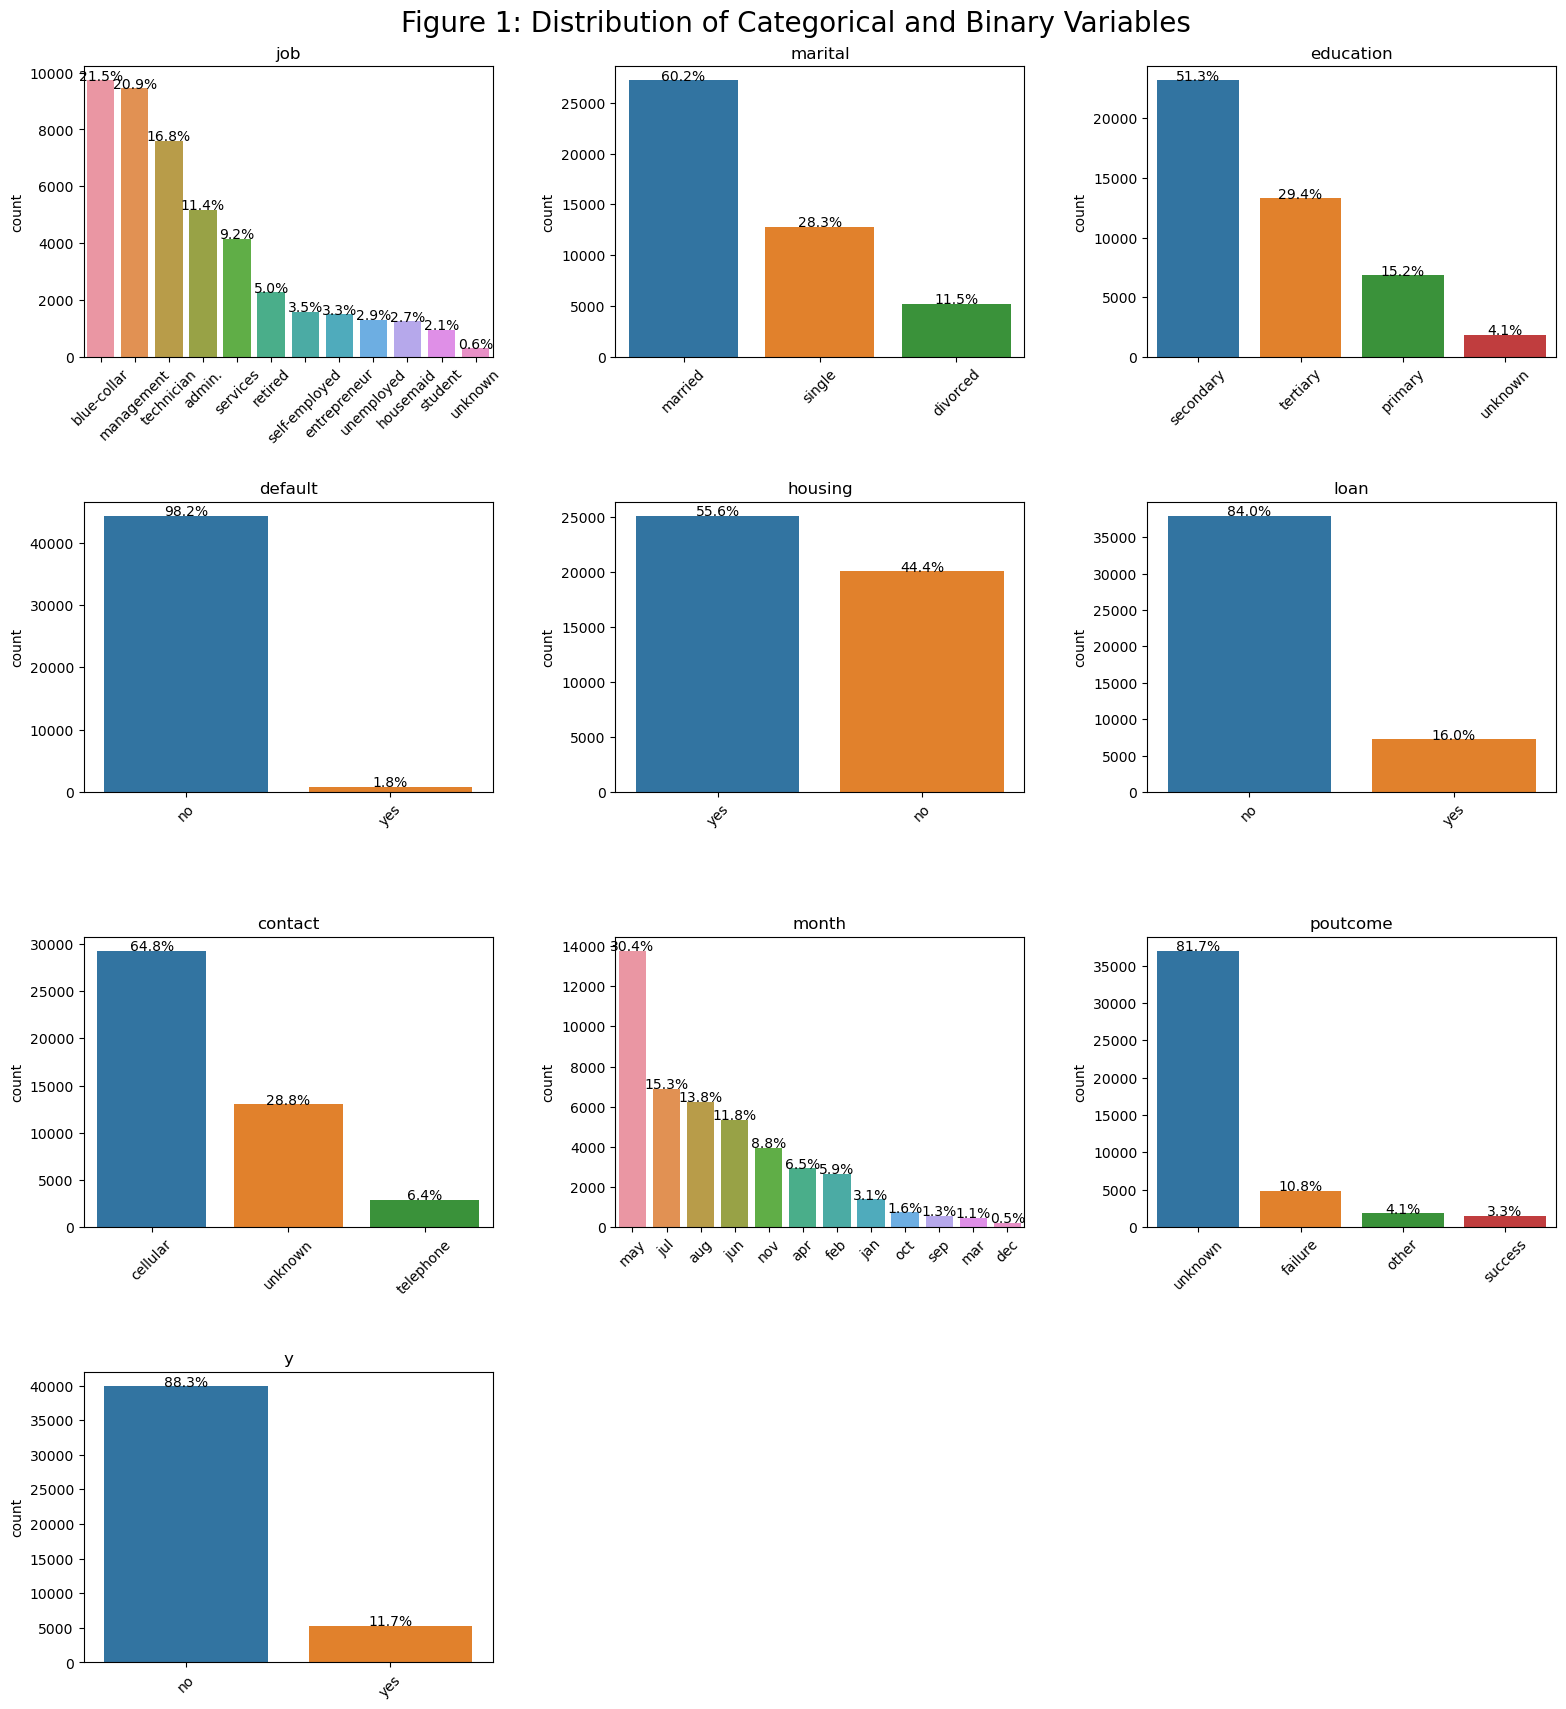

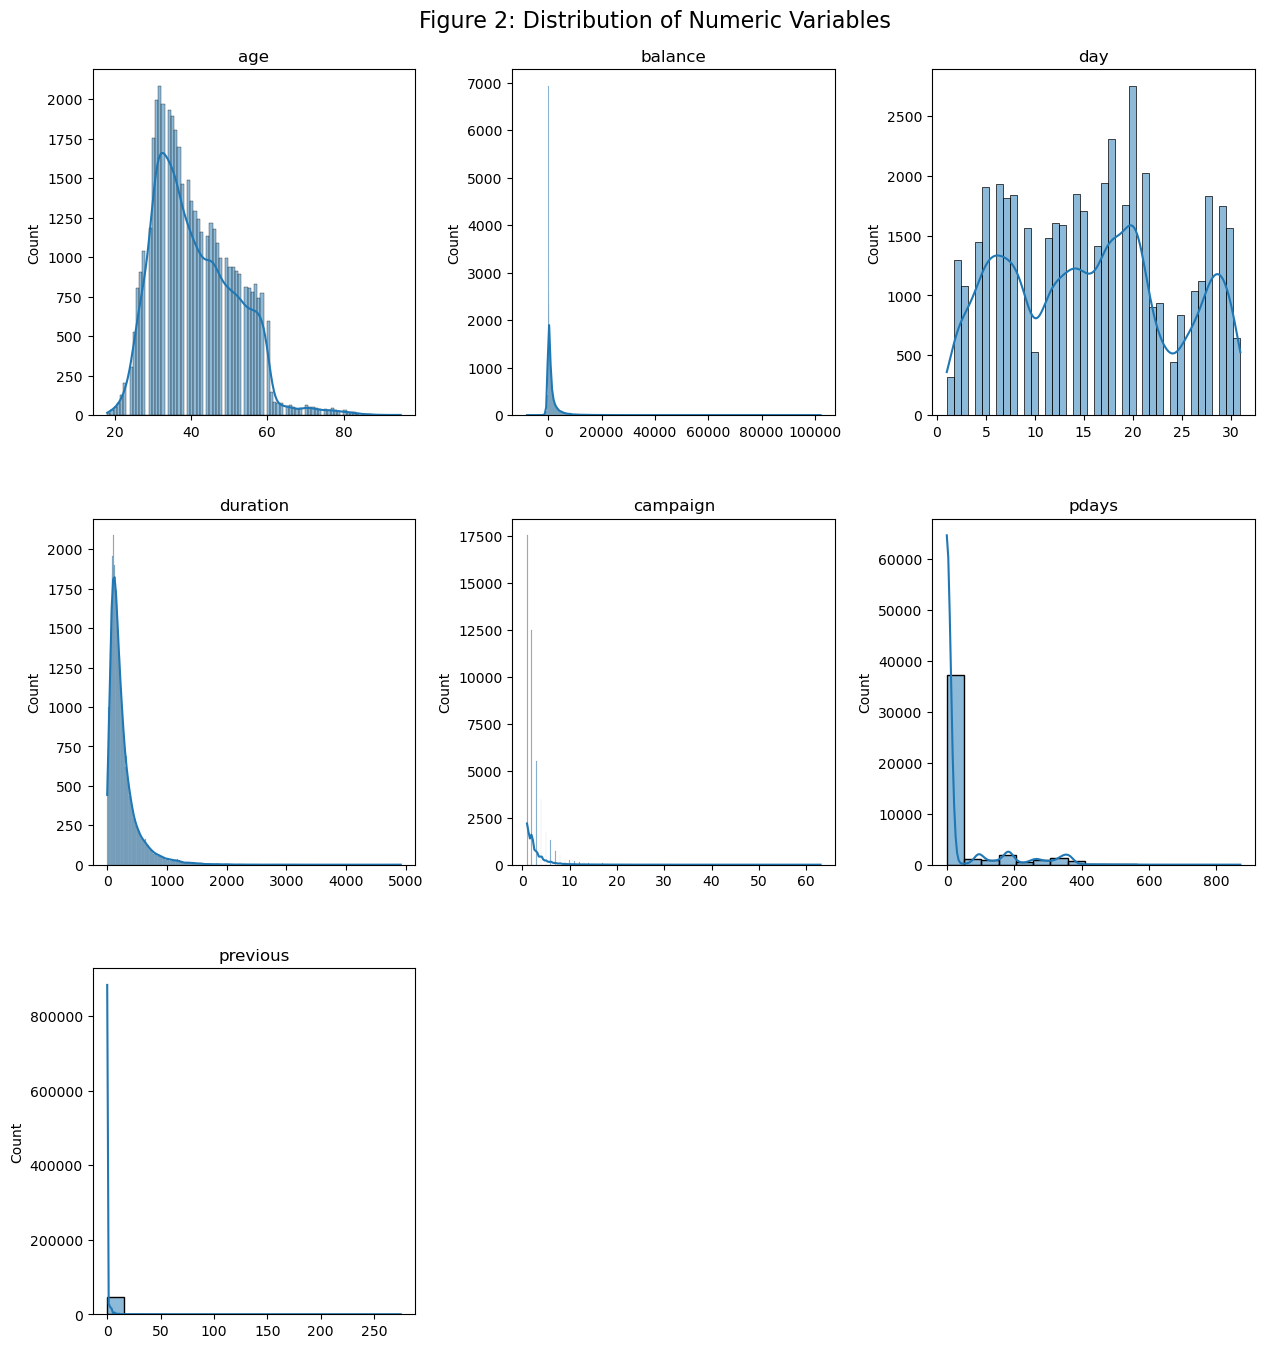

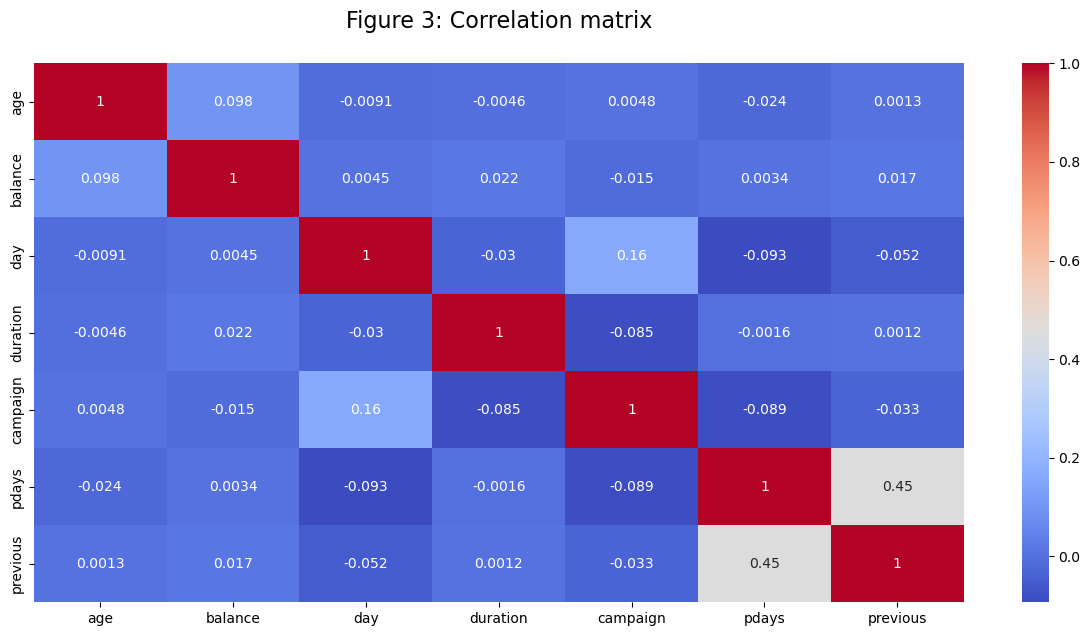

Number of duplicate rows: 0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Column: age
IQR: 15.0
Lower whisker: 10.5
Upper whisker: 70.5
Total number of outliers: 487


Column: balance
IQR: 1356.0
Lower whisker: -1962.0
Upper whisker: 3462.0
Total number of outliers: 4729


Column: day
IQR: 13.0
Lower whisker: -11.5
Upper whisker: 40.5
Total number of outliers: 0


Column: duration
IQR: 216.0
Lower whisker: -221.0
Upper whisker: 643.0
Total number of outliers: 3235


Column: campaign
IQR: 2.0
Lower whisker: -2.0
Upper whisker: 6.0
Total number of outliers: 3064


Column: pdays
IQR: 0.0
Lower whisker: -1.0
Upper whisker: -1.0
Total number of outliers: 8257


Column: previous
IQR: 0.0
Lower whisker: 0.0
Upper whisker: 0.0
Total number of outliers: 8257




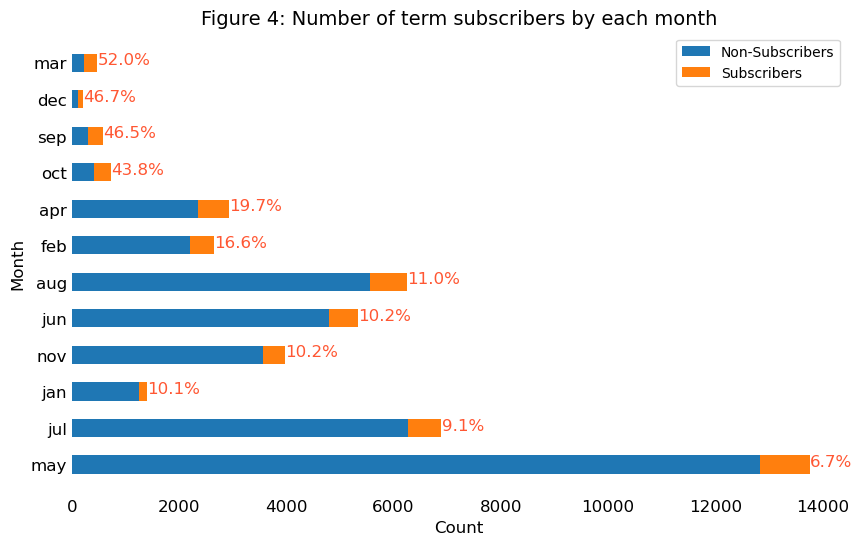

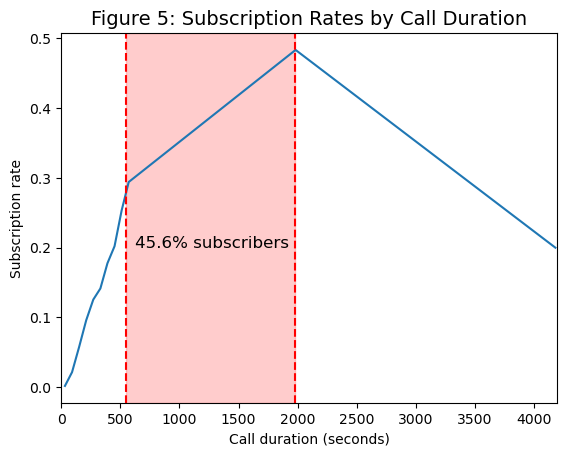

age     balance       day  duration  campaign     pdays  previous
0  2.828869  733.541036  3.551032  8.284871  0.487299 -1.949658      -0.0
1  2.701662   19.404127  3.551032  7.175362  0.487299 -1.949658      -0.0
2  2.562883    1.802083  3.551032  5.898797  0.487299 -1.949658      -0.0
3  2.732573  545.749528  3.551032  6.241565  0.487299 -1.949658      -0.0
4  2.562883    0.939543  3.551032  7.714252  0.487299 -1.949658      -0.0

y  job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0  0                0                 0              0               1   
1  0                0                 0              0               0   
2  0                0                 1              0               0   
3  0                1                 0              0               0   
4  0                0                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   
1            0                  0             0            0               1   
2            0                  0             0            0               0   
3            0                  0             0            0               0   
4            0                  0             0            0               0   

   ...  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0  ...          0          0          0          1          0          0   
1  ...          0          0          0          1          0          0   
2  ...          0          0          0          1          0          0   
3  ...          0          0          0          1          0          0   
4  ...          0          0          0          1          0          0   

   month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0          0               0                 0                 1  
1          0               0                 0                 1  
2          0               0                 0                 1  
3          0               0                 0                 1  
4          0               0                 0                 1  

[5 rows x 36 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  45211 non-null  float64 
 1   balance              45211 non-null  float64 
 2   day                  45211 non-null  float64 
 3   duration             45211 non-null  float64 
 4   campaign             45211 non-null  float64 
 5   pdays                45211 non-null  float64 
 6   previous             45211 non-null  float64 
 7   job_blue-collar      45211 non-null  uint8   
 8   job_entrepreneur     45211 non-null  uint8   
 9   job_housemaid        45211 non-null  uint8   
 10  job_management       45211 non-null  uint8   
 11  job_retired          45211 non-null  uint8   
 12  job_self-employed    45211 non-null  uint8   
 13  job_services         45211 non-null  uint8   
 14  job_student          45211 non-null  uint8   
 15  job_technician     

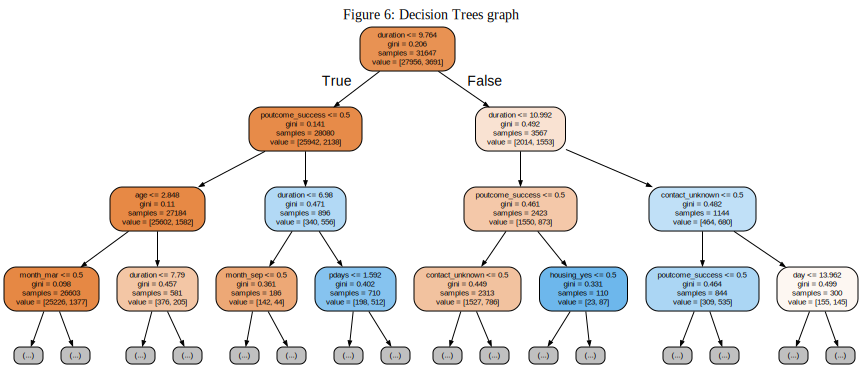

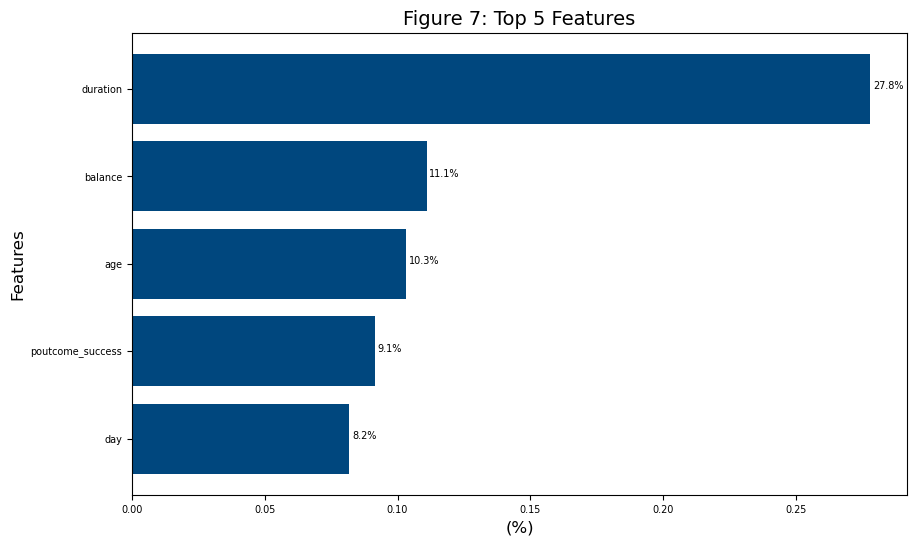

Test Accuracy: 0.8719404305514598


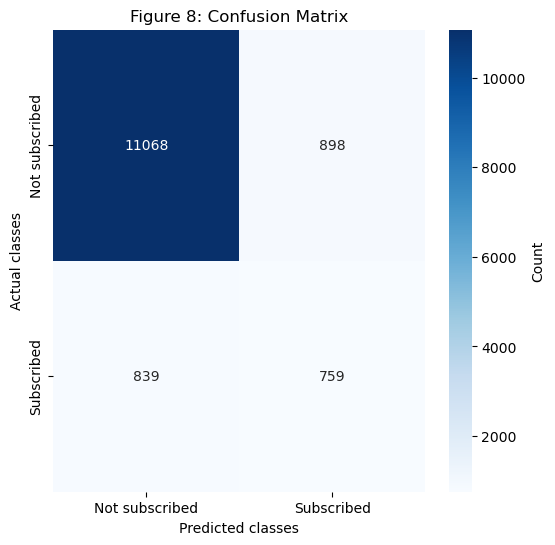

Accuracy: 0.8719404305514598
Precision: 0.45805672902836453
Sensitivity: 0.47496871088861076
Specificity: 0.9249540364365703


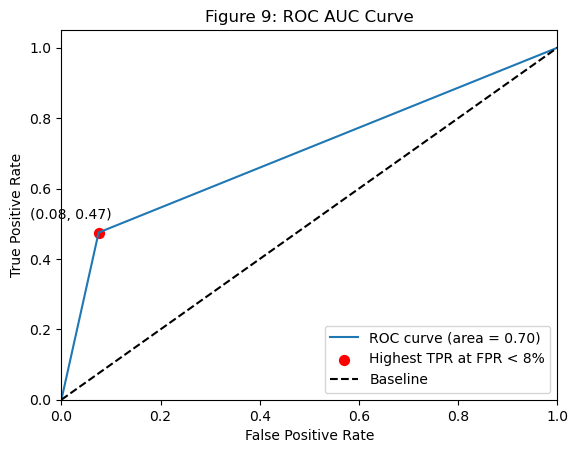

In [29]:
# Load packages in Python
import numpy as np
import pandas as pd
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
from scipy.stats import yeojohnson
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Load dataset
bank_data = pd.read_csv('C:/Users/Alexander_Kalita/Desktop/2_Portuguese_bank/bank-full.csv', sep=",")
bank_data.head()

# View data structure
print(bank_data.info())

# Change object into category type variables
for col in bank_data.select_dtypes(include='object').columns:
    bank_data[col] = bank_data [col].astype('category')
print(bank_data.dtypes)

# Visualize categorical and binary variables
cat_cols = bank_data.select_dtypes(include=['category']).columns.tolist()
def create_countplots(data, cat_cols):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(19, 19))
    plt.subplots_adjust(wspace=0.3, hspace=0.5, top=0.95)
    fig.suptitle("Figure 1: Distribution of Categorical and Binary Variables", fontsize=20)
    for ax, feat in zip(axes.flat, cat_cols):
        sns.countplot(x=data[feat], ax=ax, order=data[feat].value_counts().index)
        ax.set_title(feat)
        ax.set_xlabel("")
        ax.tick_params(axis='x', rotation=45)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height+3,
            '{:.1f}%'.format(height/len(data)*100), ha="center")
    empty_ax = axes.flat[len(cat_cols):]
    for ax in empty_ax:
        ax.remove()
create_countplots(bank_data, cat_cols)

# Visualize numeric variables
num_cols = bank_data.select_dtypes(include=['int64']).columns.tolist()
def create_distplots(data, num_cols):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
    plt.subplots_adjust(wspace=0.3, hspace=0.3, top=0.94)
    fig.suptitle("Figure 2: Distribution of Numeric Variables", fontsize=16)
    for ax, feat in zip(axes.flat, num_cols):
        sns.histplot(data=data, x=feat, kde=True, ax=ax)
        ax.set_title(feat)
        ax.set_xlabel("")
    empty_ax = axes.flat[len(num_cols):]
    for ax in empty_ax:
        ax.remove()     
create_distplots(bank_data, num_cols)

# Create correlation matrix
corr = bank_data.corr()
plt.figure(figsize=(15, 7))
plt.title('Figure 3: Correlation matrix', y=1.05, size=16)
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

# Check duplicated data
duplicates = bank_data[bank_data.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])
bank_data = bank_data.drop_duplicates()

# Check for missing values
print(bank_data.isnull().sum())

# Check for outliers
numeric_cols = bank_data.select_dtypes(include=['int64']).columns.tolist()
for col in numeric_cols:
    Q1 = bank_data[col].quantile(0.25)
    Q3 = bank_data [col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    num_outliers = bank_data [(bank_data [col] < lower) | (bank_data [col] > upper)][col].count()
    print('Column:', col)
    print('IQR:', IQR)
    print('Lower whisker:', lower)
    print('Upper whisker:', upper)
    print('Total number of outliers:', num_outliers)
    print('\n')

# Barplot: Number of term subscribers by each month
subscribers_by_month = bank_data.groupby(['month', 'y']).size().unstack().fillna(0)
subscribers_by_month['Total'] = subscribers_by_month.sum(axis=1)
subscribers_by_month['Percent_Subscribers'] = subscribers_by_month['yes']/subscribers_by_month['Total']*100
subscribers_by_month = subscribers_by_month.sort_values(by='Percent_Subscribers', ascending=True)
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#ff5733']
ax.barh(subscribers_by_month.index, subscribers_by_month['no'], height=0.5, color=colors[0], label='Non-Subscribers')
ax.barh(subscribers_by_month.index, subscribers_by_month['yes'], height=0.5, left=subscribers_by_month['no'], color=colors[1], label='Subscribers')
for i, v in enumerate(subscribers_by_month['Percent_Subscribers']):
    ax.text(subscribers_by_month.iloc[i,1] + subscribers_by_month.iloc[i,0] + 1, i - 0.05, str(round(v,1)) + '%', color=colors[2], fontsize=12)
ax.legend(loc='upper right')
ax.set_title('Figure 4: Number of term subscribers by each month', fontsize=14)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Month', fontsize=12)
ax.tick_params(axis='both', labelsize=12, length=0)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()

# Line plot: Subscription rates by call duration
duration_ranges = [(0, 60), (60, 120), (120, 180), (180, 240), (240, 300), (300, 360), (360, 420), (420, 480), (480, 540), (540, 600), (600, 3366), (3366, 5000)]
call_durations = []
sub_rates = []
for duration_range in duration_ranges:
    subset = bank_data[(bank_data['duration'] >= duration_range[0]) & (bank_data['duration'] <= duration_range[1])]
    sub_rate = subset['y'].value_counts(normalize=True)['yes']
    call_durations.append((duration_range[0]+duration_range[1])/2)
    sub_rates.append(sub_rate)
subset = bank_data[(bank_data['duration'] >= 550) & (bank_data['duration'] <= 1980)]
sub_rate_range = subset['y'].value_counts(normalize=True)['yes']
fig, ax = plt.subplots()
ax.plot(call_durations, sub_rates)
ax.set_xlabel('Call duration (seconds)')
ax.set_ylabel('Subscription rate')
ax.axvline(x=550, linestyle='--', color='red')
ax.axvline(x=1980, linestyle='--', color='red')
ax.axvspan(550, 1980, alpha=0.2, color='red')
ax.text(620, 0.2, '{:.1%} subscribers'.format(sub_rate_range), fontsize=12)
ax.set_xlim(0, 4200)
ax.set_title('Figure 5: Subscription Rates by Call Duration', fontsize=14)
plt.show()

# Separate the features and the target variable
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Transform numeric variables using the Yeo-Johnson transformation
num_cols = bank_data.select_dtypes(include=['int64']).columns
transformed_data = pd.DataFrame()
for col in num_cols:
    transformed_data[col] = yeojohnson(bank_data[col])[0]
bank_data.drop(columns=num_cols, inplace=True)
display(transformed_data.head())

# Transform categorical variables into binary variables
cat_vars = ['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
binary_data = pd.get_dummies(bank_data[cat_vars], columns=cat_vars, drop_first=True)
bank_data.drop(columns=cat_vars, inplace=True)
bank_data['y'] = bank_data['y'].map({'no': 0, 'yes': 1})
X = pd.concat([bank_data, binary_data], axis=1)
y = bank_data['y']
display(X.head())

# Combine the transformed numerical and categorical variables into a single dataset
final_data = pd.concat([transformed_data, binary_data, bank_data['y']], axis=1)
X = final_data.drop(columns=['y'])
y = final_data['y']
final_data.info()

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Training data shape:', X_train.shape, y_train.shape)
print('Testing data shape:', X_test.shape, y_test.shape)

# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Train decision tree model
dt_tuned = DecisionTreeClassifier(random_state=42)
dt_tuned.fit(X_train, y_train)

# Build decision tree model with 5-fold cross-validation
grid_search = GridSearchCV(dt_tuned, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Decision tree graph
dot_data = export_graphviz(dt_tuned, out_file=None, feature_names=X.columns, filled=True, rounded=True, max_depth=3)
dot_data = dot_data.replace('node [', 'node [style="filled", shape="box", fontsize="8", fontname="Arial", width="0", height="0",')
dot_data = dot_data.replace('edge [', 'edge [arrowsize="0.5",')
dot_data = dot_data.replace('digraph Tree {', 'digraph Tree { labelloc="top"; label="Figure 6: Decision Trees graph";')
graph = graphviz.Source(dot_data)
display(graph)

# Plot relative feature importance
importances = dt_tuned.feature_importances_
features = X.columns
total_importance = np.sum(importances)
importances = importances / total_importance
sorted_idx = np.argsort(importances)[-5:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10, 6))
plt.barh(pos, importances[sorted_idx], align='center', color='#00477e')
plt.yticks(pos, features[sorted_idx])
plt.title('Figure 7: Top 5 Features', fontsize=14)
plt.xlabel('(%)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
for i, v in enumerate(importances[sorted_idx]):
    plt.text(v + 0.001, i + 0.5, f'{v*100:.1f}%', fontsize=7)
plt.show()
    
# Predict on test data
y_test_pred = dt_tuned.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Test Accuracy:', test_accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=axs)
axs.set_xlabel('Predicted classes')
axs.set_ylabel('Actual classes')
axs.set_xticklabels(['Not subscribed', 'Subscribed'])
axs.set_yticklabels(['Subscribed', 'Not subscribed'][::-1])
axs.set_title('Figure 8: Confusion Matrix')
cbar = axs.collections[0].colorbar
cbar.ax.set_ylabel('Count')
plt.show()

# Calculate metrics for confusion matrix
accuracy = accuracy_score(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

# Plot ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)
idx = np.argwhere(fpr < 0.1)[-1]
coord = (fpr[idx], tpr[idx])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(coord[0], coord[1], s=50, c='red', label='Highest TPR at FPR < 8%')
plt.annotate('(%0.2f, %0.2f)' % coord, coord, textcoords="offset points", xytext=(-20, 10), ha='center')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 9: ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

## Random Forest

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
age             int64
job          category
marital      category
education    category
defaul

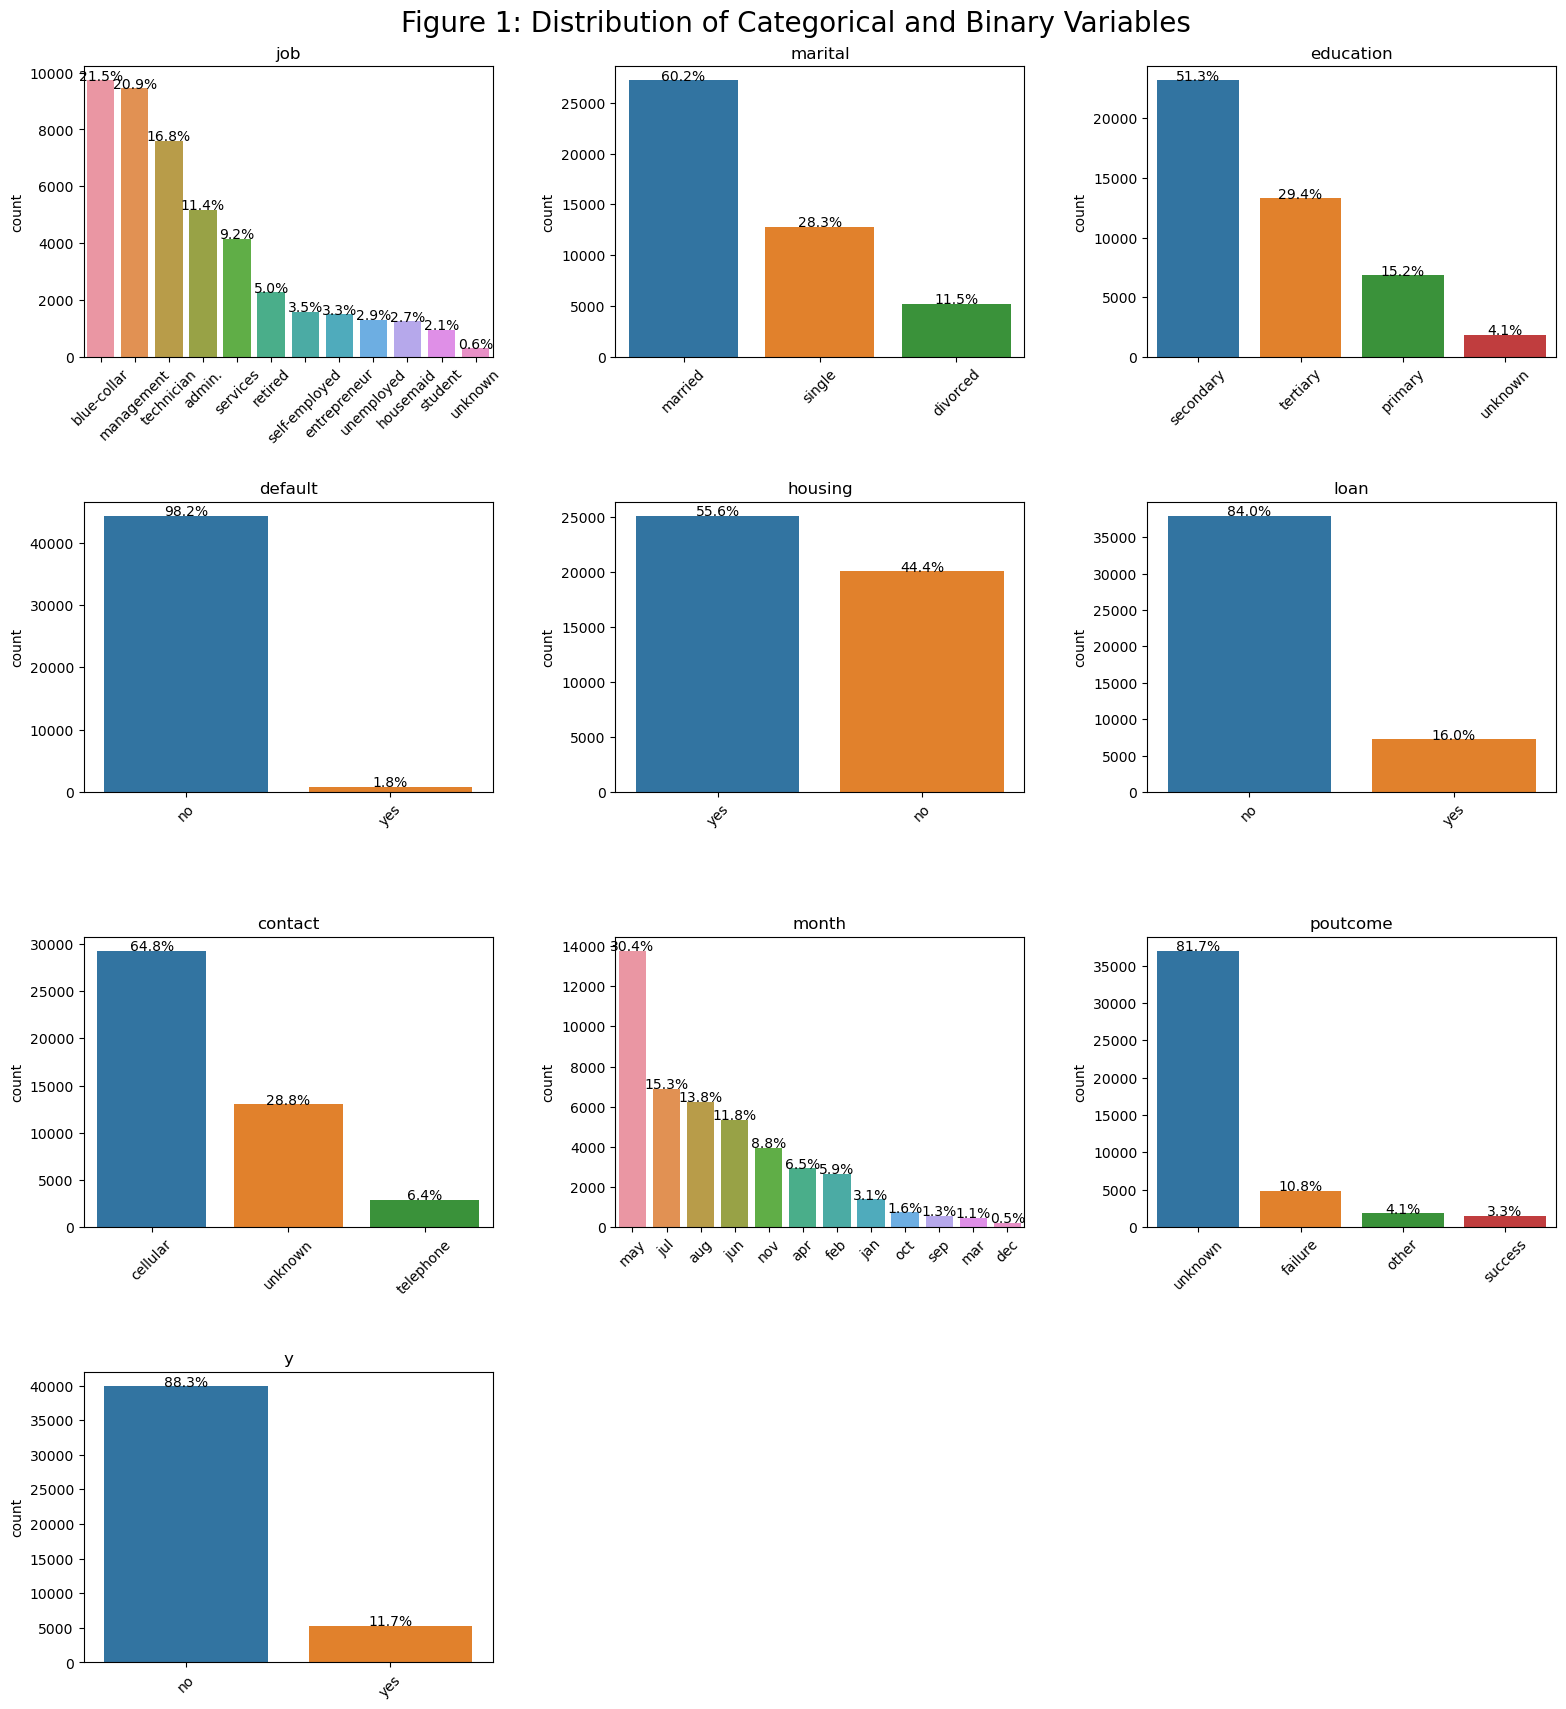

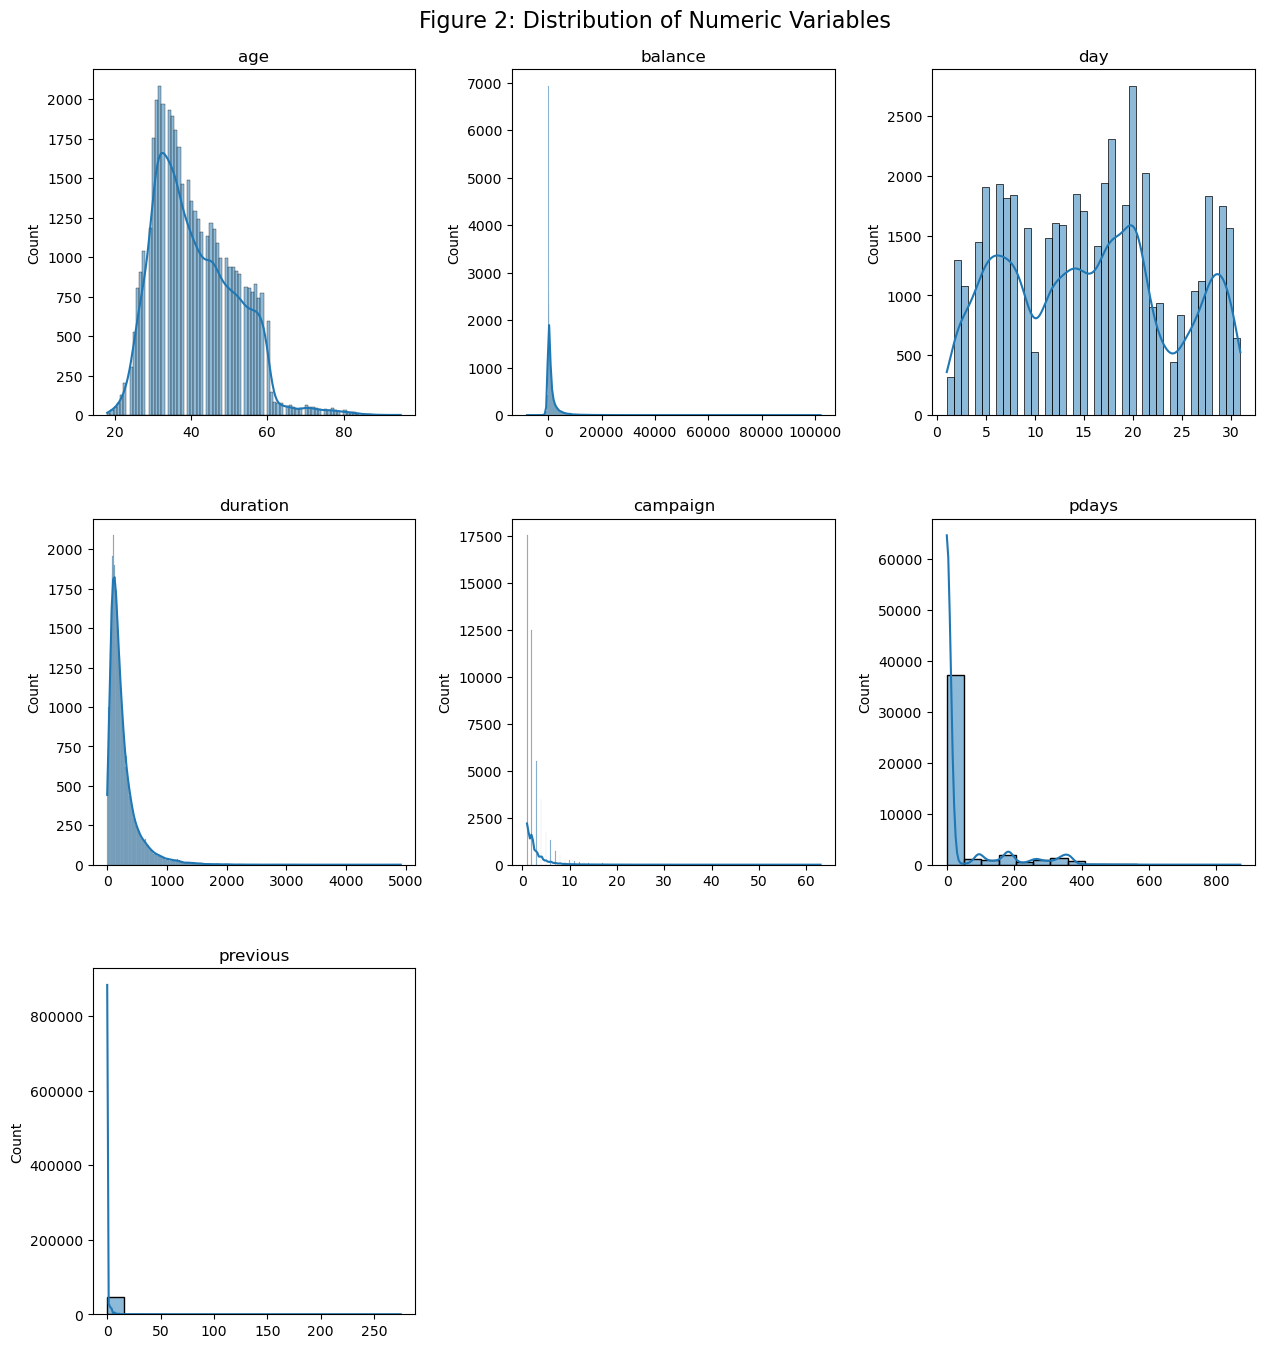

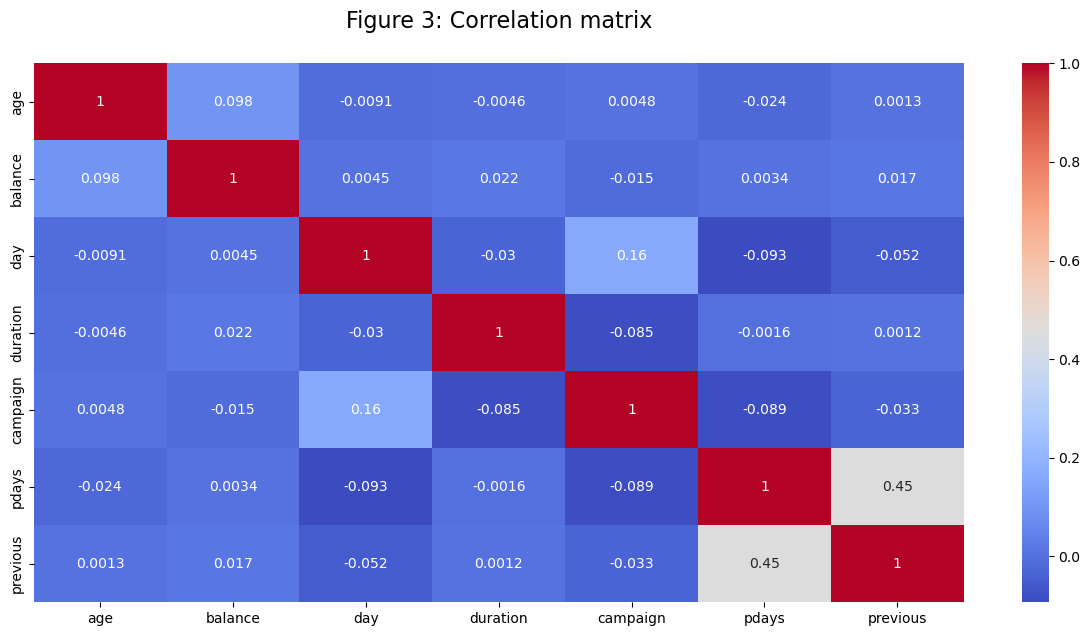

Number of duplicate rows: 0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Column: age
IQR: 15.0
Lower whisker: 10.5
Upper whisker: 70.5
Total number of outliers: 487


Column: balance
IQR: 1356.0
Lower whisker: -1962.0
Upper whisker: 3462.0
Total number of outliers: 4729


Column: day
IQR: 13.0
Lower whisker: -11.5
Upper whisker: 40.5
Total number of outliers: 0


Column: duration
IQR: 216.0
Lower whisker: -221.0
Upper whisker: 643.0
Total number of outliers: 3235


Column: campaign
IQR: 2.0
Lower whisker: -2.0
Upper whisker: 6.0
Total number of outliers: 3064


Column: pdays
IQR: 0.0
Lower whisker: -1.0
Upper whisker: -1.0
Total number of outliers: 8257


Column: previous
IQR: 0.0
Lower whisker: 0.0
Upper whisker: 0.0
Total number of outliers: 8257




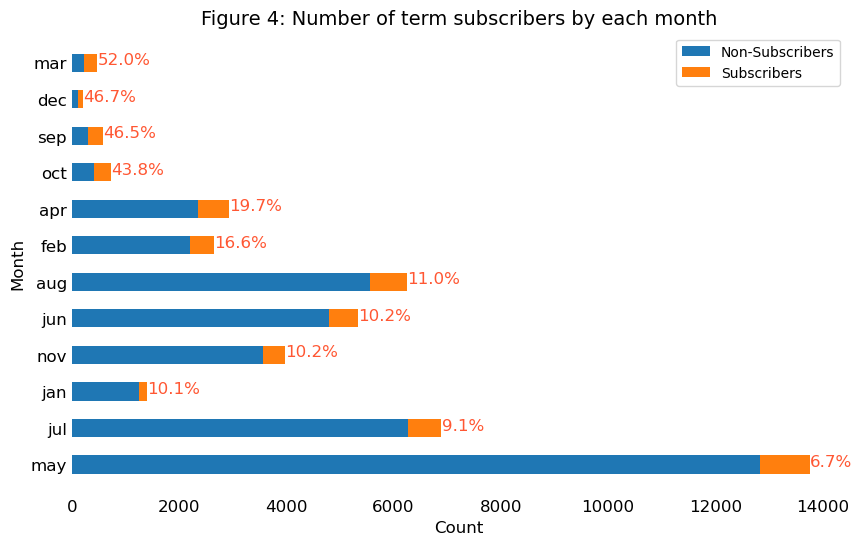

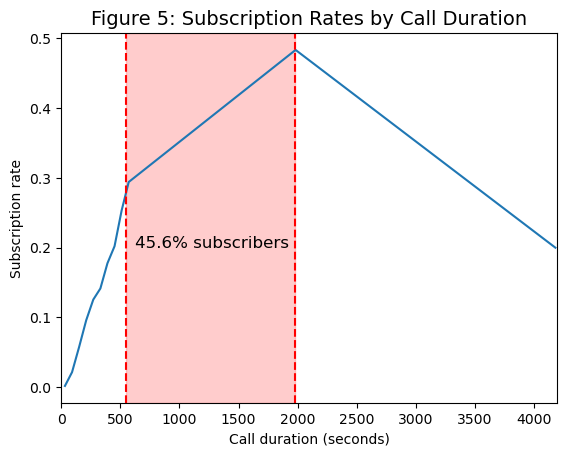

age     balance       day  duration  campaign     pdays  previous
0  2.828869  733.541036  3.551032  8.284871  0.487299 -1.949658      -0.0
1  2.701662   19.404127  3.551032  7.175362  0.487299 -1.949658      -0.0
2  2.562883    1.802083  3.551032  5.898797  0.487299 -1.949658      -0.0
3  2.732573  545.749528  3.551032  6.241565  0.487299 -1.949658      -0.0
4  2.562883    0.939543  3.551032  7.714252  0.487299 -1.949658      -0.0

y  job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0  0                0                 0              0               1   
1  0                0                 0              0               0   
2  0                0                 1              0               0   
3  0                1                 0              0               0   
4  0                0                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   
1            0                  0             0            0               1   
2            0                  0             0            0               0   
3            0                  0             0            0               0   
4            0                  0             0            0               0   

   ...  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0  ...          0          0          0          1          0          0   
1  ...          0          0          0          1          0          0   
2  ...          0          0          0          1          0          0   
3  ...          0          0          0          1          0          0   
4  ...          0          0          0          1          0          0   

   month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0          0               0                 0                 1  
1          0               0                 0                 1  
2          0               0                 0                 1  
3          0               0                 0                 1  
4          0               0                 0                 1  

[5 rows x 36 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  45211 non-null  float64 
 1   balance              45211 non-null  float64 
 2   day                  45211 non-null  float64 
 3   duration             45211 non-null  float64 
 4   campaign             45211 non-null  float64 
 5   pdays                45211 non-null  float64 
 6   previous             45211 non-null  float64 
 7   job_blue-collar      45211 non-null  uint8   
 8   job_entrepreneur     45211 non-null  uint8   
 9   job_housemaid        45211 non-null  uint8   
 10  job_management       45211 non-null  uint8   
 11  job_retired          45211 non-null  uint8   
 12  job_self-employed    45211 non-null  uint8   
 13  job_services         45211 non-null  uint8   
 14  job_student          45211 non-null  uint8   
 15  job_technician     

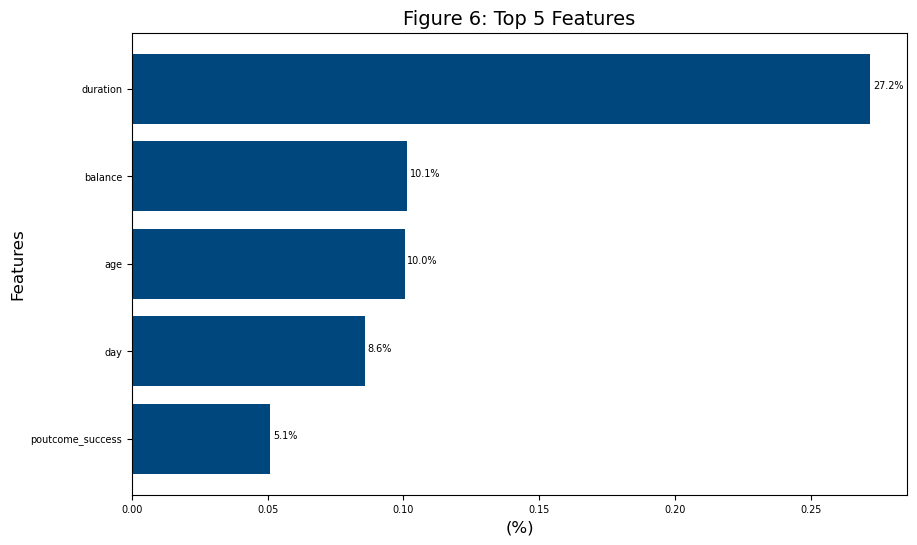

Threshold: 0.3
Test Accuracy: 0.8936891772338543


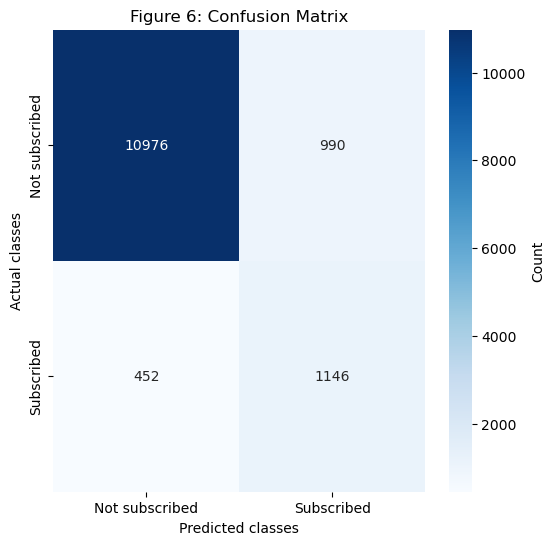

Accuracy: 0.8936891772338543
Precision: 0.5365168539325843
Sensitivity: 0.7171464330413017
Specificity: 0.9172655858265084


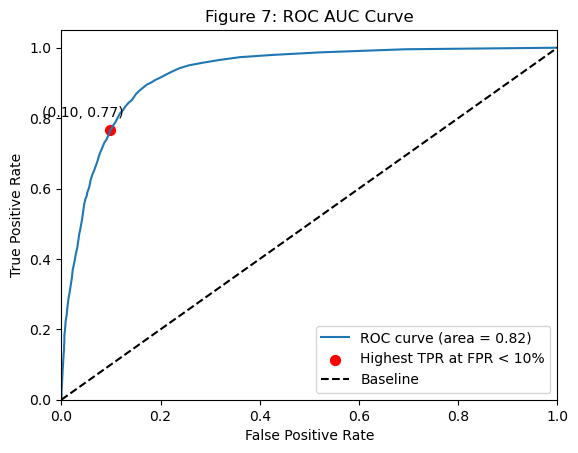

In [30]:
# Load packages in Python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import yeojohnson
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Load dataset
bank_data = pd.read_csv('C:/Users/Alexander_Kalita/Desktop/2_Portuguese_bank/bank-full.csv', sep=",")
bank_data.head()

# View data structure
print(bank_data.info())

# Change object into category type variables
for col in bank_data.select_dtypes(include='object').columns:
    bank_data[col] = bank_data [col].astype('category')
print(bank_data.dtypes)

# Visualize categorical and binary variables
cat_cols = bank_data.select_dtypes(include=['category']).columns.tolist()
def create_countplots(data, cat_cols):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(19, 19))
    plt.subplots_adjust(wspace=0.3, hspace=0.5, top=0.95)
    fig.suptitle("Figure 1: Distribution of Categorical and Binary Variables", fontsize=20)
    for ax, feat in zip(axes.flat, cat_cols):
        sns.countplot(x=data[feat], ax=ax, order=data[feat].value_counts().index)
        ax.set_title(feat)
        ax.set_xlabel("")
        ax.tick_params(axis='x', rotation=45)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height+3,
            '{:.1f}%'.format(height/len(data)*100), ha="center")
    empty_ax = axes.flat[len(cat_cols):]
    for ax in empty_ax:
        ax.remove()
create_countplots(bank_data, cat_cols)

# Visualize numeric variables
num_cols = bank_data.select_dtypes(include=['int64']).columns.tolist()
def create_distplots(data, num_cols):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
    plt.subplots_adjust(wspace=0.3, hspace=0.3, top=0.94)
    fig.suptitle("Figure 2: Distribution of Numeric Variables", fontsize=16)
    for ax, feat in zip(axes.flat, num_cols):
        sns.histplot(data=data, x=feat, kde=True, ax=ax)
        ax.set_title(feat)
        ax.set_xlabel("")
    empty_ax = axes.flat[len(num_cols):]
    for ax in empty_ax:
        ax.remove()     
create_distplots(bank_data, num_cols)

# Create correlation matrix
corr = bank_data.corr()
plt.figure(figsize=(15, 7))
plt.title('Figure 3: Correlation matrix', y=1.05, size=16)
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

# Check duplicated data
duplicates = bank_data[bank_data.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])
bank_data = bank_data.drop_duplicates()

# Check for missing values
print(bank_data.isnull().sum())

# Check for outliers
numeric_cols = bank_data.select_dtypes(include=['int64']).columns.tolist()
for col in numeric_cols:
    Q1 = bank_data[col].quantile(0.25)
    Q3 = bank_data [col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    num_outliers = bank_data [(bank_data [col] < lower) | (bank_data [col] > upper)][col].count()
    print('Column:', col)
    print('IQR:', IQR)
    print('Lower whisker:', lower)
    print('Upper whisker:', upper)
    print('Total number of outliers:', num_outliers)
    print('\n')

# Barplot: Number of term subscribers by each month
subscribers_by_month = bank_data.groupby(['month', 'y']).size().unstack().fillna(0)
subscribers_by_month['Total'] = subscribers_by_month.sum(axis=1)
subscribers_by_month['Percent_Subscribers'] = subscribers_by_month['yes']/subscribers_by_month['Total']*100
subscribers_by_month = subscribers_by_month.sort_values(by='Percent_Subscribers', ascending=True)
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#ff5733']
ax.barh(subscribers_by_month.index, subscribers_by_month['no'], height=0.5, color=colors[0], label='Non-Subscribers')
ax.barh(subscribers_by_month.index, subscribers_by_month['yes'], height=0.5, left=subscribers_by_month['no'], color=colors[1], label='Subscribers')
for i, v in enumerate(subscribers_by_month['Percent_Subscribers']):
    ax.text(subscribers_by_month.iloc[i,1] + subscribers_by_month.iloc[i,0] + 1, i - 0.05, str(round(v,1)) + '%', color=colors[2], fontsize=12)
ax.legend(loc='upper right')
ax.set_title('Figure 4: Number of term subscribers by each month', fontsize=14)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Month', fontsize=12)
ax.tick_params(axis='both', labelsize=12, length=0)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()

# Line plot: Subscription rates by call duration
duration_ranges = [(0, 60), (60, 120), (120, 180), (180, 240), (240, 300), (300, 360), (360, 420), (420, 480), (480, 540), (540, 600), (600, 3366), (3366, 5000)]
call_durations = []
sub_rates = []
for duration_range in duration_ranges:
    subset = bank_data[(bank_data['duration'] >= duration_range[0]) & (bank_data['duration'] <= duration_range[1])]
    sub_rate = subset['y'].value_counts(normalize=True)['yes']
    call_durations.append((duration_range[0]+duration_range[1])/2)
    sub_rates.append(sub_rate)
subset = bank_data[(bank_data['duration'] >= 550) & (bank_data['duration'] <= 1980)]
sub_rate_range = subset['y'].value_counts(normalize=True)['yes']
fig, ax = plt.subplots()
ax.plot(call_durations, sub_rates)
ax.set_xlabel('Call duration (seconds)')
ax.set_ylabel('Subscription rate')
ax.axvline(x=550, linestyle='--', color='red')
ax.axvline(x=1980, linestyle='--', color='red')
ax.axvspan(550, 1980, alpha=0.2, color='red')
ax.text(620, 0.2, '{:.1%} subscribers'.format(sub_rate_range), fontsize=12)
ax.set_xlim(0, 4200)
ax.set_title('Figure 5: Subscription Rates by Call Duration', fontsize=14)
plt.show()

# Separate the features and the target variable
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Transform numeric variables using the Yeo-Johnson transformation
num_cols = bank_data.select_dtypes(include=['int64']).columns
transformed_data = pd.DataFrame()
for col in num_cols:
    transformed_data[col] = yeojohnson(bank_data[col])[0]
bank_data.drop(columns=num_cols, inplace=True)
display(transformed_data.head())

# Transform categorical variables into binary variables
cat_vars = ['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
binary_data = pd.get_dummies(bank_data[cat_vars], columns=cat_vars, drop_first=True)
bank_data.drop(columns=cat_vars, inplace=True)
bank_data['y'] = bank_data['y'].map({'no': 0, 'yes': 1})
X = pd.concat([bank_data, binary_data], axis=1)
y = bank_data['y']
display(X.head())

# Combine the transformed numerical and categorical variables into a single dataset
final_data = pd.concat([transformed_data, binary_data, bank_data['y']], axis=1)
X = final_data.drop(columns=['y'])
y = final_data['y']
final_data.info()

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Training data shape:', X_train.shape, y_train.shape)
print('Testing data shape:', X_test.shape, y_test.shape)

# Create a Random Forest classifier with 5-fold cross-validation
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X, y, cv=kf)
print("Cross-validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Plot relative feature importance
importances = rf.feature_importances_
features = X.columns
total_importance = np.sum(importances)
importances = importances / total_importance
sorted_idx = np.argsort(importances)[-5:]
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(sorted_idx)), importances[sorted_idx], color='#00477e')
plt.yticks(np.arange(len(sorted_idx)), features[sorted_idx])
plt.title('Figure 6: Top 5 Features', fontsize=14)
plt.xlabel('(%)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
for i, v in enumerate(importances[sorted_idx]):
    plt.text(v + 0.001, i, f'{v*100:.1f}%', fontsize=7)
plt.show()

# Predict on test data
threshold = 0.3
y_test_pred_prob = rf.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_pred_prob >= threshold, 1, 0)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Threshold:', threshold)
print('Test Accuracy:', test_accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=axs)
axs.set_xlabel('Predicted classes')
axs.set_ylabel('Actual classes')
axs.set_xticklabels(['Not subscribed', 'Subscribed'])
axs.set_yticklabels(['Subscribed', 'Not subscribed'][::-1])
axs.set_title('Figure 6: Confusion Matrix')
cbar = axs.collections[0].colorbar
cbar.ax.set_ylabel('Count')
plt.show()

# Calculate metrics for confusion matrix
accuracy = accuracy_score(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

# Plot ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred)
idx = np.argwhere(fpr < 0.1)[-1]
coord = (fpr[idx], tpr[idx])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(coord[0], coord[1], s=50, c='red', label='Highest TPR at FPR < 10%')
plt.annotate('(%0.2f, %0.2f)' % coord, coord, textcoords="offset points", xytext=(-20, 10), ha='center')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 7: ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

## XGBoost

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
age             int64
job          category
marital      category
education    category
defaul

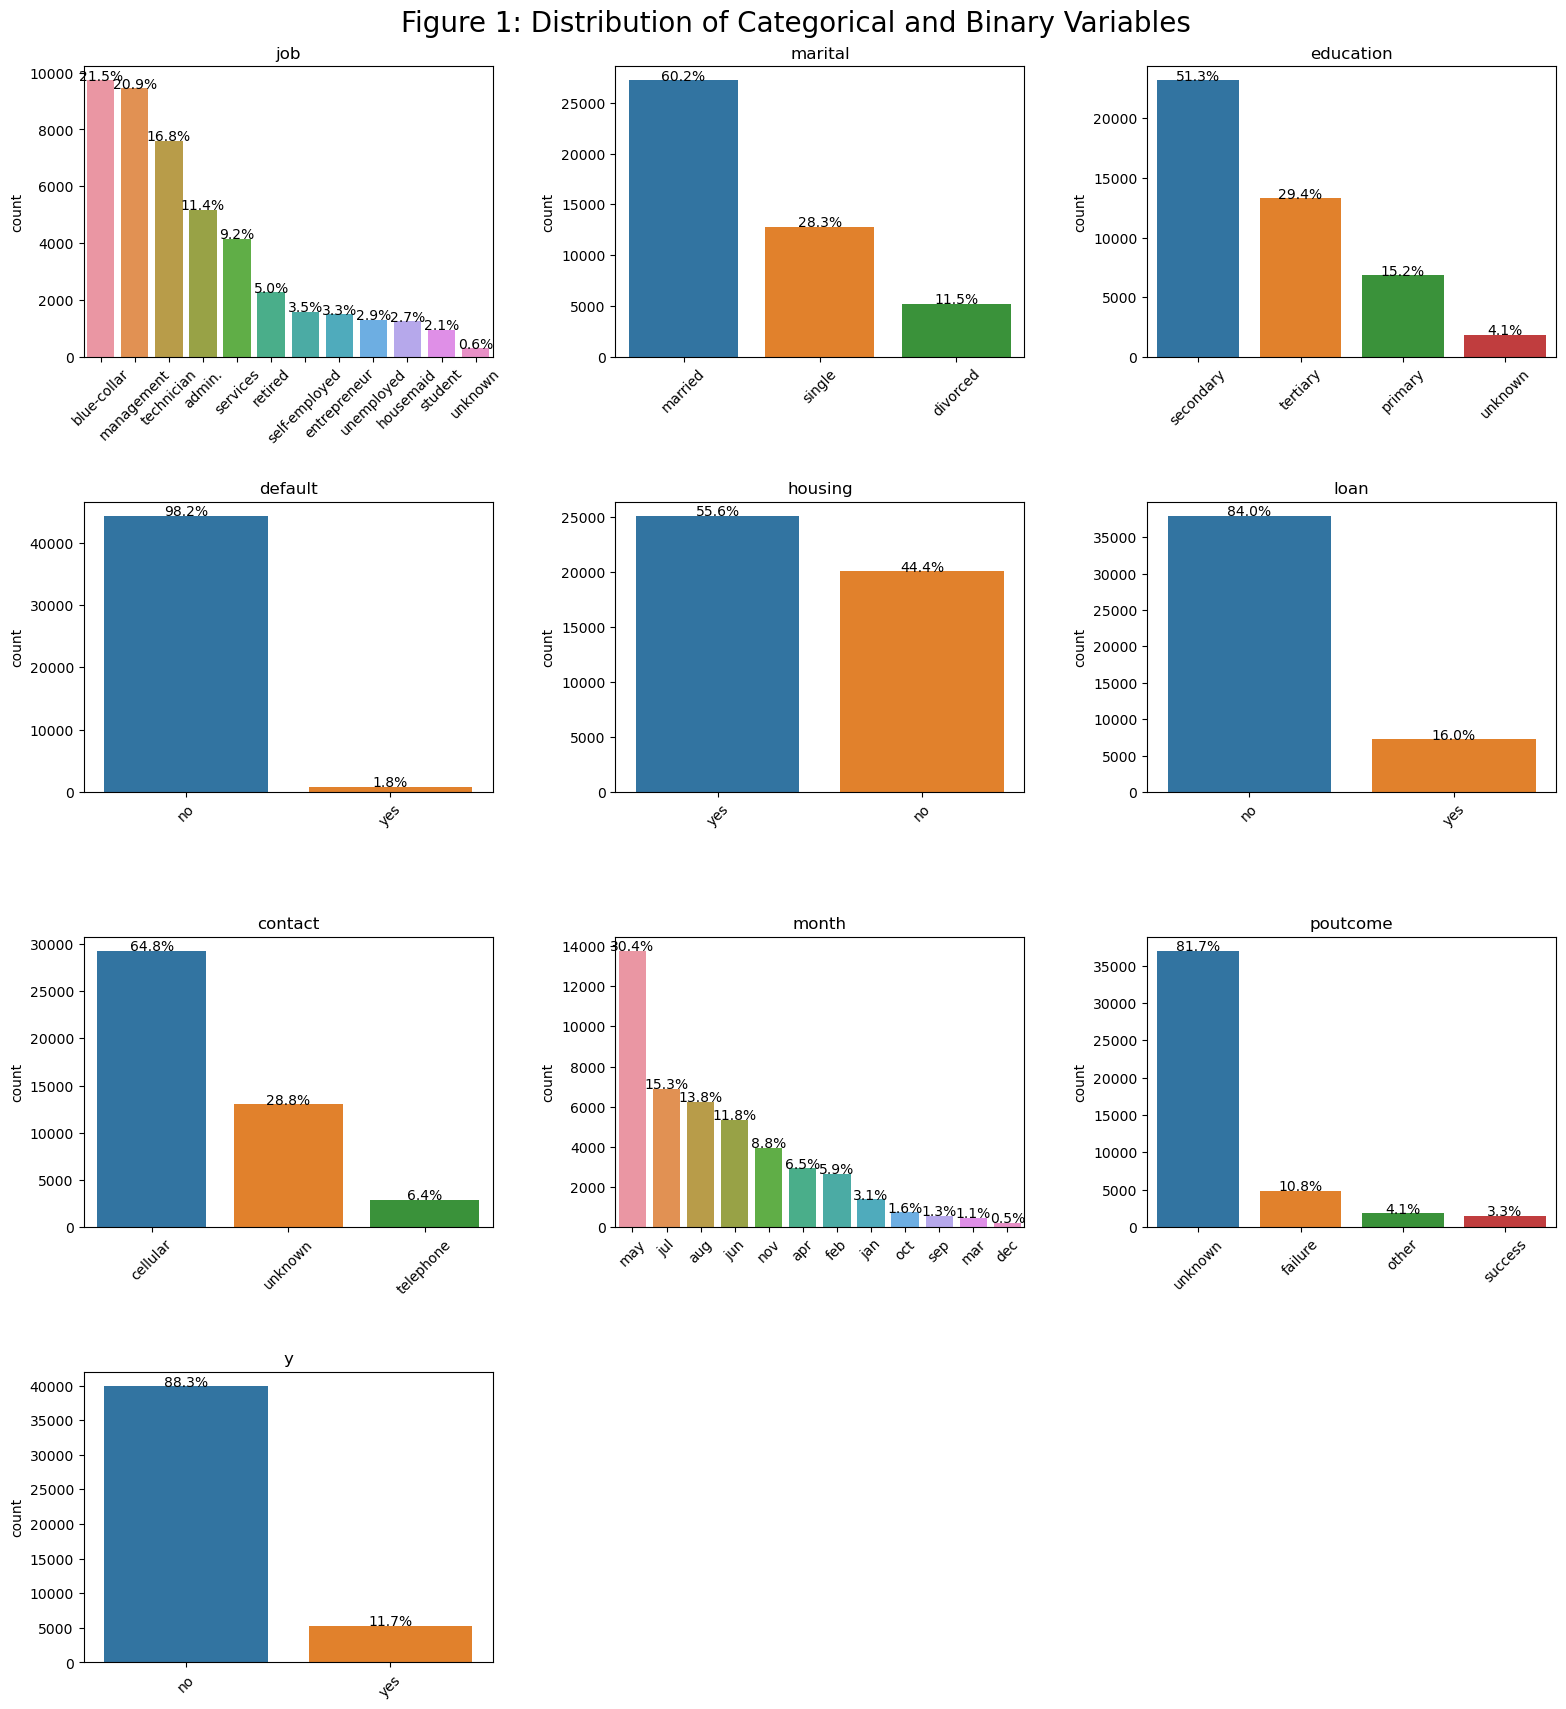

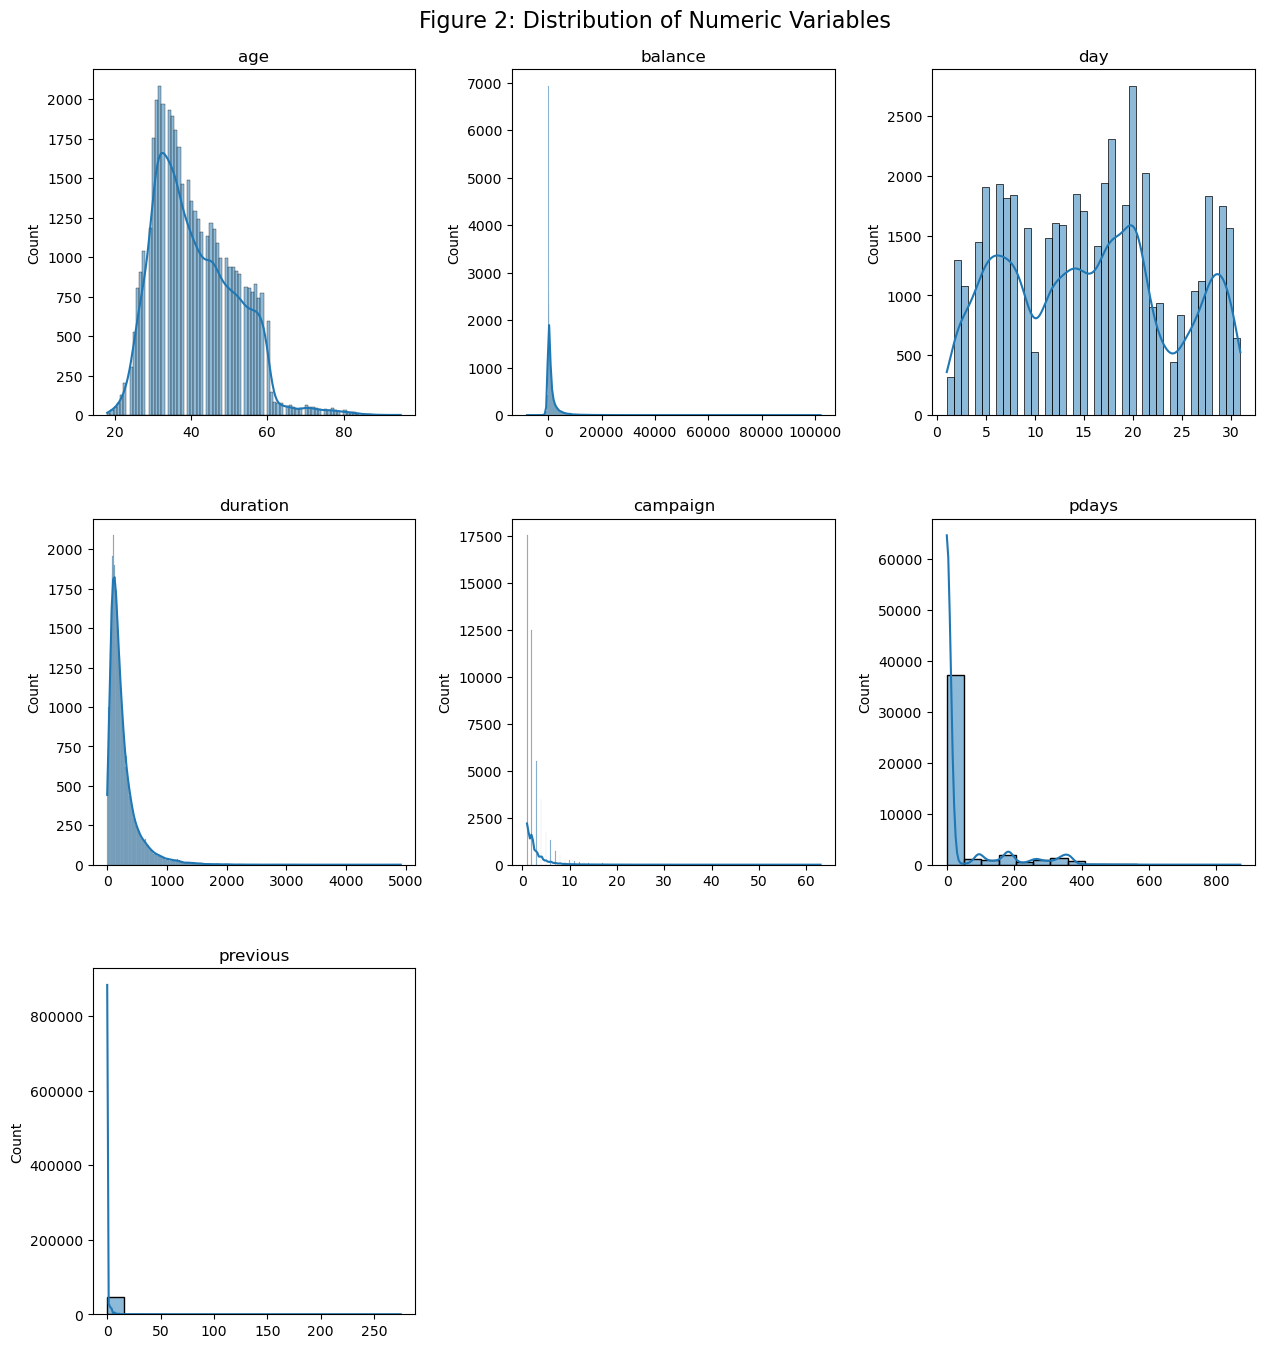

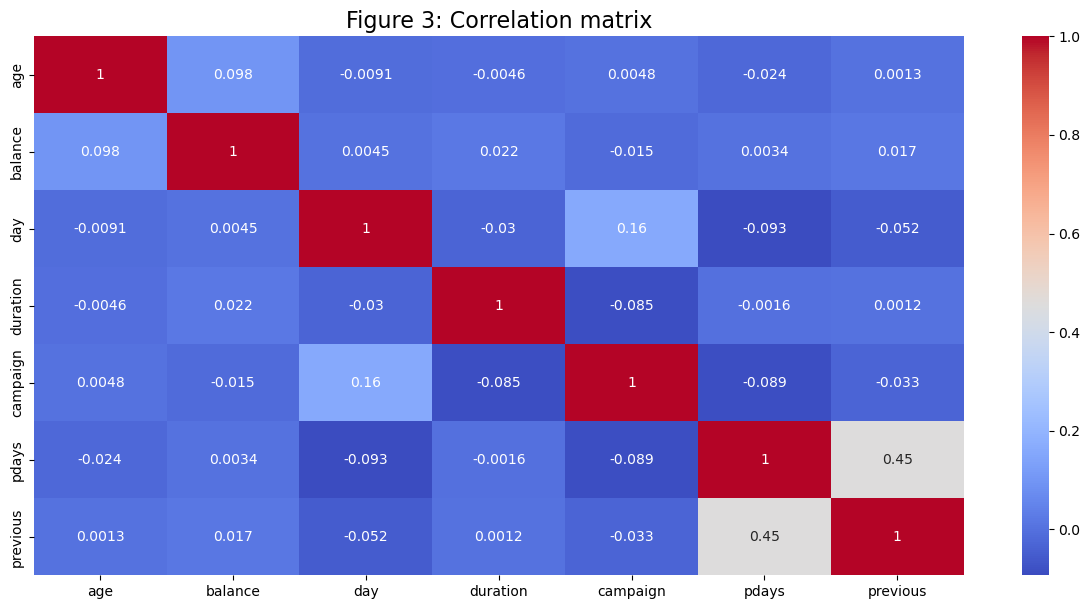

Number of duplicate rows: 0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Column: age
IQR: 15.0
Lower whisker: 10.5
Upper whisker: 70.5
Total number of outliers: 487


Column: balance
IQR: 1356.0
Lower whisker: -1962.0
Upper whisker: 3462.0
Total number of outliers: 4729


Column: day
IQR: 13.0
Lower whisker: -11.5
Upper whisker: 40.5
Total number of outliers: 0


Column: duration
IQR: 216.0
Lower whisker: -221.0
Upper whisker: 643.0
Total number of outliers: 3235


Column: campaign
IQR: 2.0
Lower whisker: -2.0
Upper whisker: 6.0
Total number of outliers: 3064


Column: pdays
IQR: 0.0
Lower whisker: -1.0
Upper whisker: -1.0
Total number of outliers: 8257


Column: previous
IQR: 0.0
Lower whisker: 0.0
Upper whisker: 0.0
Total number of outliers: 8257




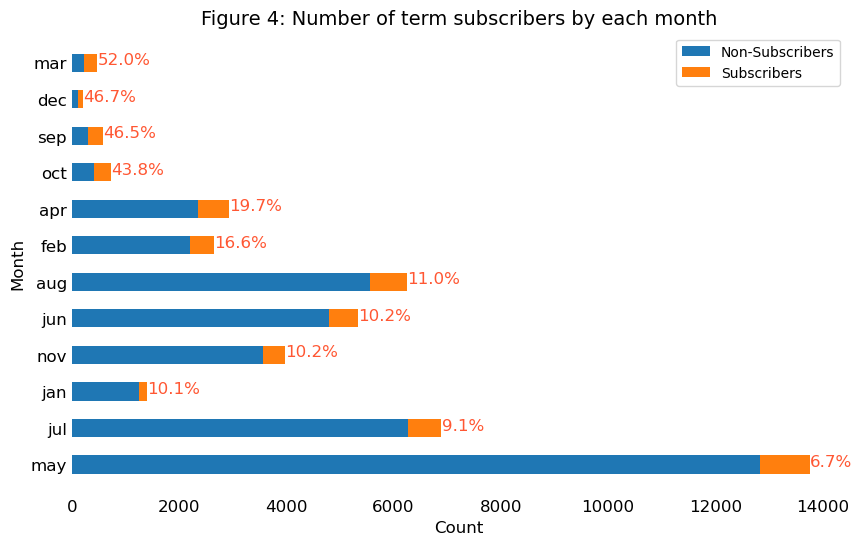

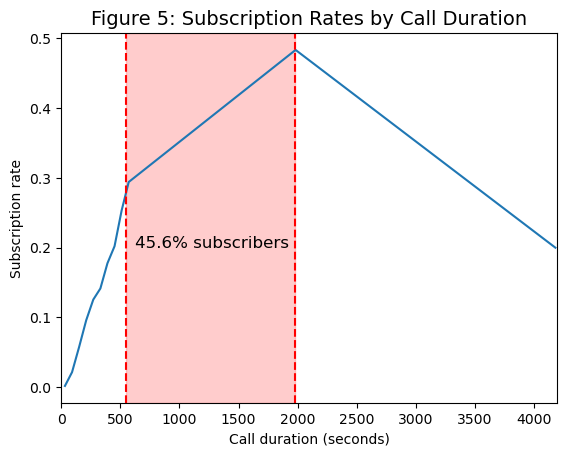

age     balance       day  duration  campaign     pdays  previous
0  2.828869  733.541036  3.551032  8.284871  0.487299 -1.949658      -0.0
1  2.701662   19.404127  3.551032  7.175362  0.487299 -1.949658      -0.0
2  2.562883    1.802083  3.551032  5.898797  0.487299 -1.949658      -0.0
3  2.732573  545.749528  3.551032  6.241565  0.487299 -1.949658      -0.0
4  2.562883    0.939543  3.551032  7.714252  0.487299 -1.949658      -0.0

y  job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0  0                0                 0              0               1   
1  0                0                 0              0               0   
2  0                0                 1              0               0   
3  0                1                 0              0               0   
4  0                0                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   
1            0                  0             0            0               1   
2            0                  0             0            0               0   
3            0                  0             0            0               0   
4            0                  0             0            0               0   

   ...  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0  ...          0          0          0          1          0          0   
1  ...          0          0          0          1          0          0   
2  ...          0          0          0          1          0          0   
3  ...          0          0          0          1          0          0   
4  ...          0          0          0          1          0          0   

   month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0          0               0                 0                 1  
1          0               0                 0                 1  
2          0               0                 0                 1  
3          0               0                 0                 1  
4          0               0                 0                 1  

[5 rows x 36 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  45211 non-null  float64 
 1   balance              45211 non-null  float64 
 2   day                  45211 non-null  float64 
 3   duration             45211 non-null  float64 
 4   campaign             45211 non-null  float64 
 5   pdays                45211 non-null  float64 
 6   previous             45211 non-null  float64 
 7   job_blue-collar      45211 non-null  uint8   
 8   job_entrepreneur     45211 non-null  uint8   
 9   job_housemaid        45211 non-null  uint8   
 10  job_management       45211 non-null  uint8   
 11  job_retired          45211 non-null  uint8   
 12  job_self-employed    45211 non-null  uint8   
 13  job_services         45211 non-null  uint8   
 14  job_student          45211 non-null  uint8   
 15  job_technician     

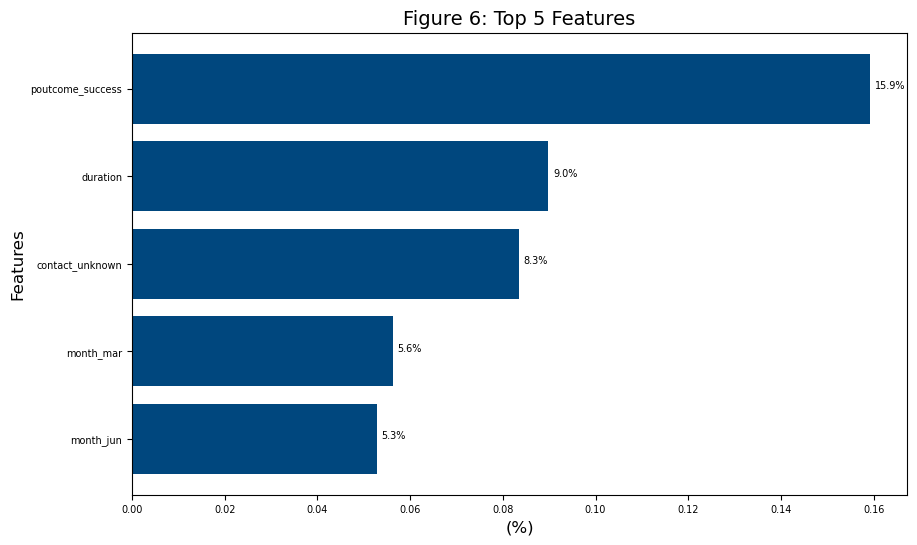

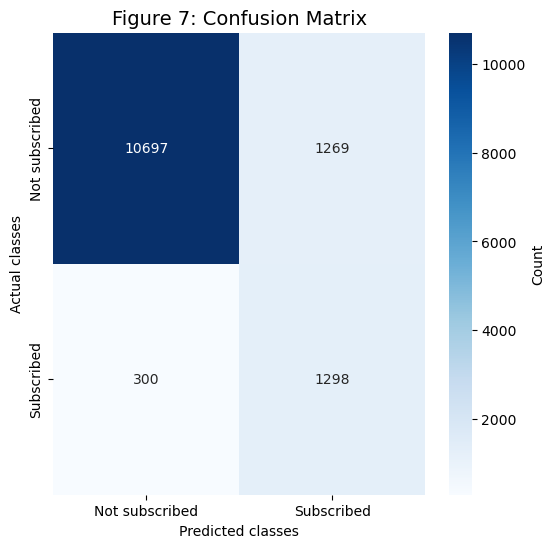

Accuracy: 0.8843261574756709
Precision: 0.5056486170627191
Sensitivity: 0.8122653316645807
Specificity: 0.8939495236503426


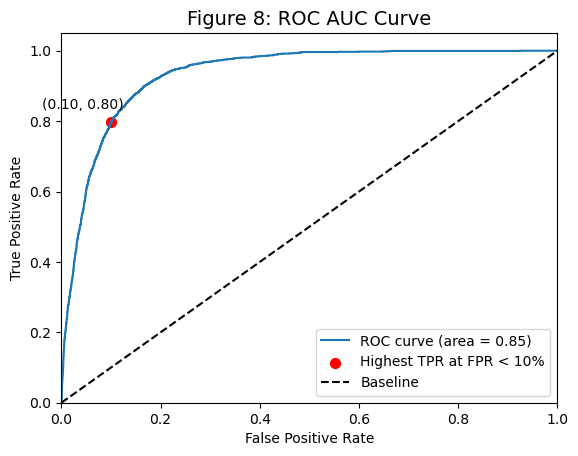

id  psubscribed
0   1            0
1   2            0
2   3            0
3   4            1
4   5            0

In [31]:
# Load packages in Python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from scipy.stats import yeojohnson
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Load dataset
bank_data = pd.read_csv('C:/Users/Alexander_Kalita/Desktop/2_Portuguese_bank/bank-full.csv', sep=",")
bank_data.head()

# View data structure
print(bank_data.info())

# Change object into category type variables
for col in bank_data.select_dtypes(include='object').columns:
    bank_data[col] = bank_data [col].astype('category')
print(bank_data.dtypes)

# Visualize categorical and binary variables
cat_cols = bank_data.select_dtypes(include=['category']).columns.tolist()
def create_countplots(data, cat_cols):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(19, 19))
    plt.subplots_adjust(wspace=0.3, hspace=0.5, top=0.95)
    fig.suptitle("Figure 1: Distribution of Categorical and Binary Variables", fontsize=20)
    for ax, feat in zip(axes.flat, cat_cols):
        sns.countplot(x=data[feat], ax=ax, order=data[feat].value_counts().index)
        ax.set_title(feat)
        ax.set_xlabel("")
        ax.tick_params(axis='x', rotation=45)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height+3,
            '{:.1f}%'.format(height/len(data)*100), ha="center")
    empty_ax = axes.flat[len(cat_cols):]
    for ax in empty_ax:
        ax.remove()
create_countplots(bank_data, cat_cols)

# Visualize numeric variables
num_cols = bank_data.select_dtypes(include=['int64']).columns.tolist()
def create_distplots(data, num_cols):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
    plt.subplots_adjust(wspace=0.3, hspace=0.3, top=0.94)
    fig.suptitle("Figure 2: Distribution of Numeric Variables", fontsize=16)
    for ax, feat in zip(axes.flat, num_cols):
        sns.histplot(data=data, x=feat, kde=True, ax=ax)
        ax.set_title(feat)
        ax.set_xlabel("")
    empty_ax = axes.flat[len(num_cols):]
    for ax in empty_ax:
        ax.remove()     
create_distplots(bank_data, num_cols)

# Create correlation matrix
corr = bank_data.corr()
plt.figure(figsize=(15, 7))
plt.title('Figure 3: Correlation matrix', y=1, size=16)
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

# Check duplicated data
duplicates = bank_data[bank_data.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])
bank_data = bank_data.drop_duplicates()

# Check for missing values
print(bank_data.isnull().sum())

# Check for outliers in numeric variables
numeric_vars = bank_data.select_dtypes(include=['int64']).columns.tolist()
for col in numeric_vars:
    Q1 = bank_data[col].quantile(0.25)
    Q3 = bank_data [col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    num_outliers = bank_data [(bank_data [col] < lower) | (bank_data [col] > upper)][col].count()
    print('Column:', col)
    print('IQR:', IQR)
    print('Lower whisker:', lower)
    print('Upper whisker:', upper)
    print('Total number of outliers:', num_outliers)
    print('\n')

# Barplot: Number of term subscribers by each month
subscribers_by_month = bank_data.groupby(['month', 'y']).size().unstack().fillna(0)
subscribers_by_month['Total'] = subscribers_by_month.sum(axis=1)
subscribers_by_month['Percent_Subscribers'] = subscribers_by_month['yes']/subscribers_by_month['Total']*100
subscribers_by_month = subscribers_by_month.sort_values(by='Percent_Subscribers', ascending=True)
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#ff5733']
ax.barh(subscribers_by_month.index, subscribers_by_month['no'], height=0.5, color=colors[0], label='Non-Subscribers')
ax.barh(subscribers_by_month.index, subscribers_by_month['yes'], height=0.5, left=subscribers_by_month['no'], color=colors[1], label='Subscribers')
for i, v in enumerate(subscribers_by_month['Percent_Subscribers']):
    ax.text(subscribers_by_month.iloc[i,1] + subscribers_by_month.iloc[i,0] + 1, i - 0.05, str(round(v,1)) + '%', color=colors[2], fontsize=12)
ax.legend(loc='upper right')
ax.set_title('Figure 4: Number of term subscribers by each month', fontsize=14)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Month', fontsize=12)
ax.tick_params(axis='both', labelsize=12, length=0)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()

# Line plot: Subscription rates by call duration
duration_ranges = [(0, 60), (60, 120), (120, 180), (180, 240), (240, 300), (300, 360), (360, 420), (420, 480), (480, 540), (540, 600), (600, 3366), (3366, 5000)]
call_durations = []
sub_rates = []
for duration_range in duration_ranges:
    subset = bank_data[(bank_data['duration'] >= duration_range[0]) & (bank_data['duration'] <= duration_range[1])]
    sub_rate = subset['y'].value_counts(normalize=True)['yes']
    call_durations.append((duration_range[0]+duration_range[1])/2)
    sub_rates.append(sub_rate)
subset = bank_data[(bank_data['duration'] >= 550) & (bank_data['duration'] <= 1980)]
sub_rate_range = subset['y'].value_counts(normalize=True)['yes']
fig, ax = plt.subplots()
ax.plot(call_durations, sub_rates)
ax.set_xlabel('Call duration (seconds)')
ax.set_ylabel('Subscription rate')
ax.axvline(x=550, linestyle='--', color='red')
ax.axvline(x=1980, linestyle='--', color='red')
ax.axvspan(550, 1980, alpha=0.2, color='red')
ax.text(620, 0.2, '{:.1%} subscribers'.format(sub_rate_range), fontsize=12)
ax.set_xlim(0, 4200)
ax.set_title('Figure 5: Subscription Rates by Call Duration', fontsize=14)
plt.show()

# Separate the features and the target variable
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Transform numeric variables using the Yeo-Johnson transformation
num_cols = bank_data.select_dtypes(include=['int64']).columns
transformed_data = pd.DataFrame()
for col in num_cols:
    transformed_data[col] = yeojohnson(bank_data[col])[0]
bank_data.drop(columns=num_cols, inplace=True)
display(transformed_data.head())

# Transform categorical variables into binary variables
cat_vars = ['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
binary_data = pd.get_dummies(bank_data[cat_vars], columns=cat_vars, drop_first=True)
bank_data.drop(columns=cat_vars, inplace=True)
bank_data['y'] = bank_data['y'].map({'no': 0, 'yes': 1})
X = pd.concat([bank_data, binary_data], axis=1)
y = bank_data['y']
display(X.head())

# Combine the transformed numerical and categorical variables into a single dataset
final_data = pd.concat([transformed_data, binary_data, bank_data['y']], axis=1)
X = final_data.drop(columns=['y'])
y = final_data['y']
final_data.info()

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Training data shape:', X_train.shape, y_train.shape)
print('Testing data shape:', X_test.shape, y_test.shape)

# Create a DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost hyperparameters
params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.1,
    'n_estimators': 100,
    'max_depth': 5,
    'colsample_bytree': 0.8
}

# Build the XGBoost model with 5-fold cross-validation
xgb_cv = XGBClassifier(**params)
xgb_cv.fit(X_train, y_train)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_cv, X, y, cv=kf)
print("Cross-validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Plot relative feature importance
importances = xgb_cv.feature_importances_
features = X.columns
total_importance = np.sum(importances)
importances = importances / total_importance
sorted_idx = np.argsort(importances)[-5:]
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.figure(figsize=(10, 6))
plt.barh(pos, importances[sorted_idx], align='center', color='#00477e')
plt.yticks(pos, features[sorted_idx])
plt.title('Figure 6: Top 5 Features', fontsize=14)
plt.xlabel('(%)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
for i, v in enumerate(importances[sorted_idx]):
    plt.text(v + 0.001, i + 0.5, str(round(v * 100, 1)) + '%', fontsize=7)
    
# Evaluate the model on the test set
threshold = 0.2
y_test_pred_prob = xgb_cv.predict_proba(X_test)[:,1]
y_test_pred = np.where(y_test_pred_prob >= threshold, 1, 0)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Threshold:', threshold)
print('Test Accuracy:', test_accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=axs)
axs.set_xlabel('Predicted classes')
axs.set_ylabel('Actual classes')
axs.set_xticklabels(['Not subscribed', 'Subscribed'])
axs.set_yticklabels(['Subscribed', 'Not subscribed'][::-1])
axs.set_title('Figure 7: Confusion Matrix', fontsize=14)
cbar = axs.collections[0].colorbar
cbar.ax.set_ylabel('Count')
plt.show()

# Calculate metrics for confusion matrix
accuracy = accuracy_score(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

# Plot ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred)
idx = np.argwhere(fpr < 0.1)[-1]
coord = (fpr[idx], tpr[idx])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(coord[0], coord[1], s=50, c='red', label='Highest TPR at FPR < 10%')
plt.annotate('(%0.2f, %0.2f)' % coord, coord, textcoords="offset points", xytext=(-20, 10), ha='center')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 8: ROC AUC Curve', fontsize=14)
plt.legend(loc="lower right")
plt.show()

# Create csv file with term deposit predictions on test data
customer_ids = range(1, len(X_test) + 1)
submission_df = pd.DataFrame({'id': customer_ids, 'psubscribed': y_test_pred})
submission_df.to_csv('Portuguese-bank-Predictions.csv', index=False)
submission_df.head()